In [1]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import mpl_finance as finance
import matplotlib.pylab as plt
import numpy as np
import os
import itertools

In [2]:
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()

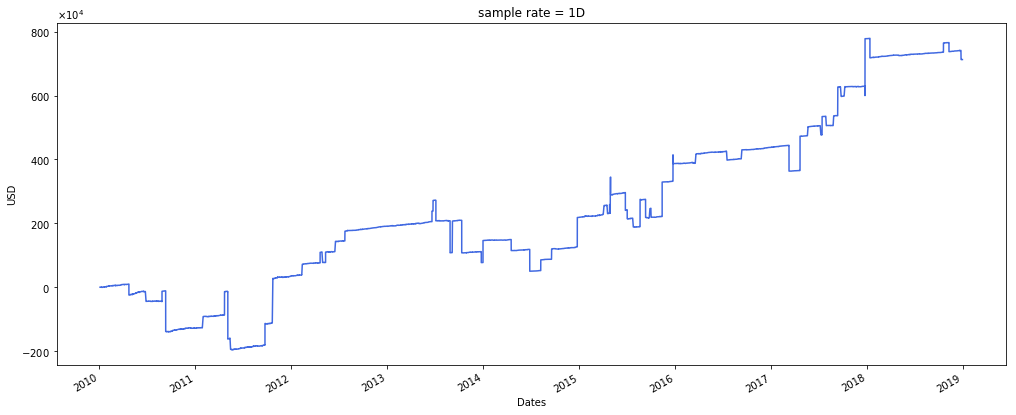

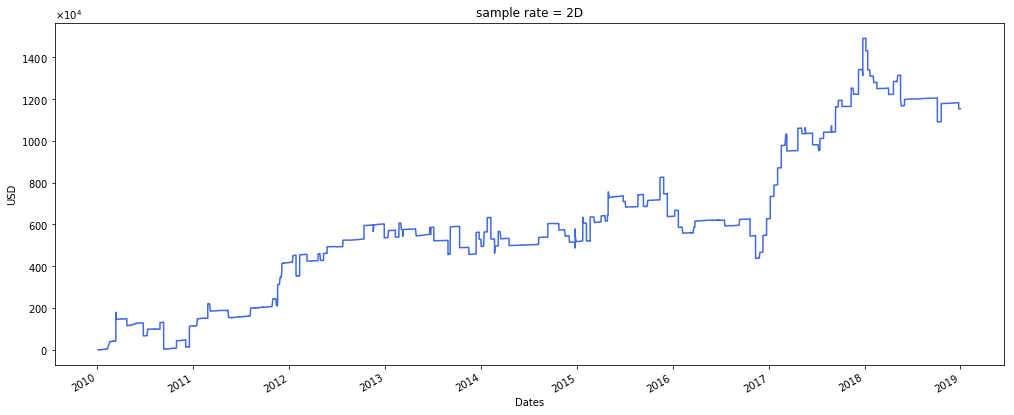

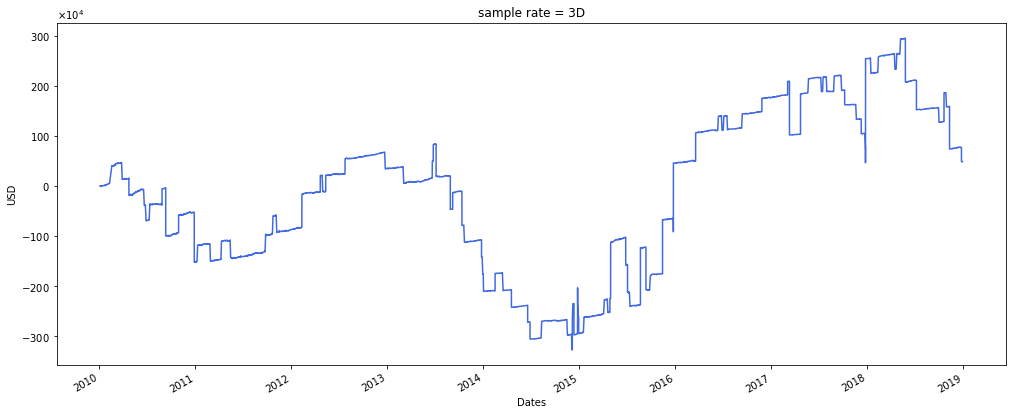

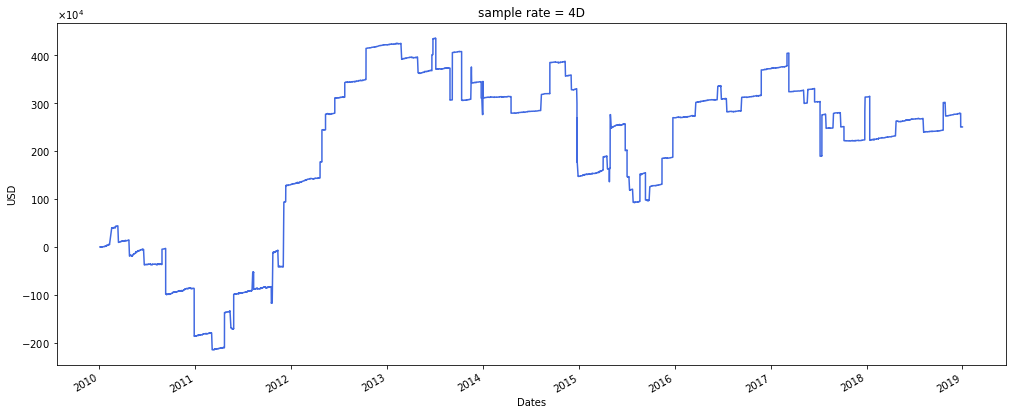

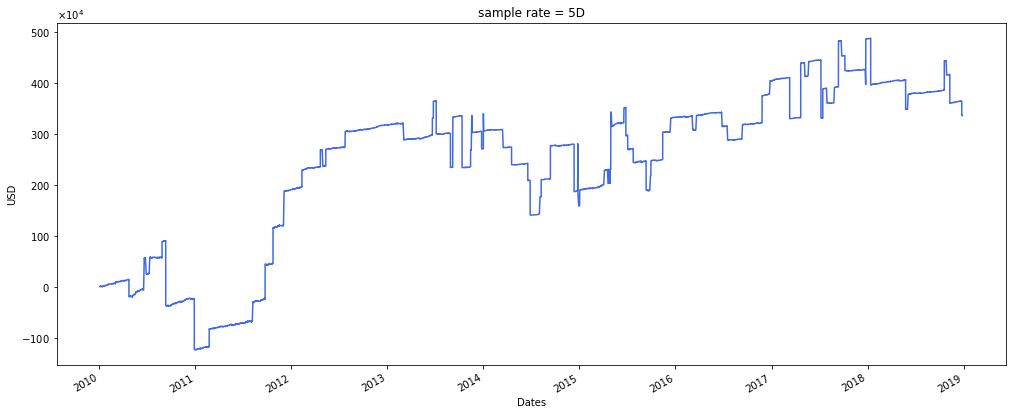

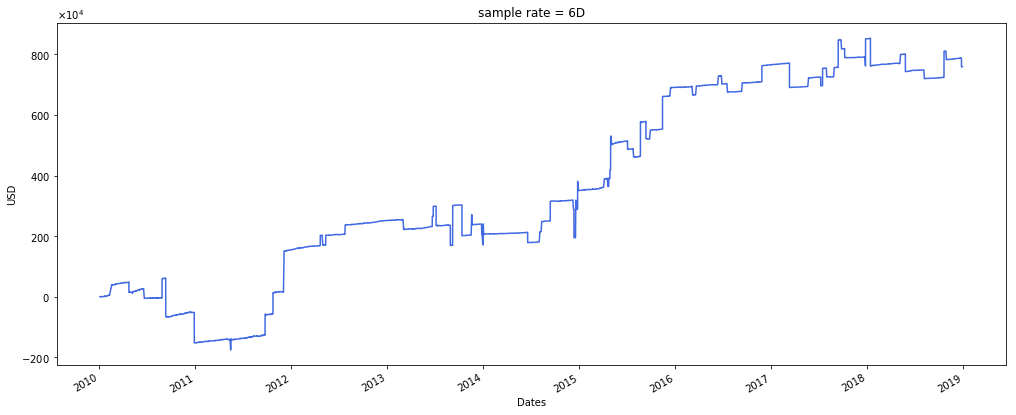

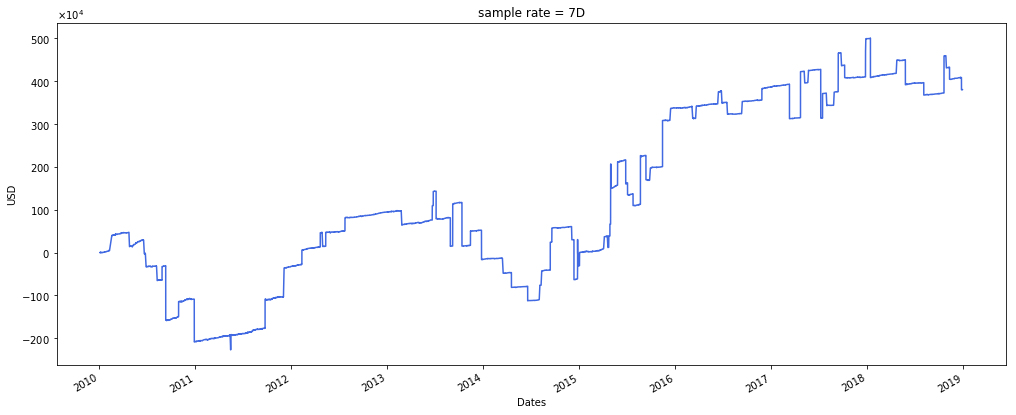

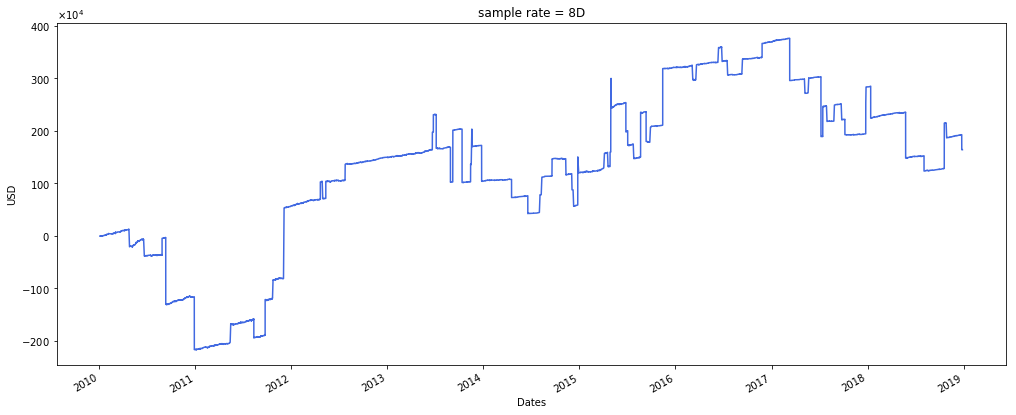

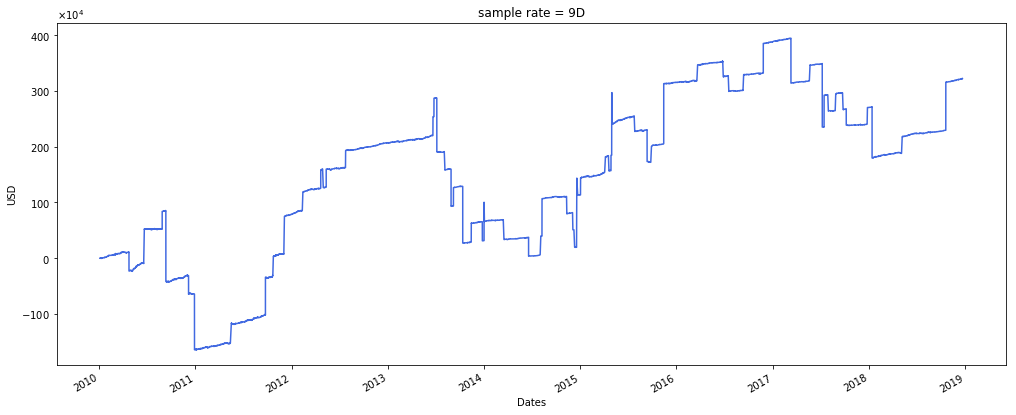

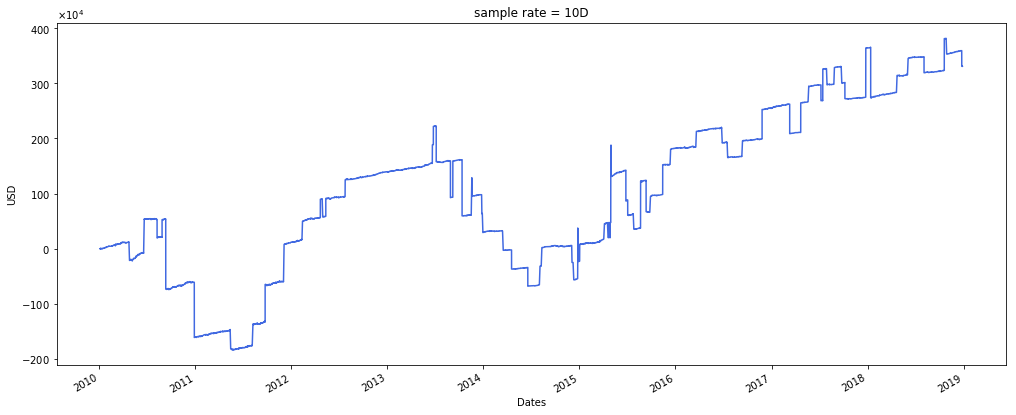

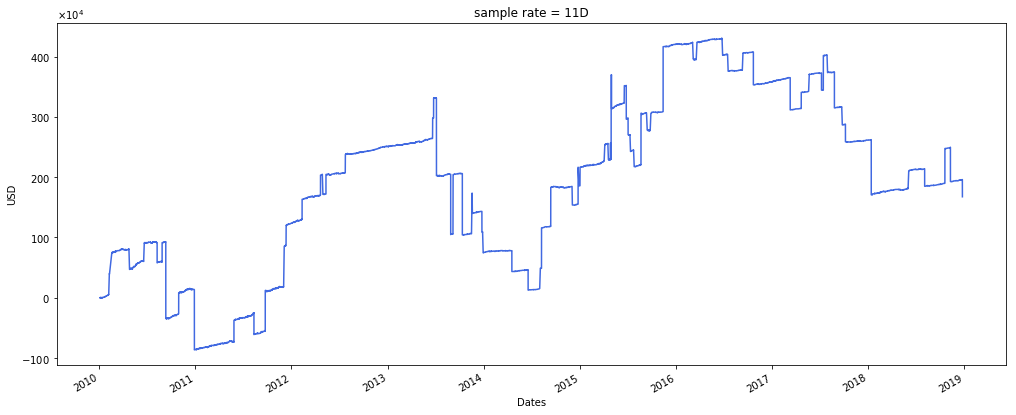

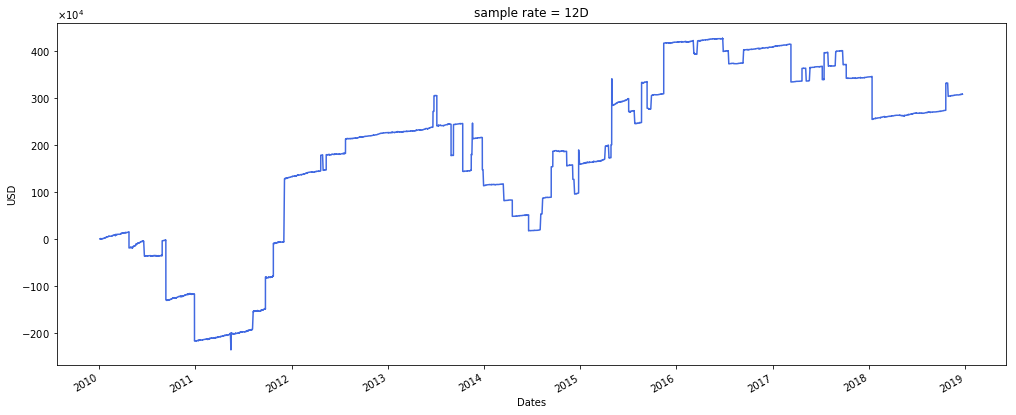

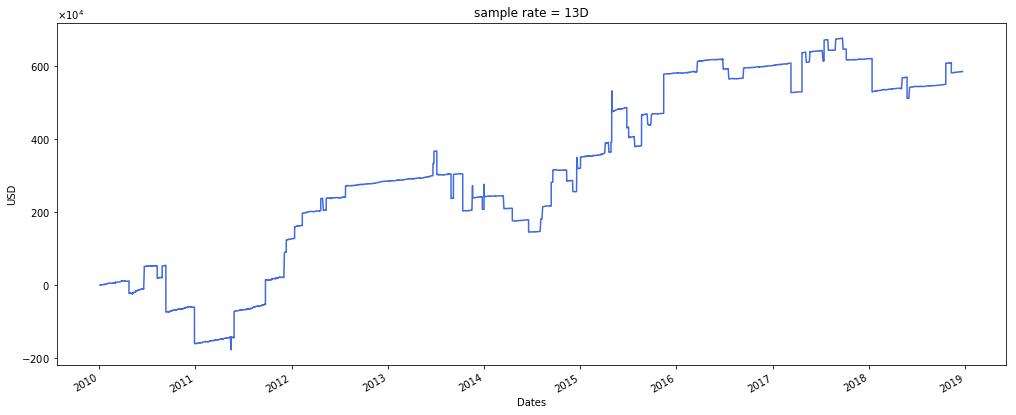

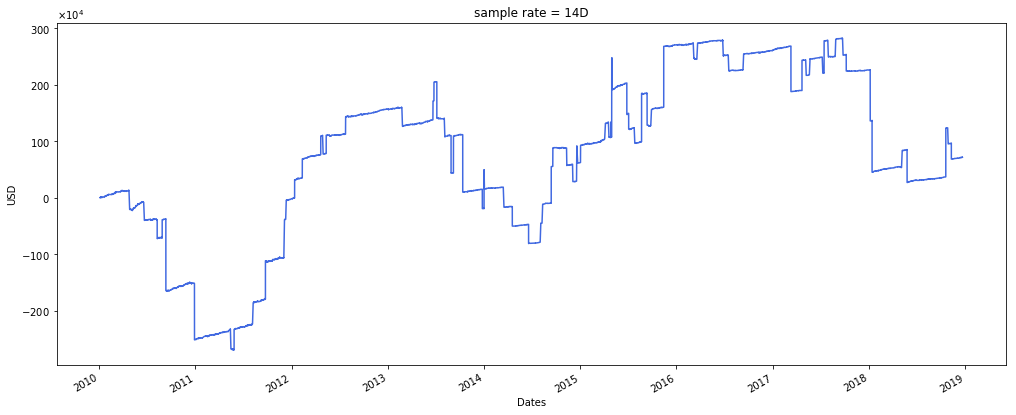

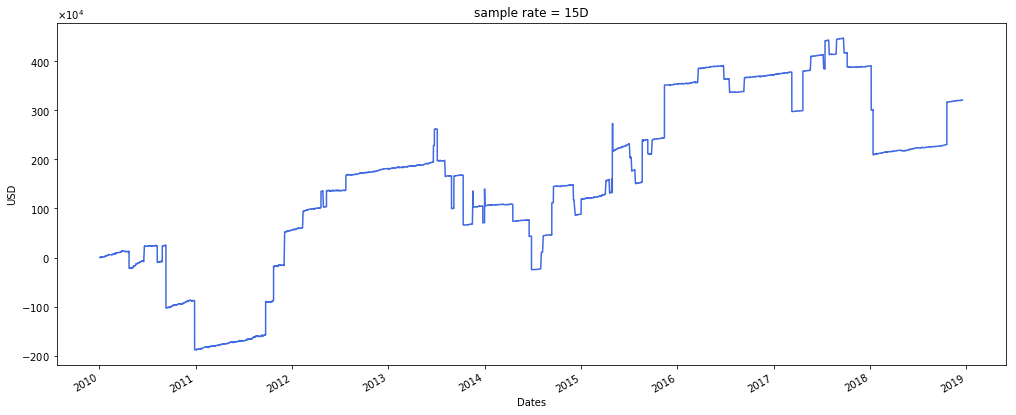

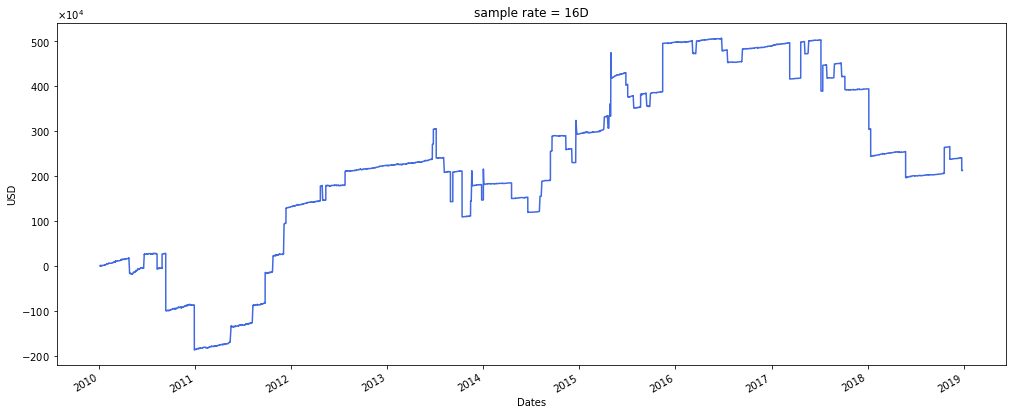

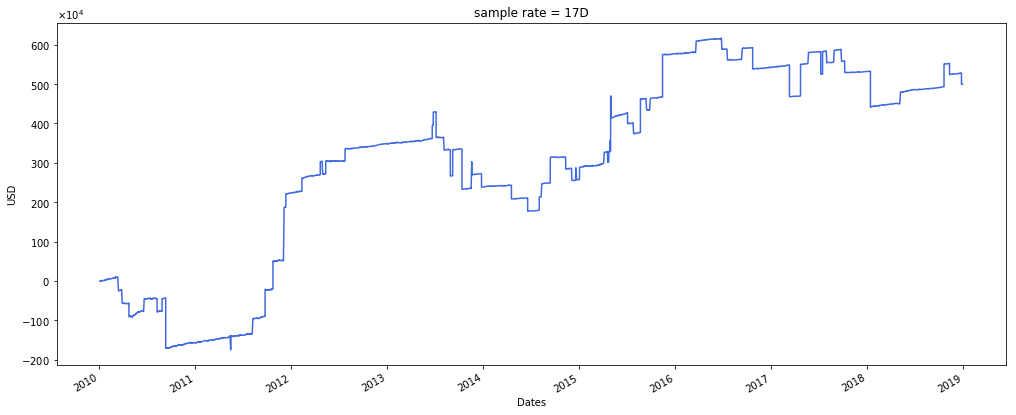

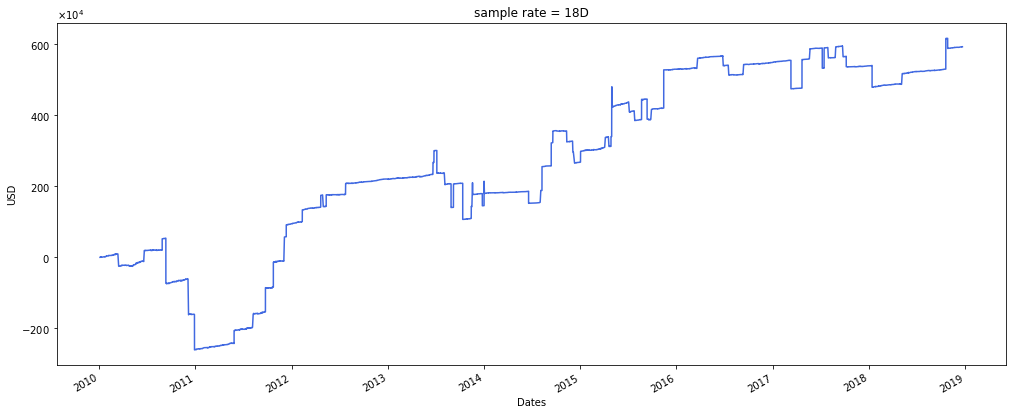

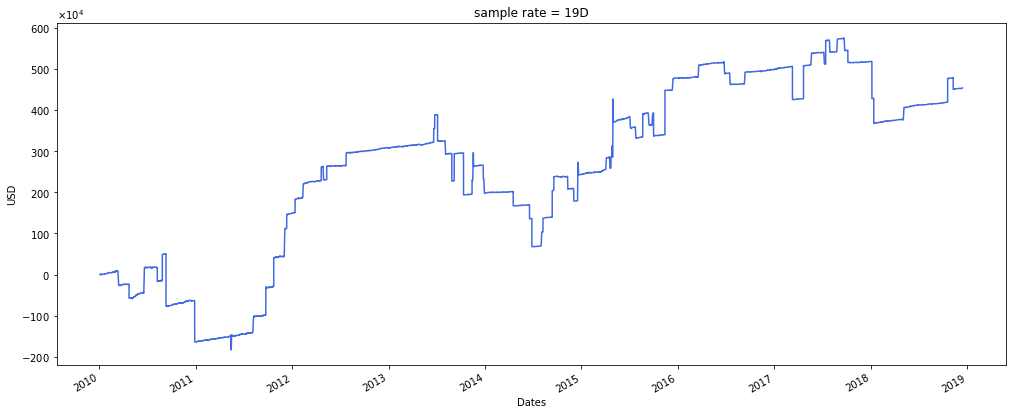

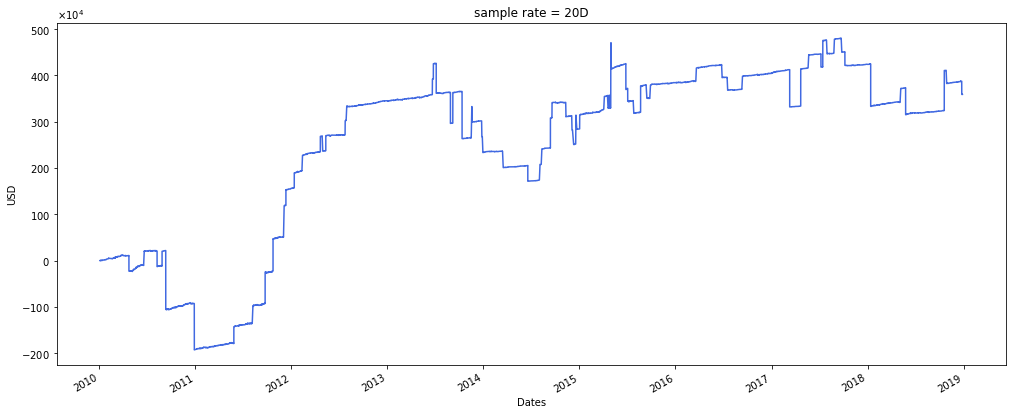

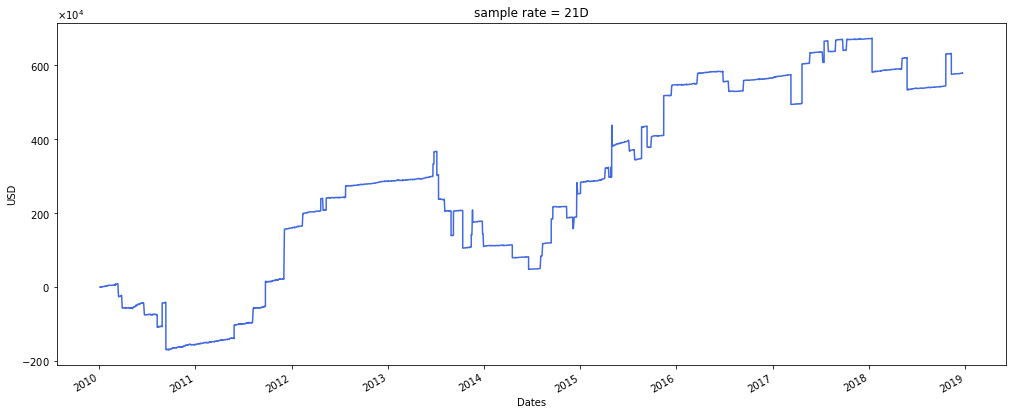

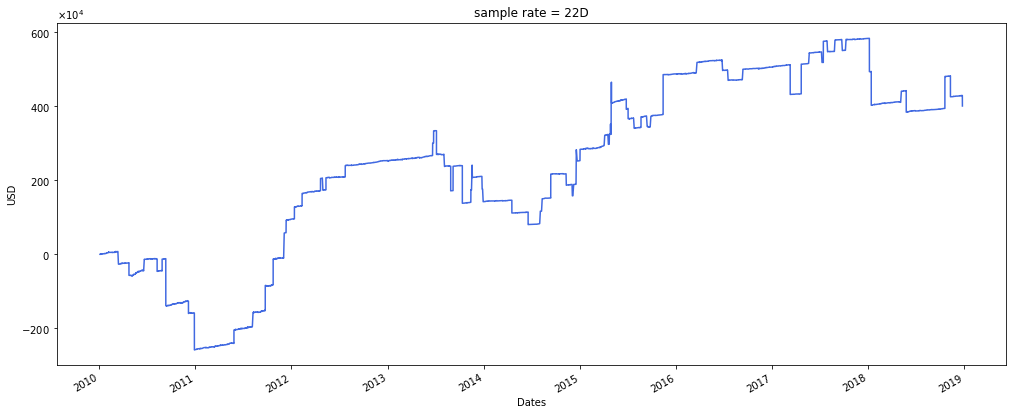

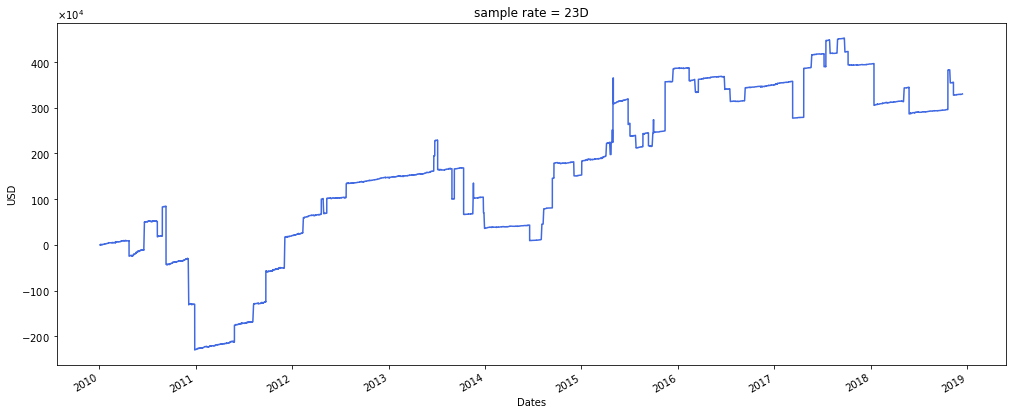

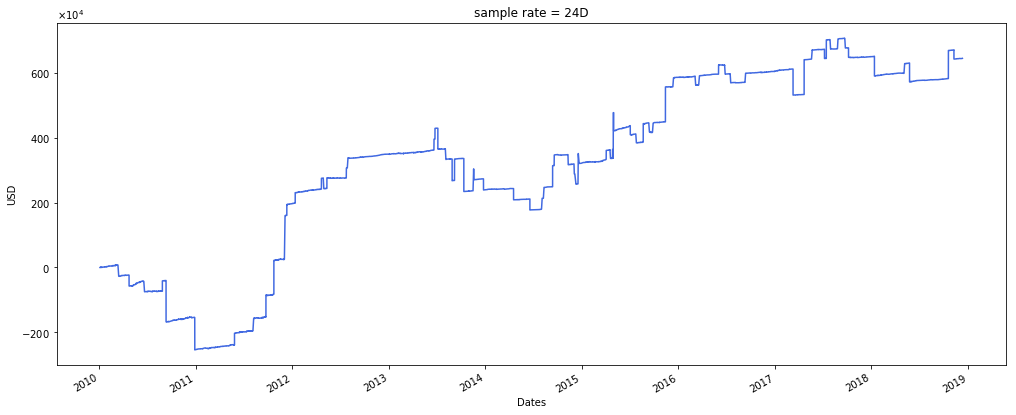

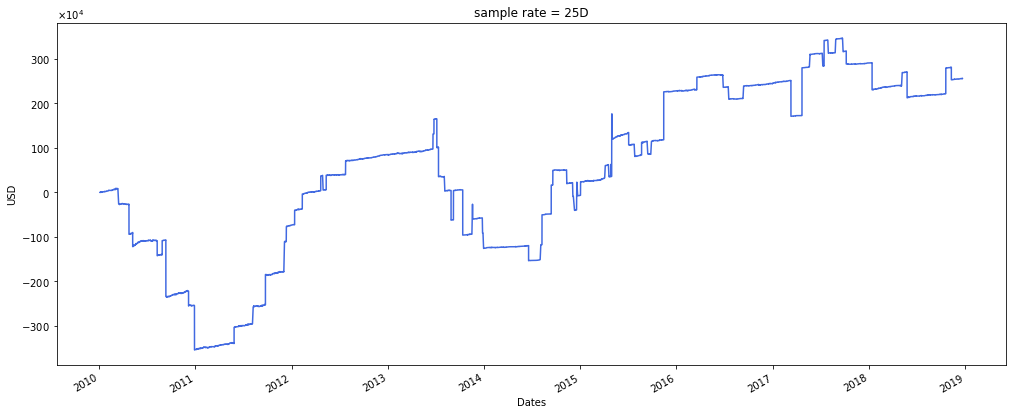

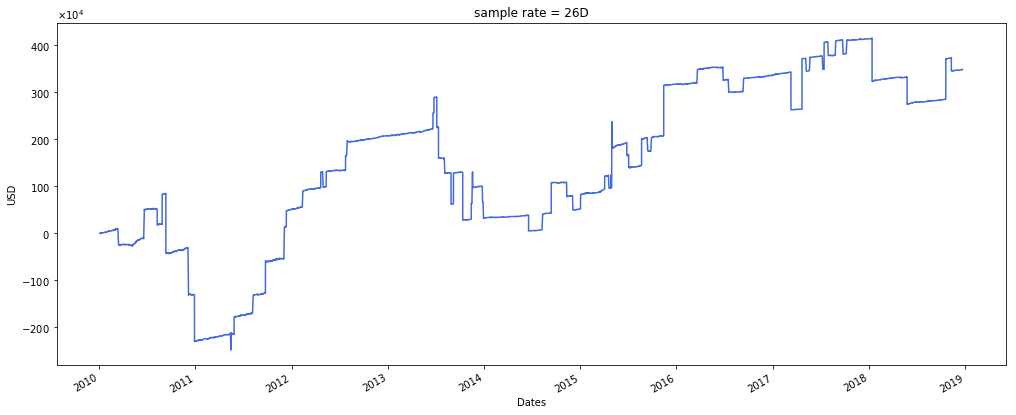

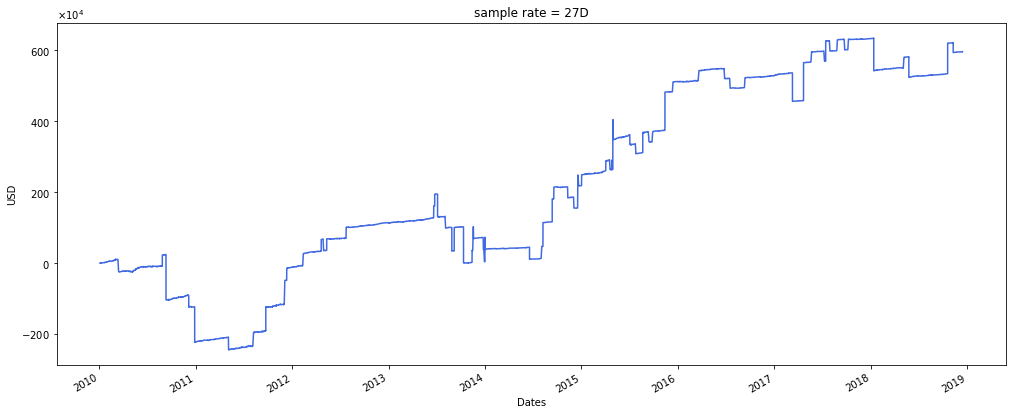

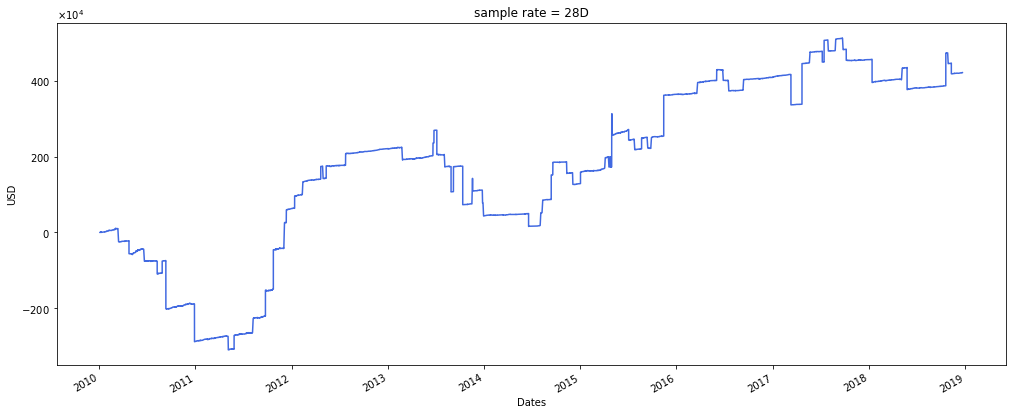

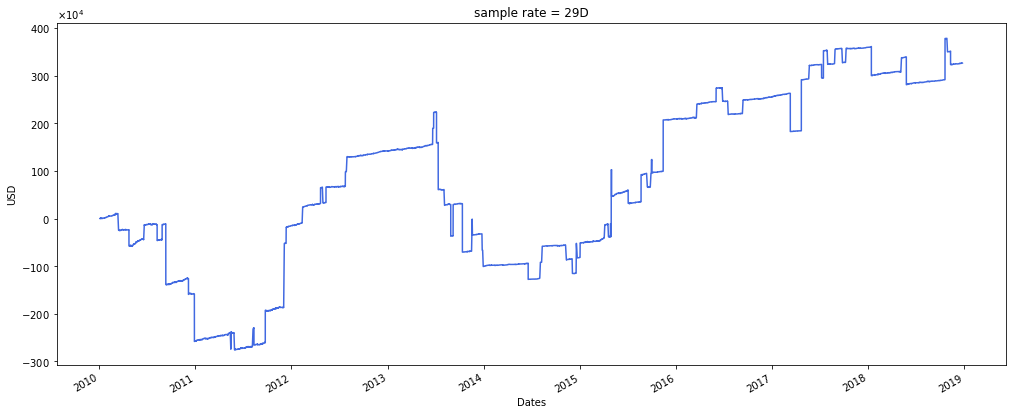

In [4]:
for i in range(1,30):
    resample_rate=str(i)+"D"
    A=BT.Resumen_acomulado_estrategia_2(df,period=5,period_mid=5,resample=resample_rate)
    BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="sample rate = {}".format(resample_rate))
    plt.show()

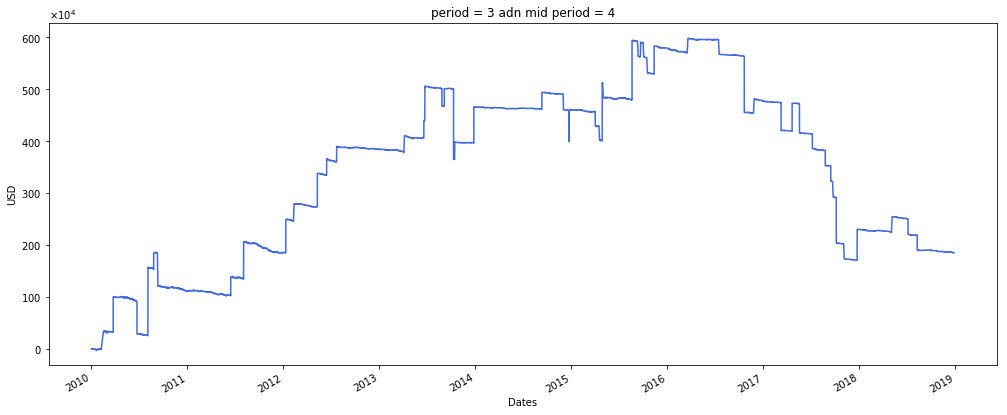

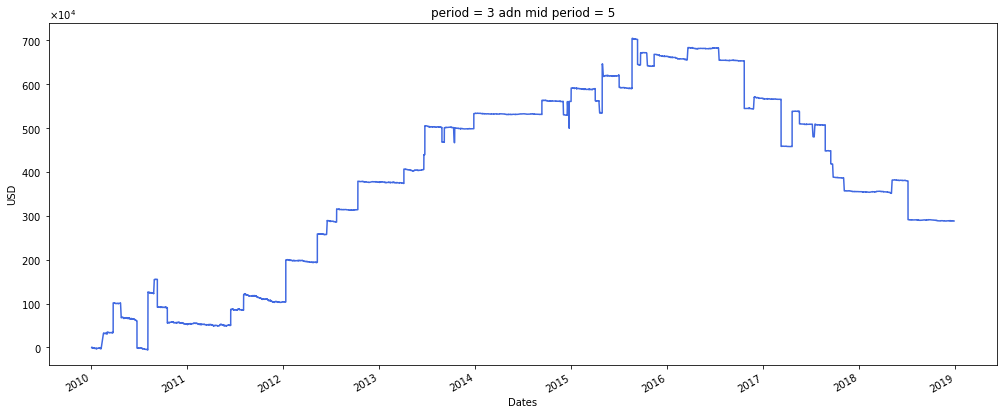

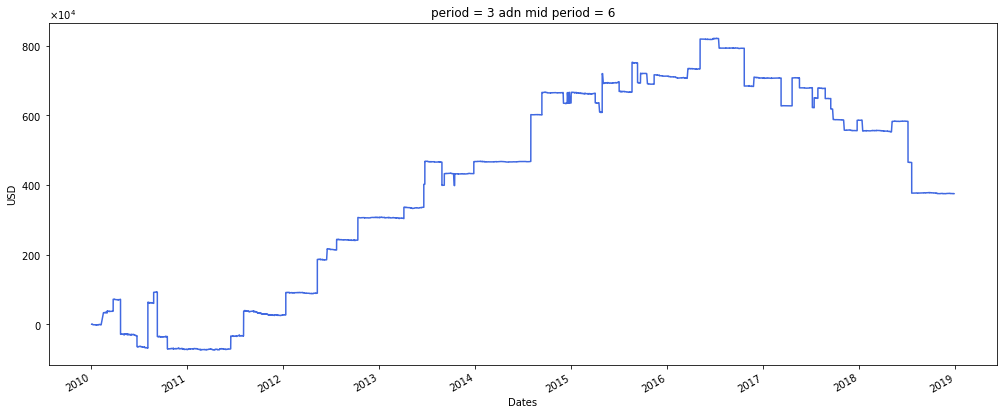

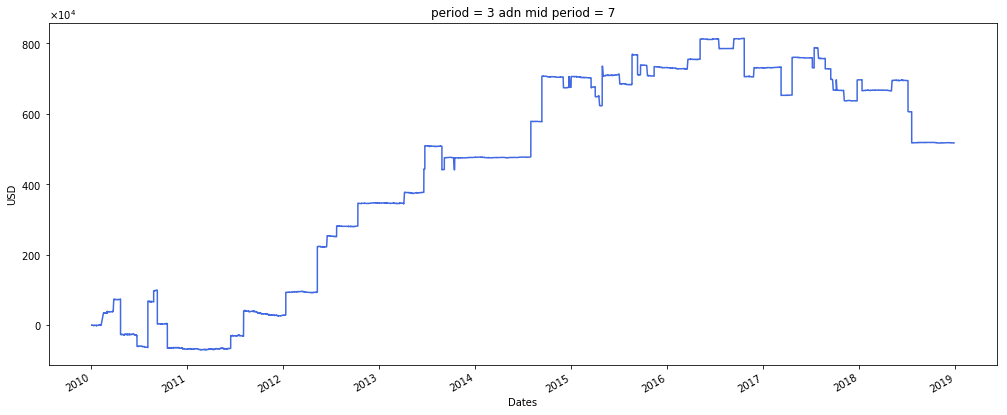

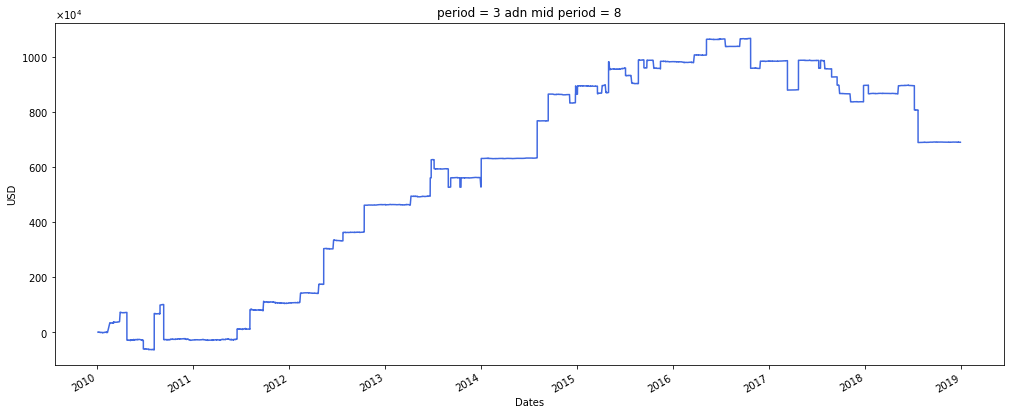

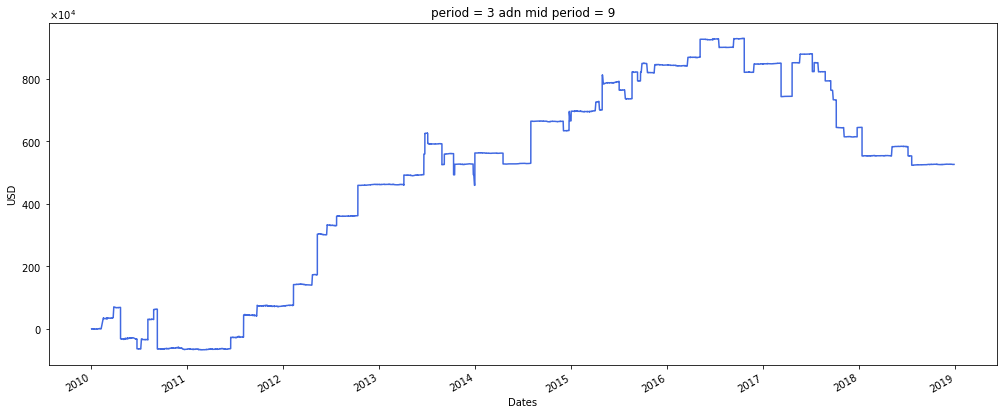

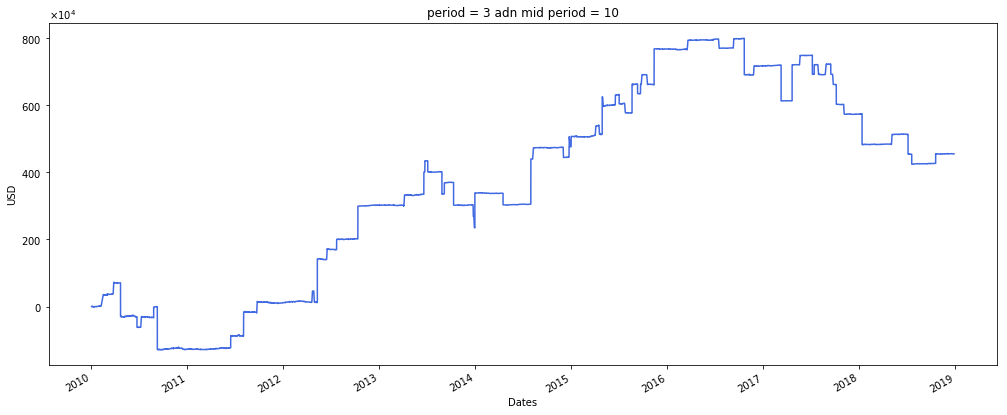

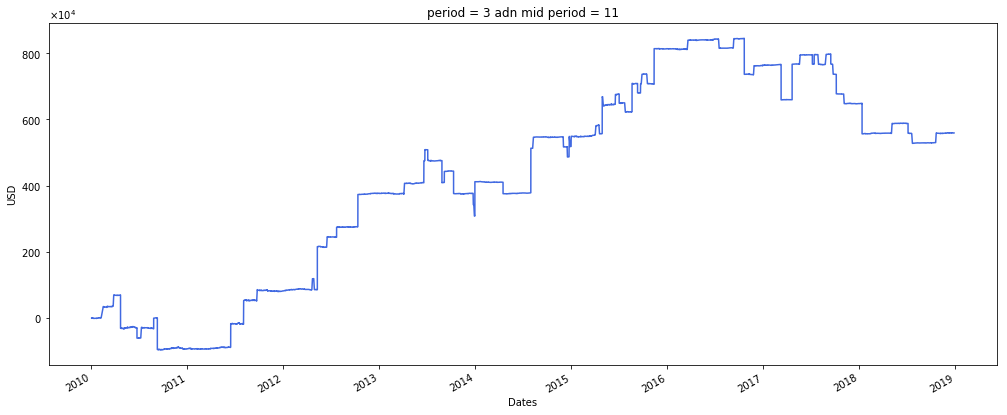

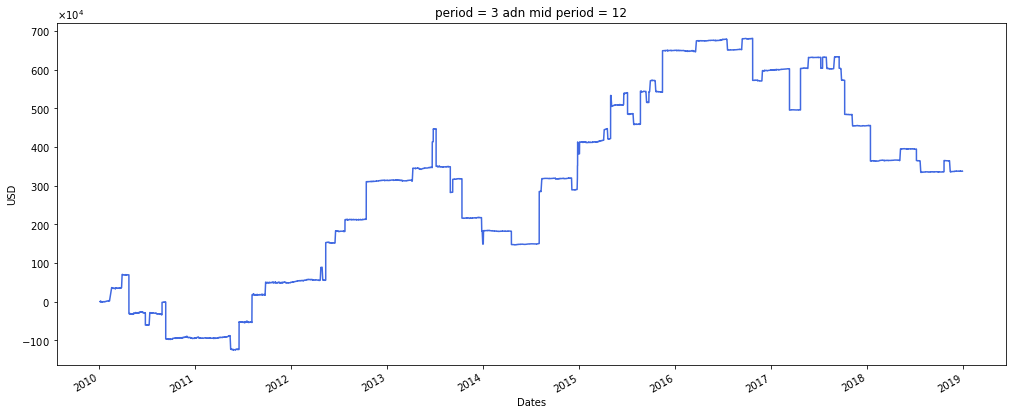

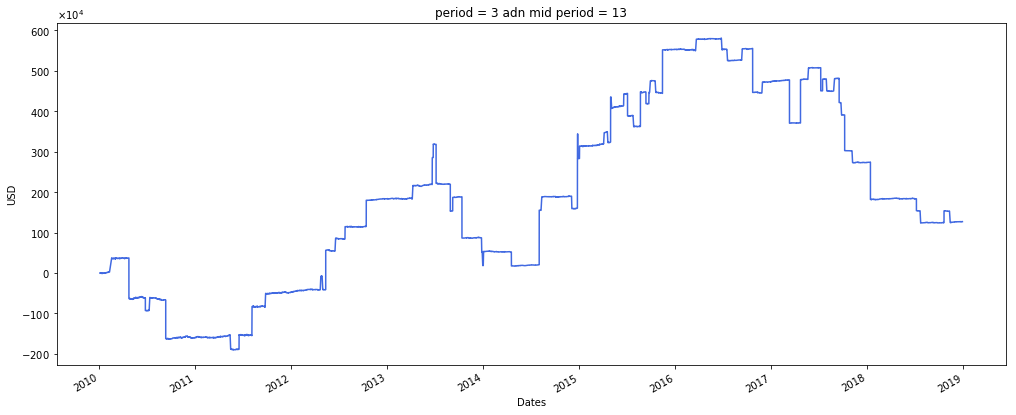

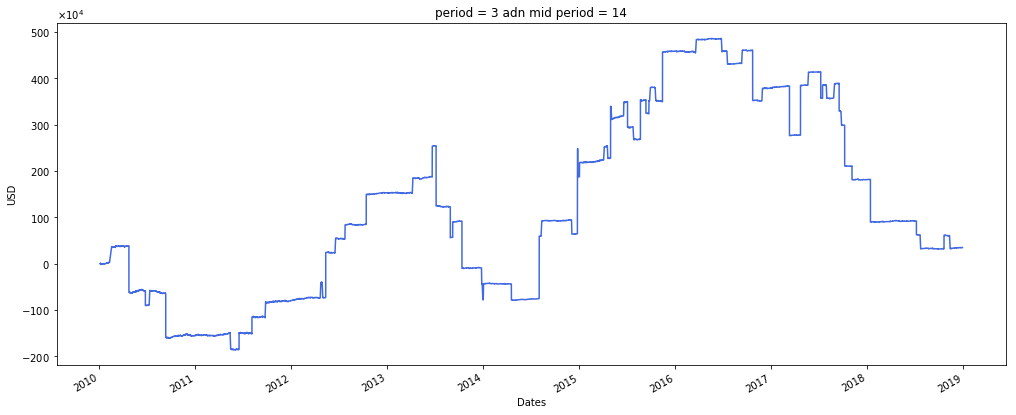

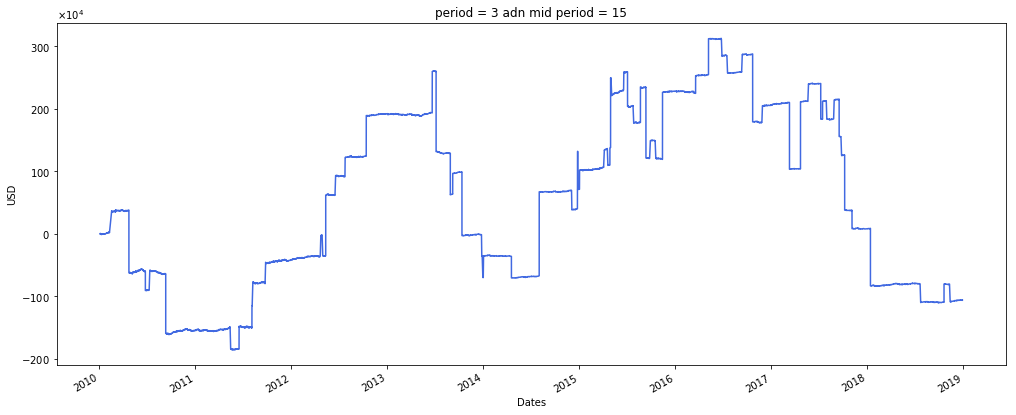

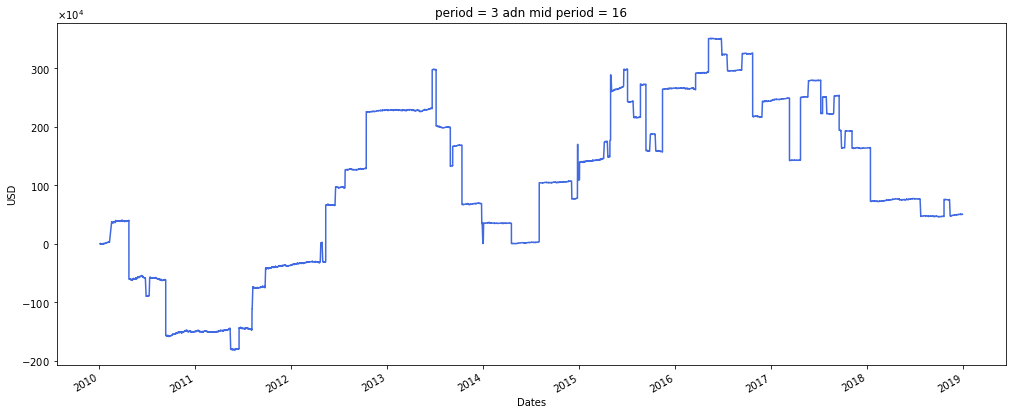

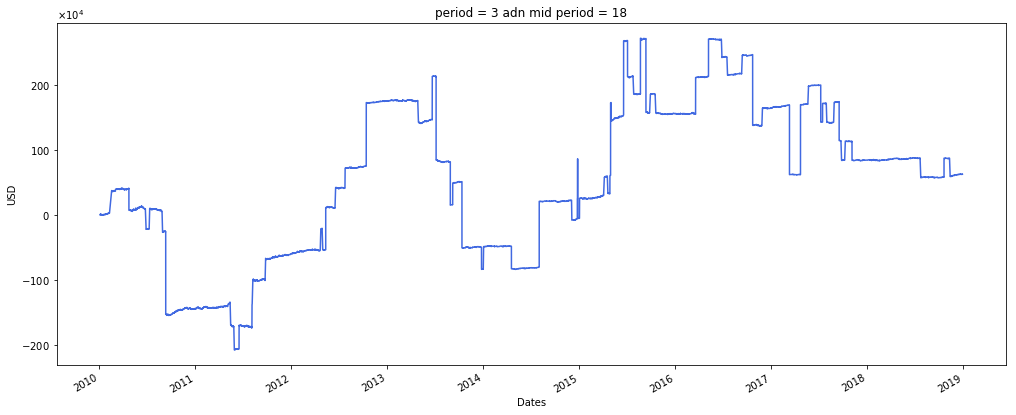

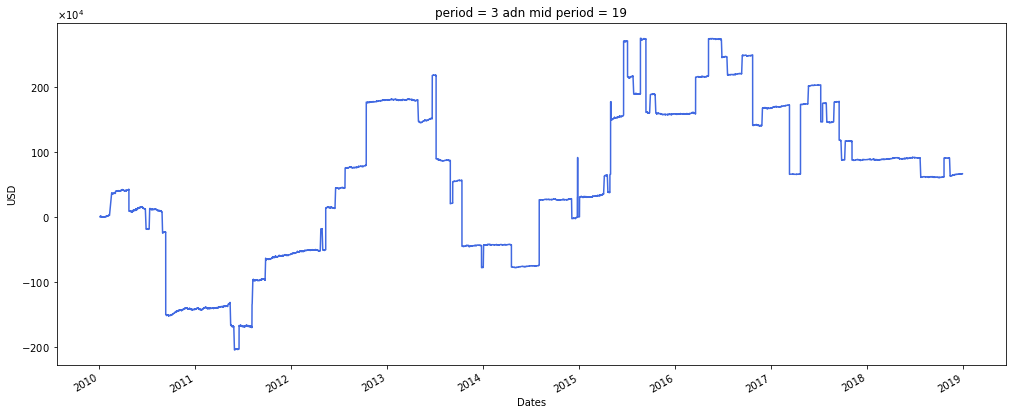

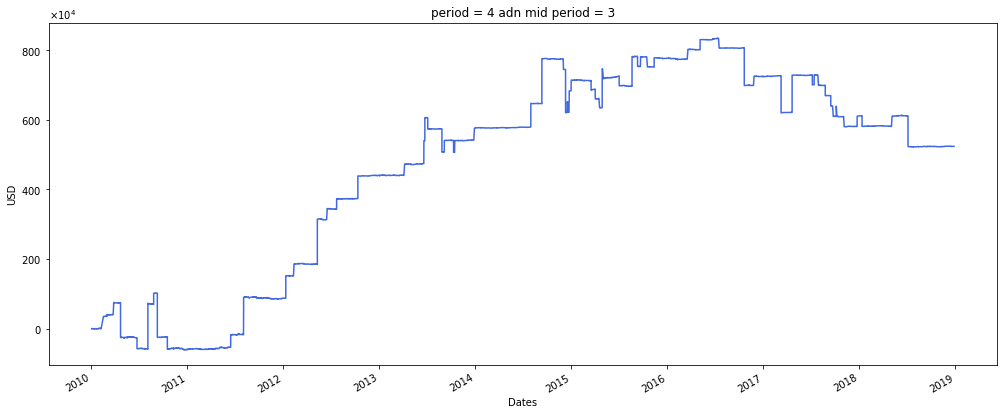

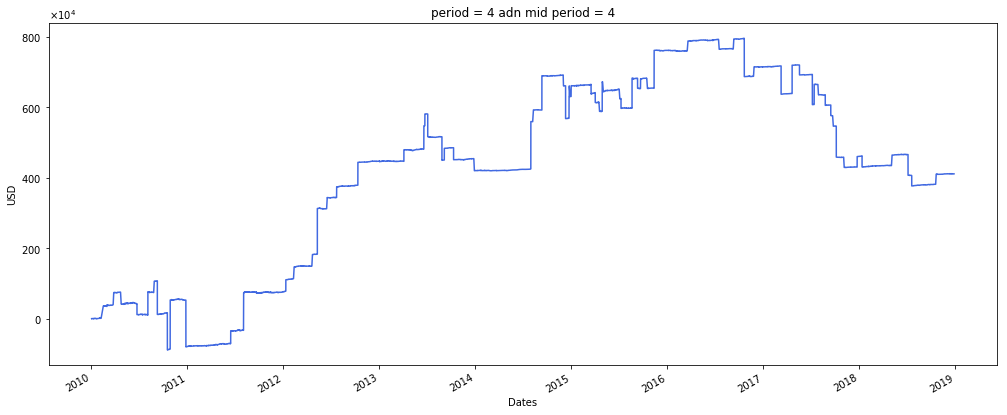

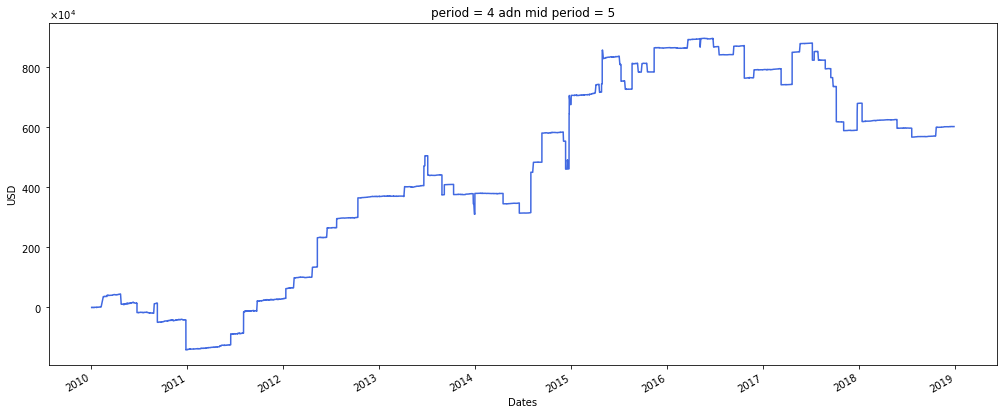

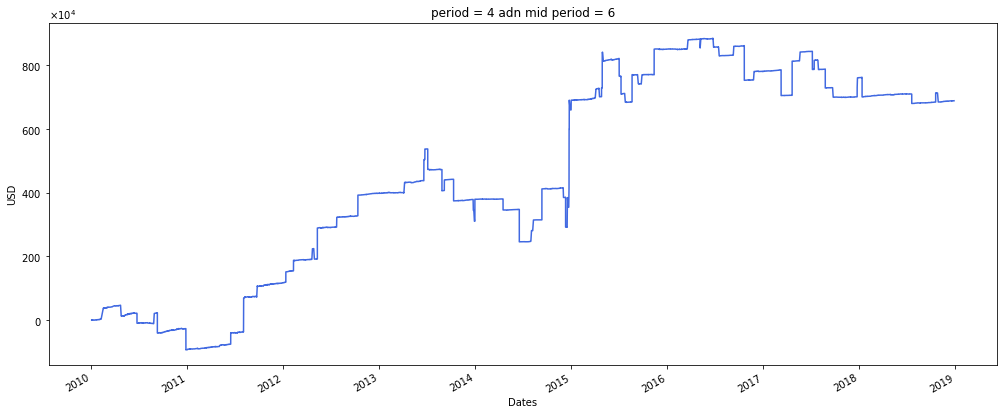

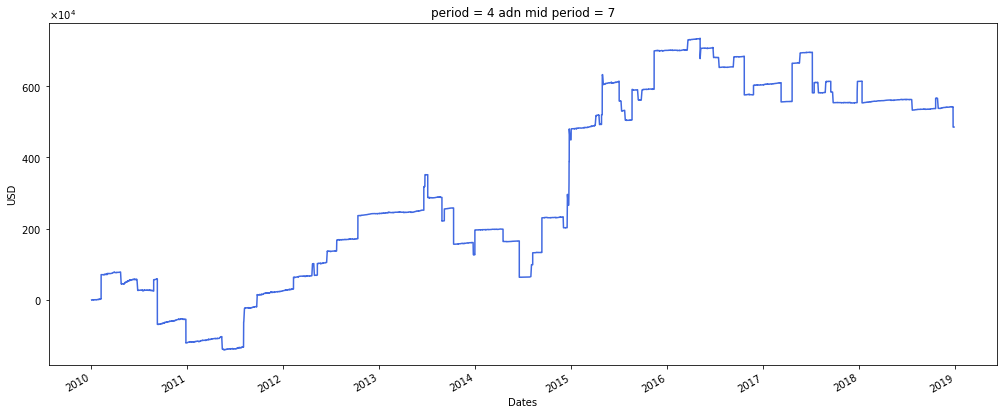

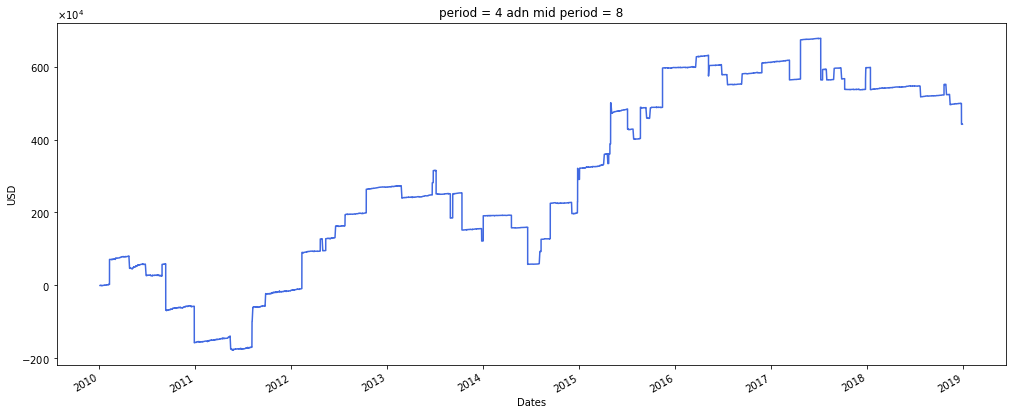

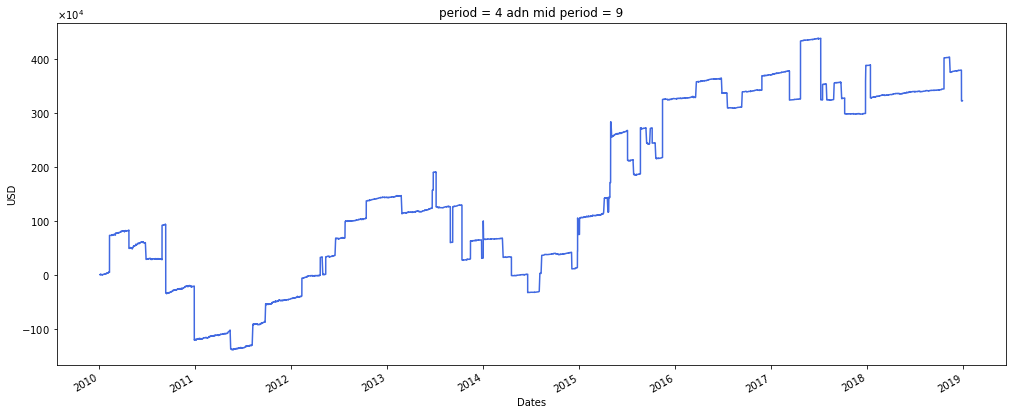

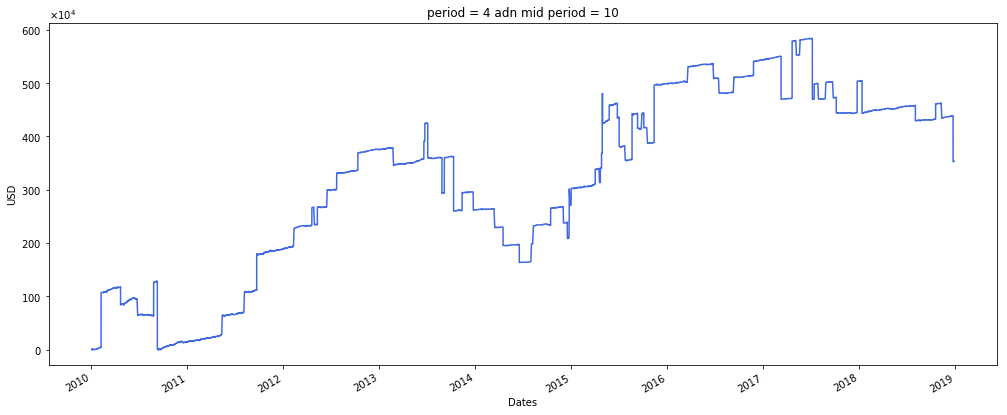

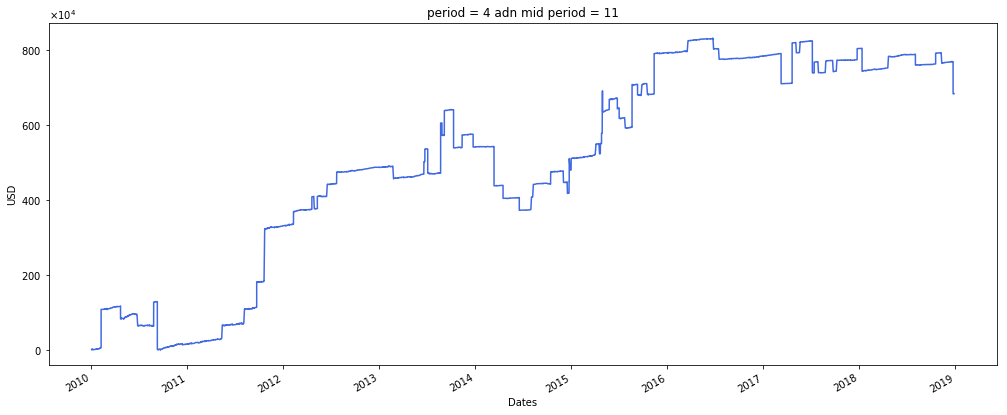

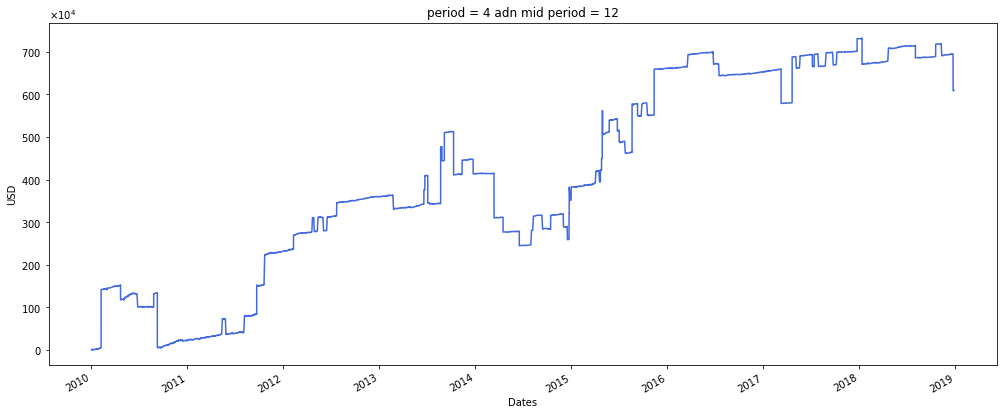

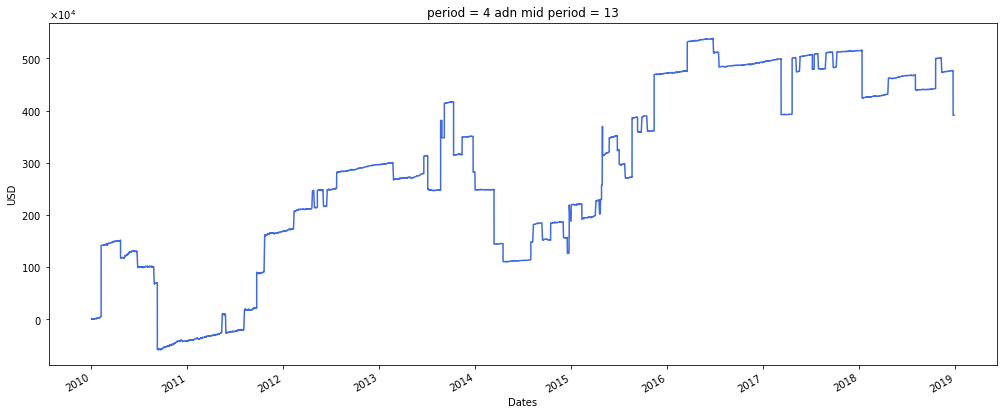

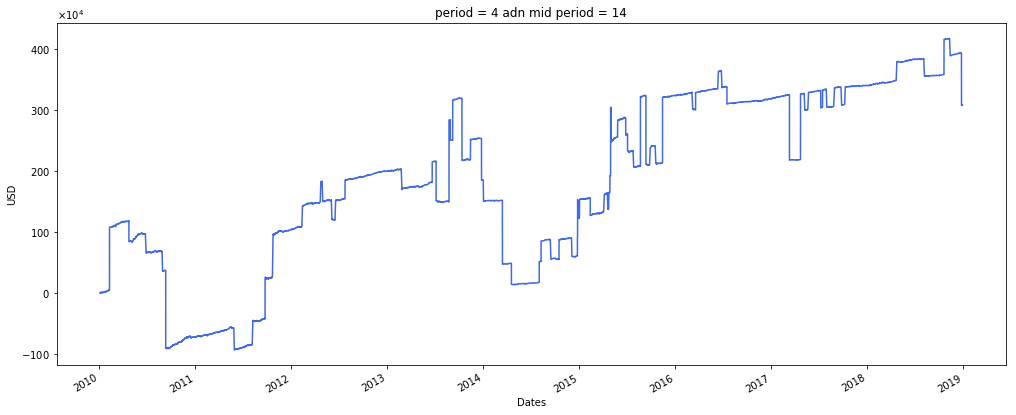

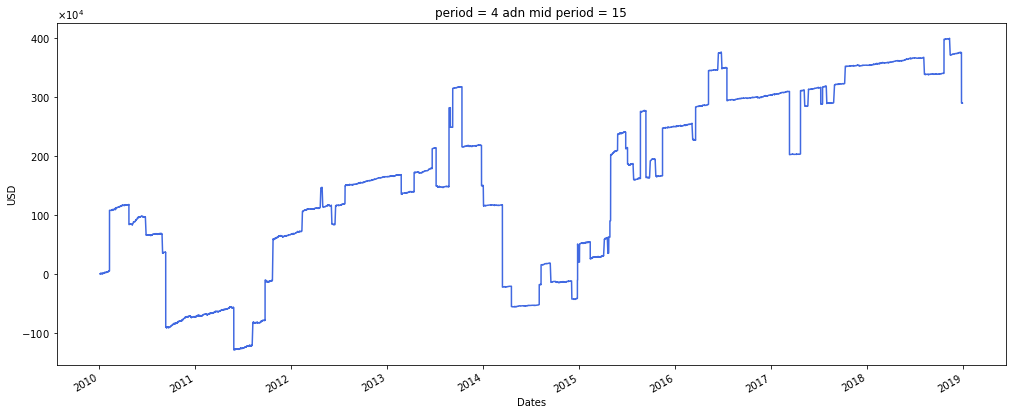

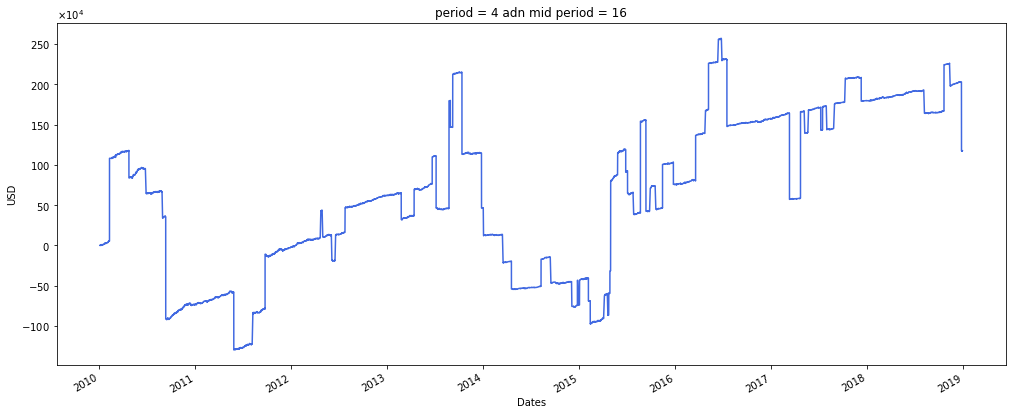

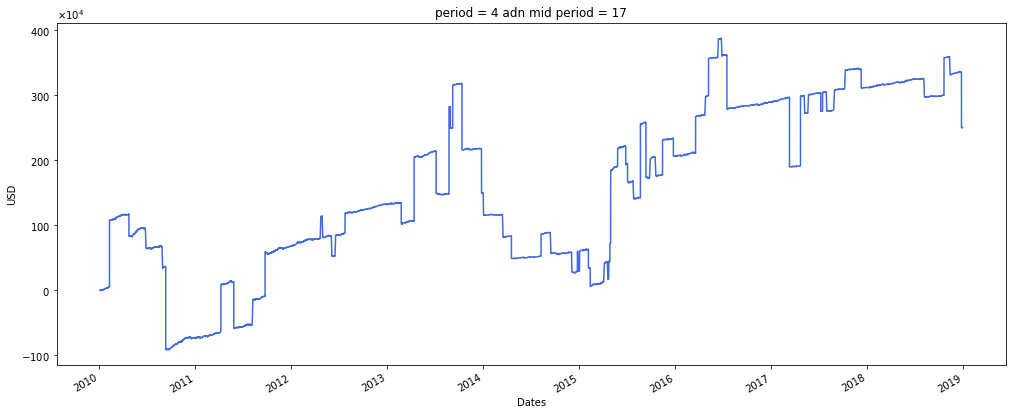

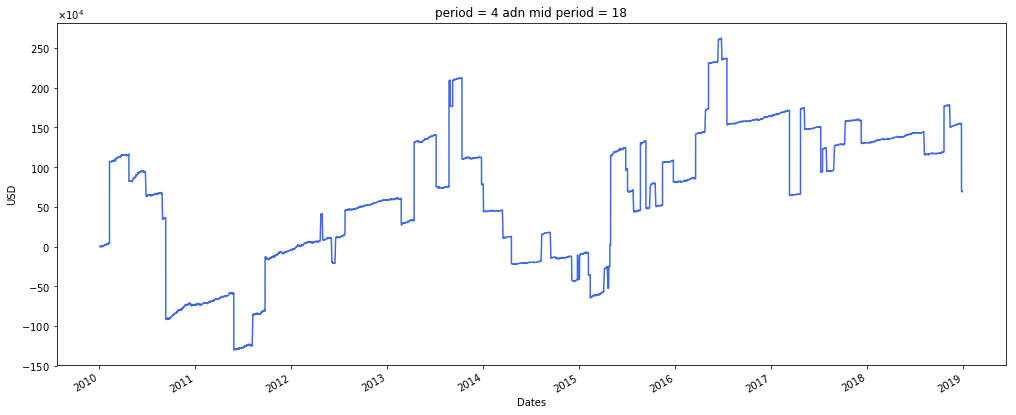

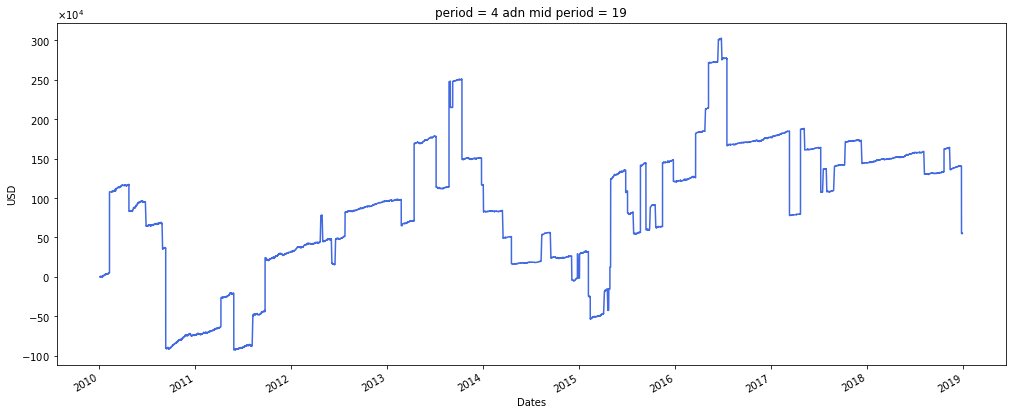

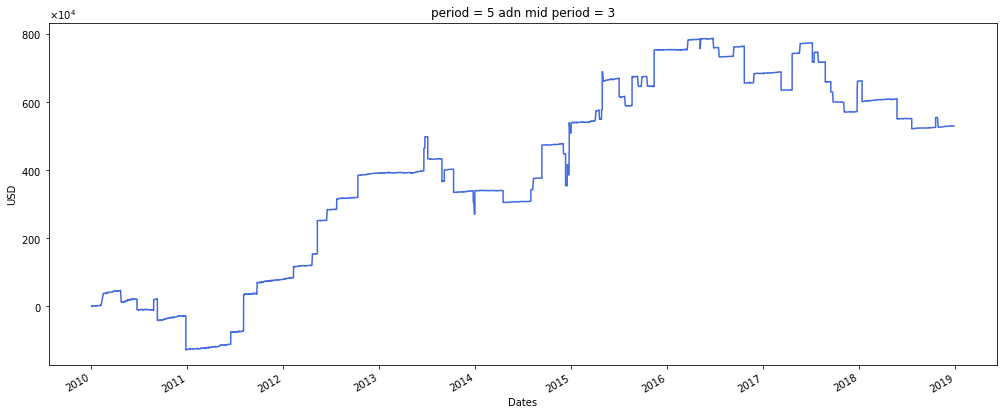

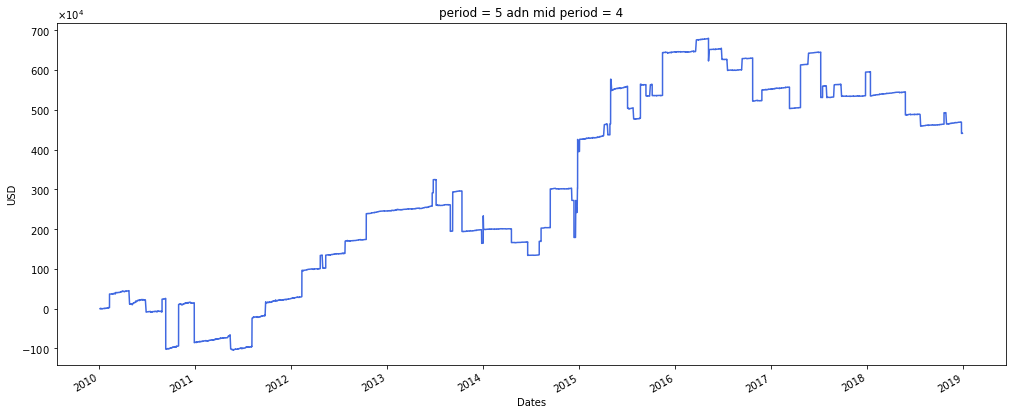

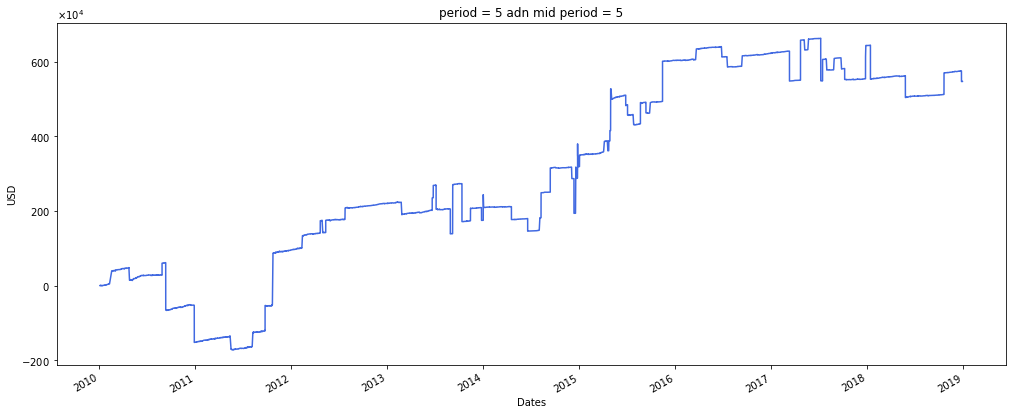

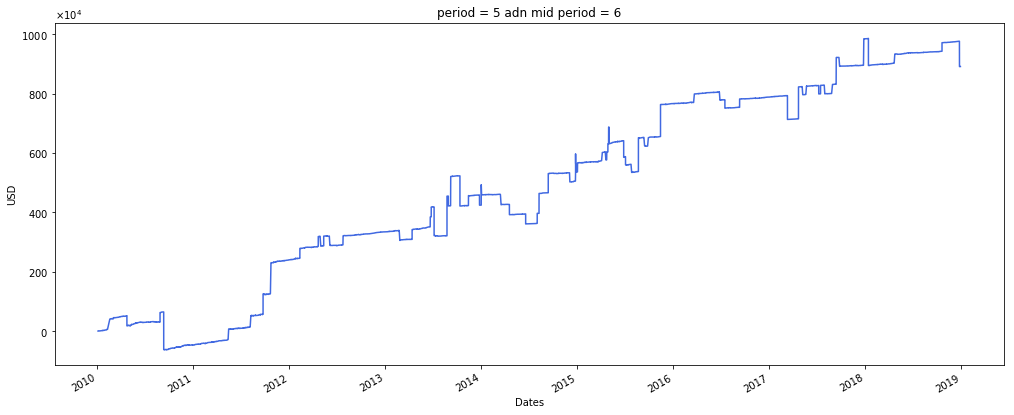

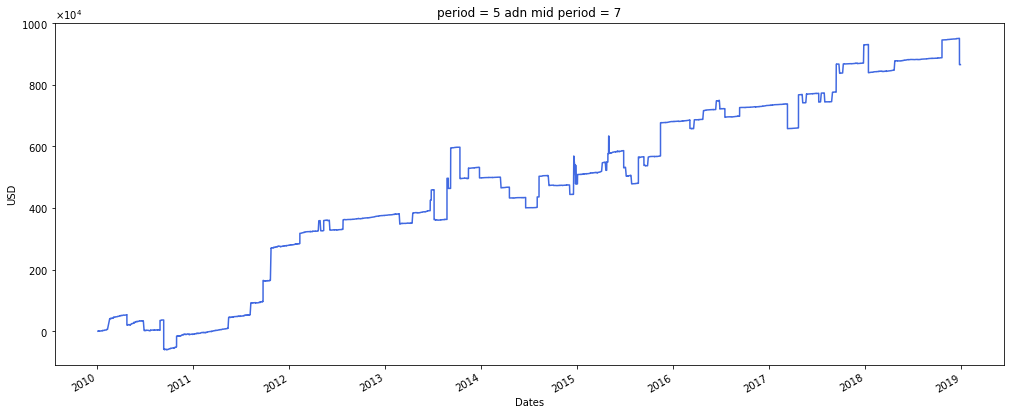

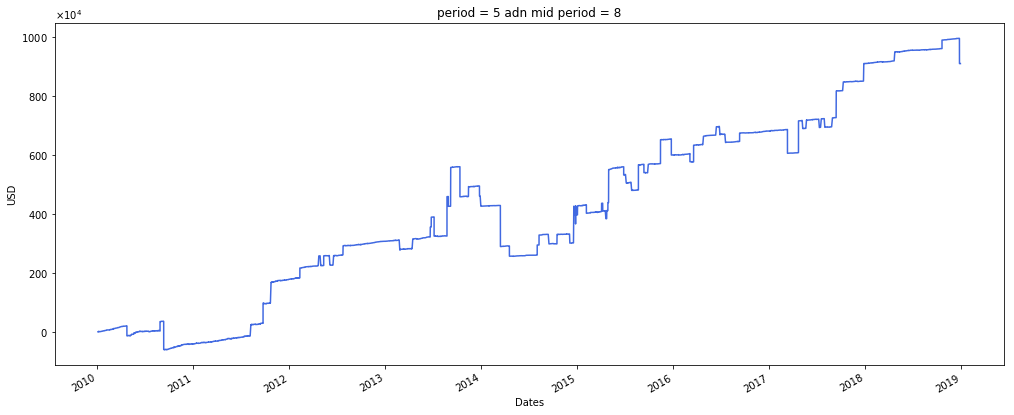

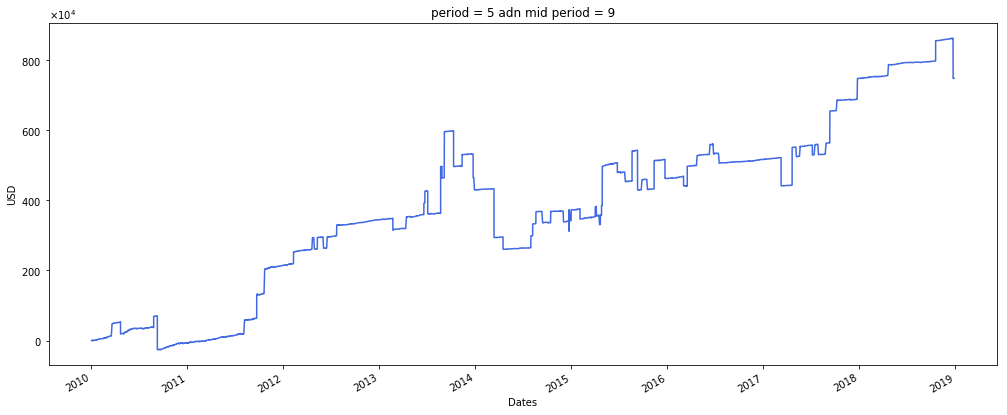

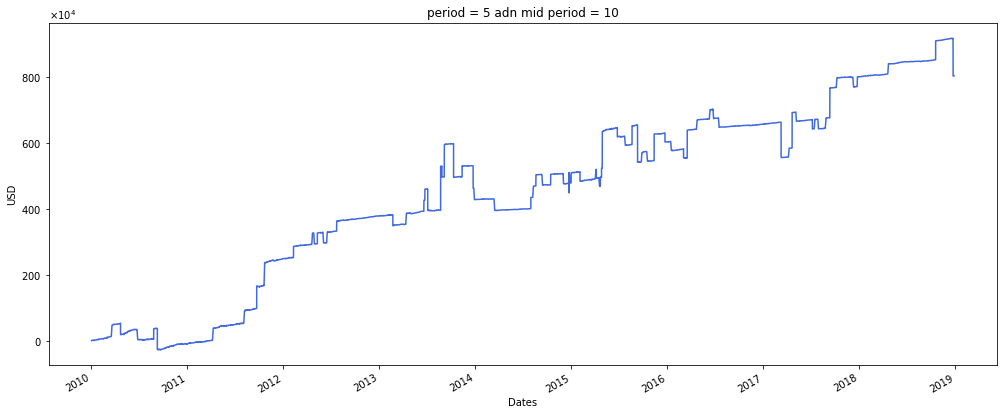

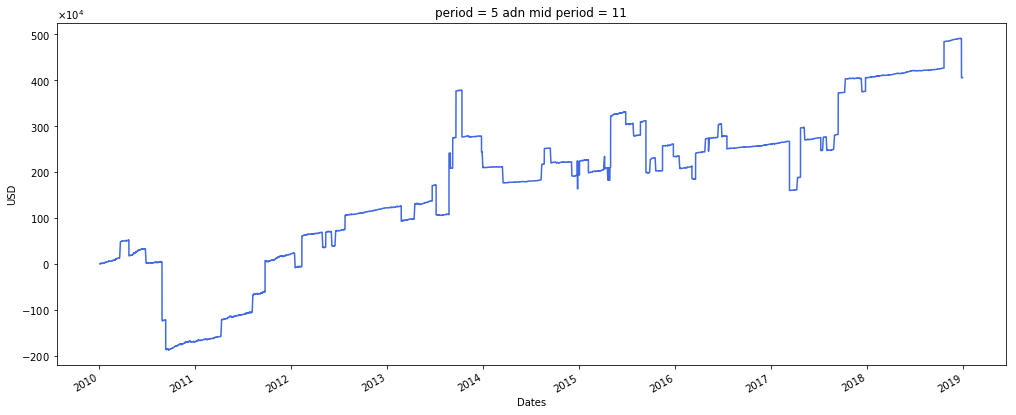

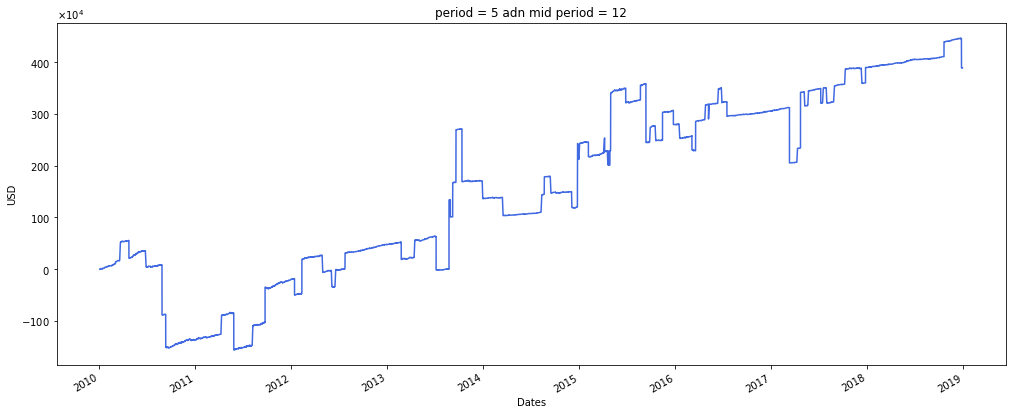

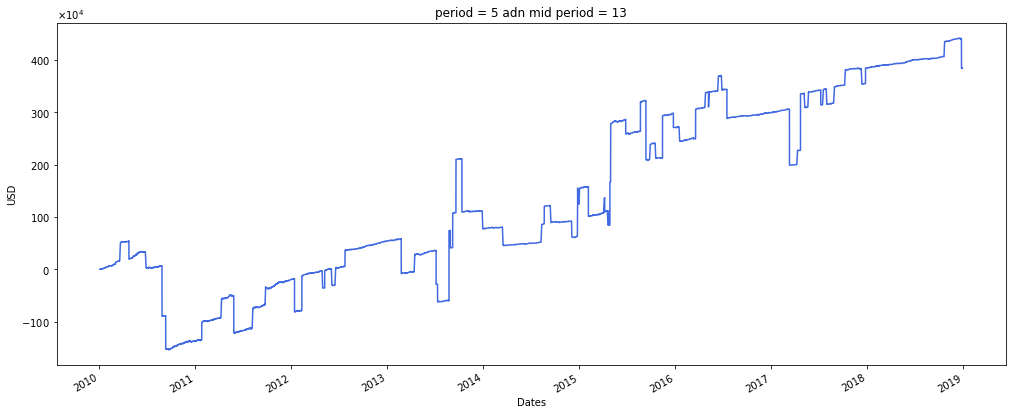

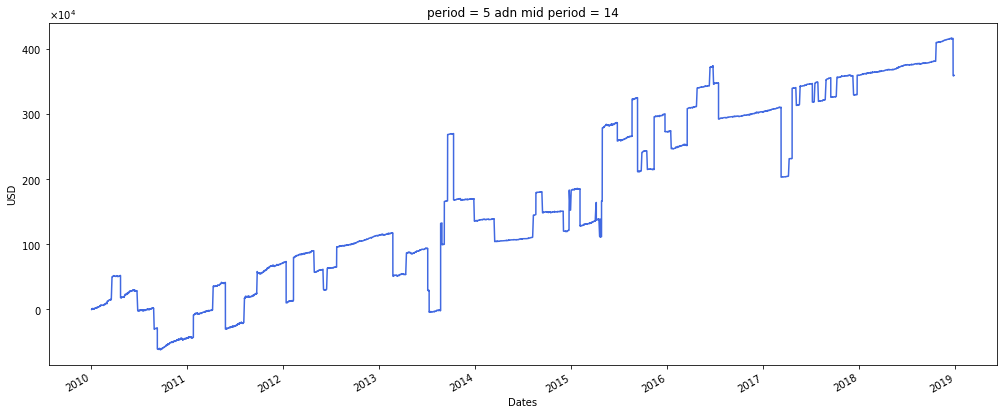

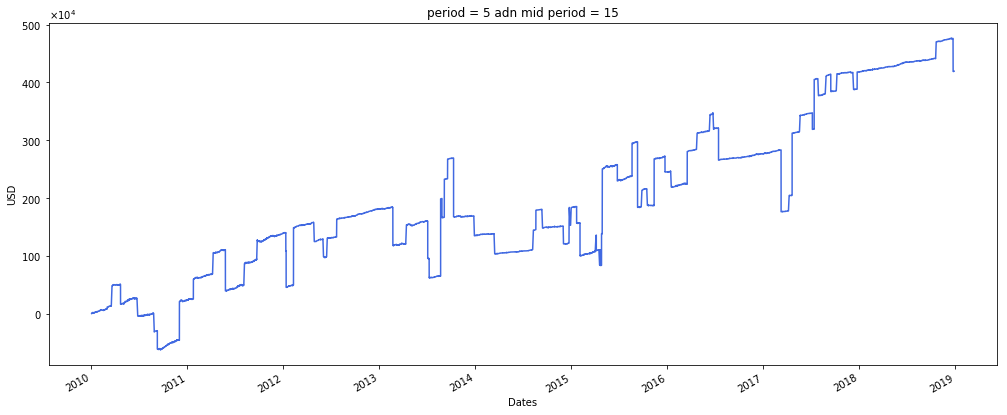

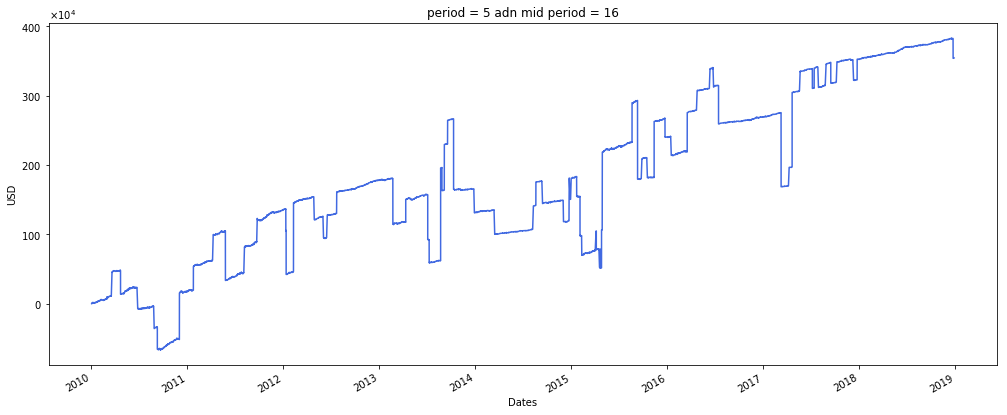

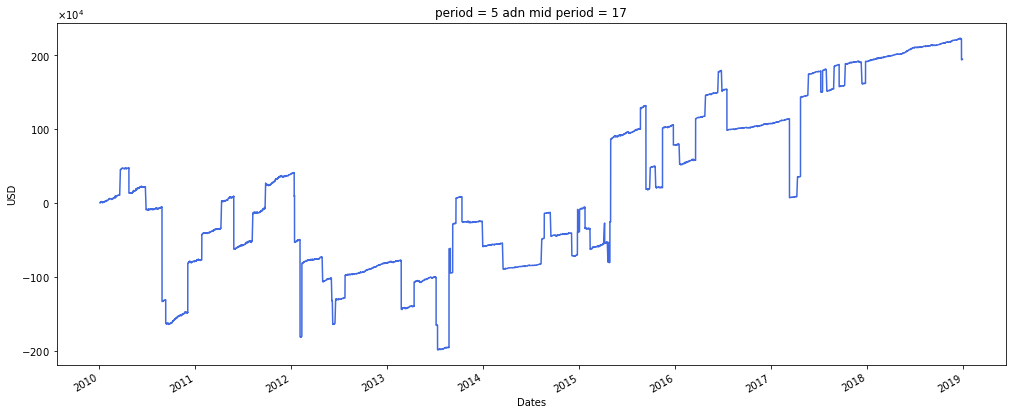

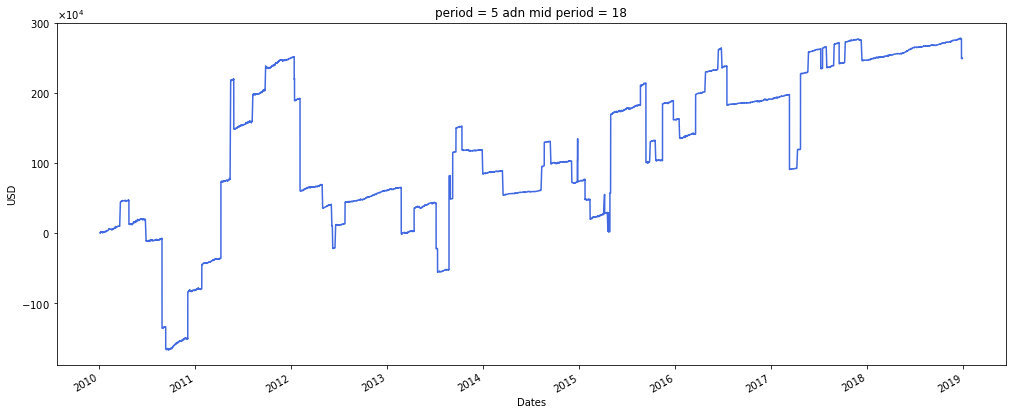

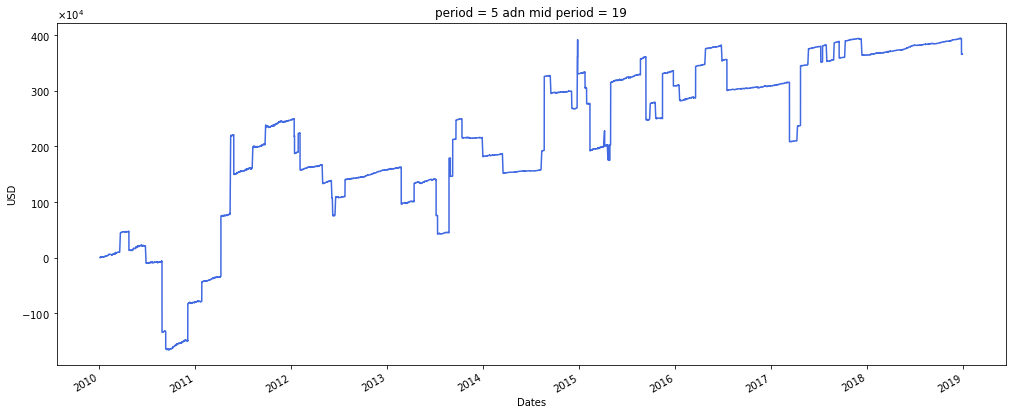

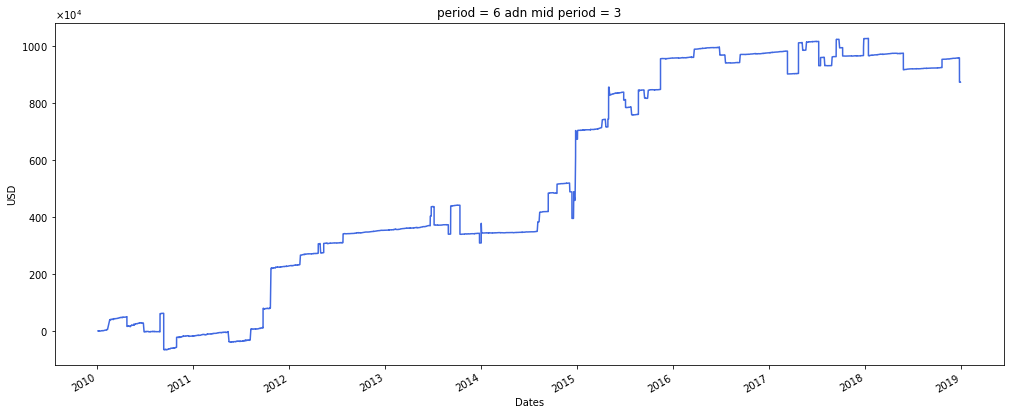

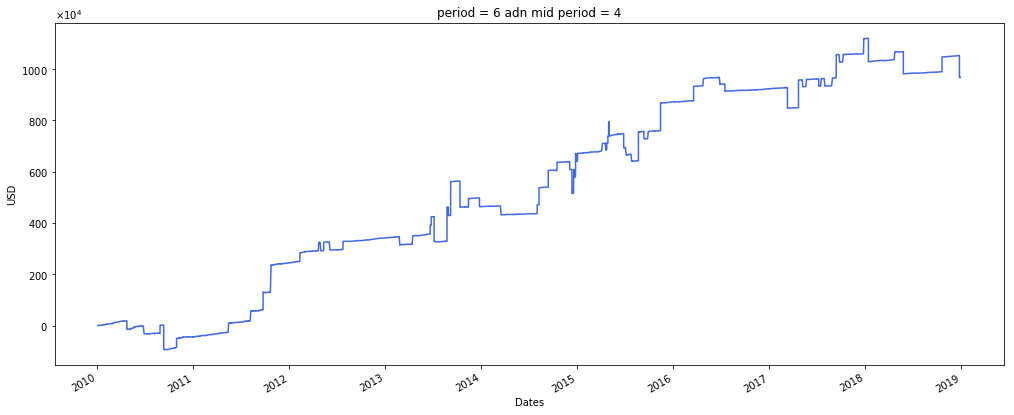

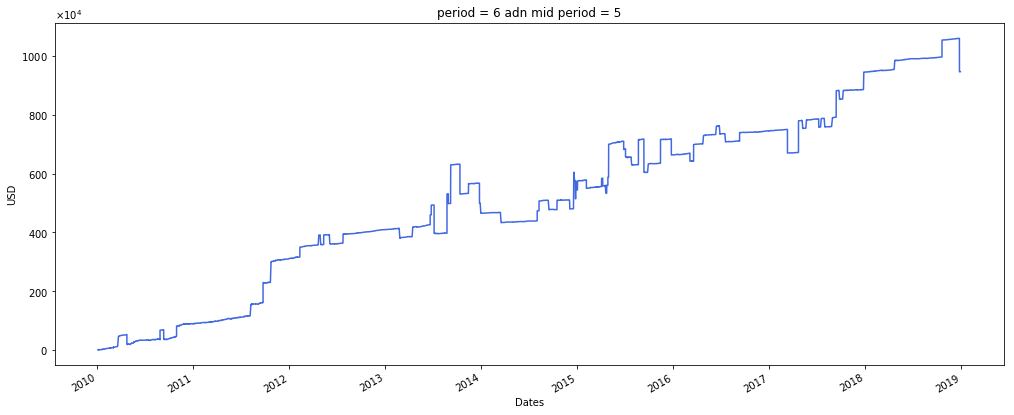

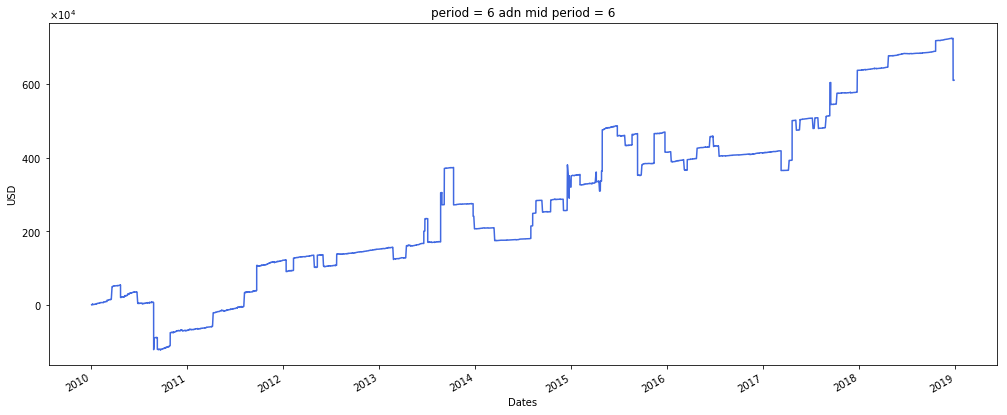

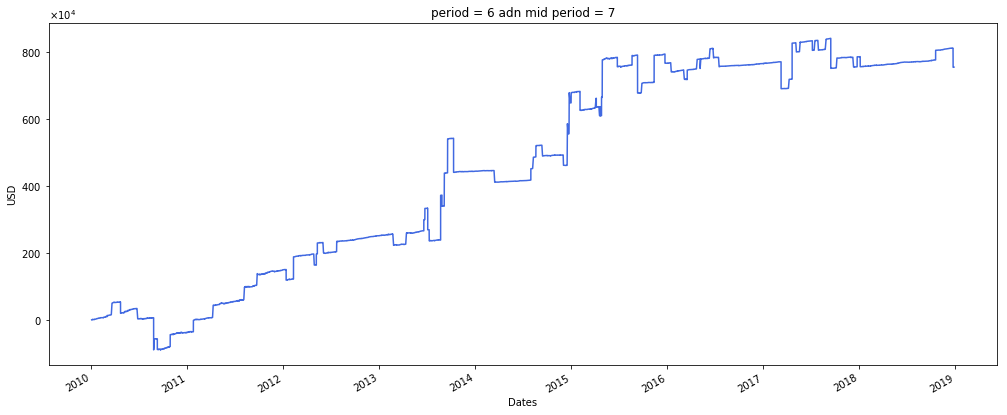

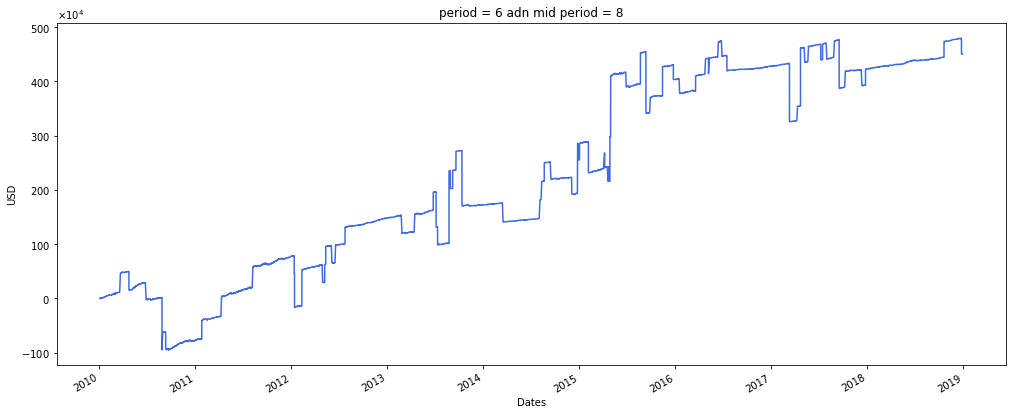

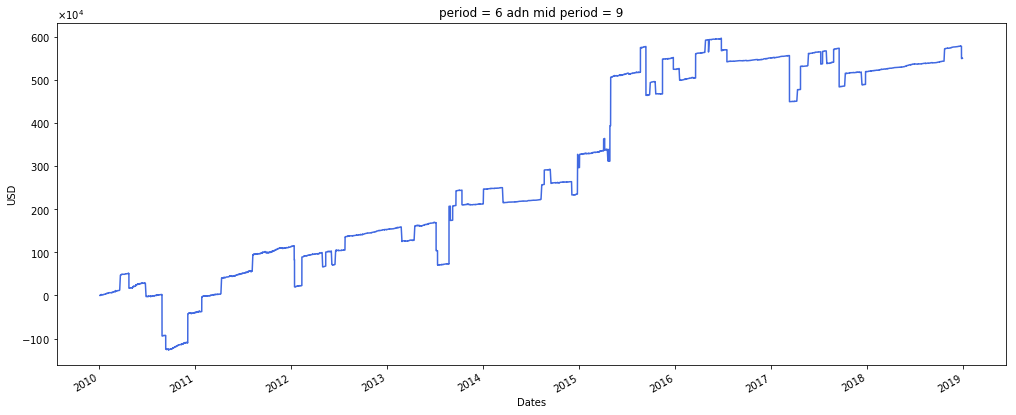

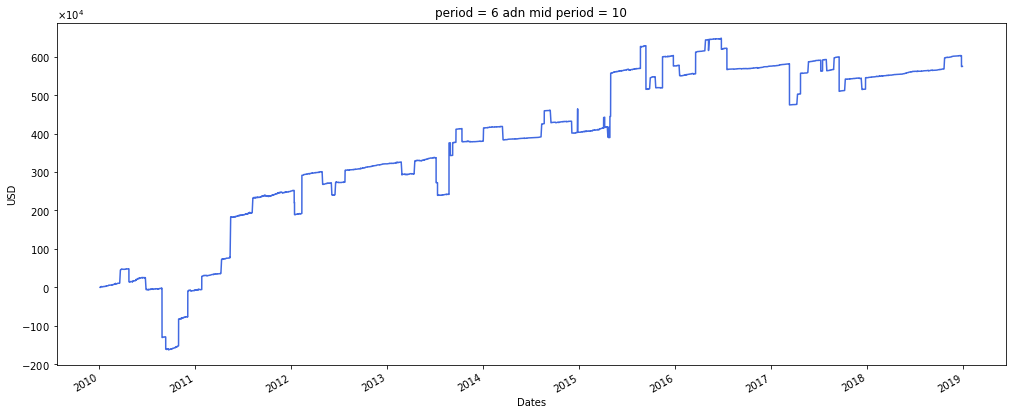

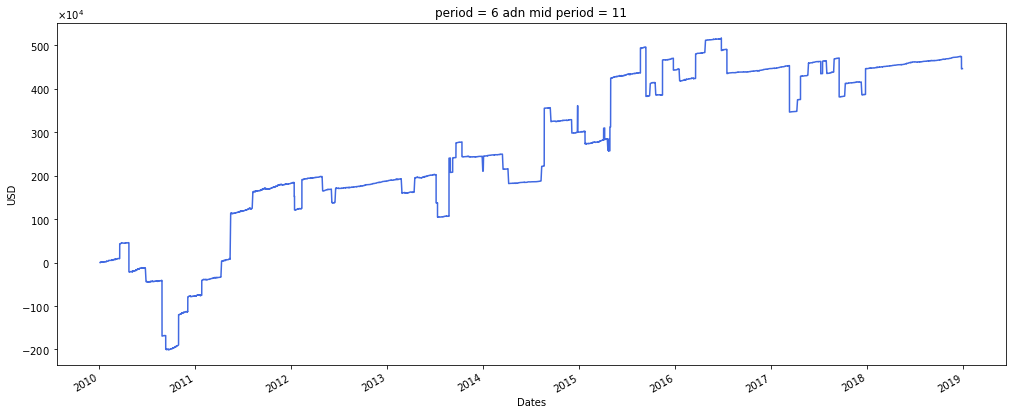

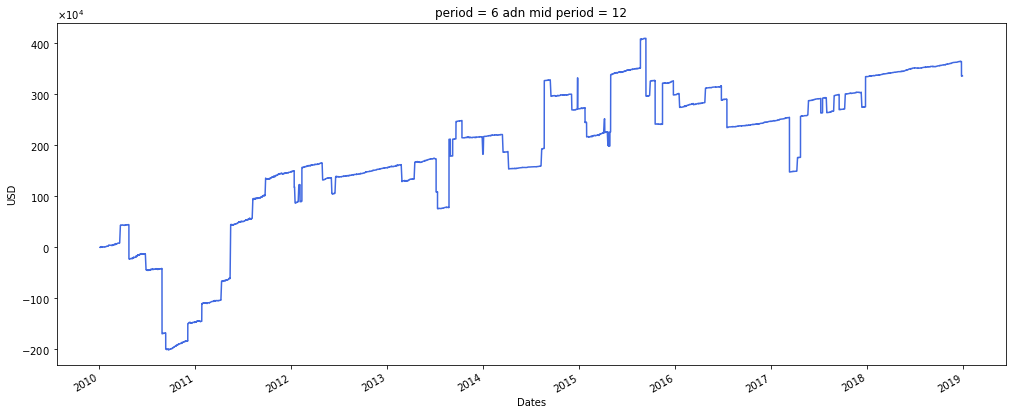

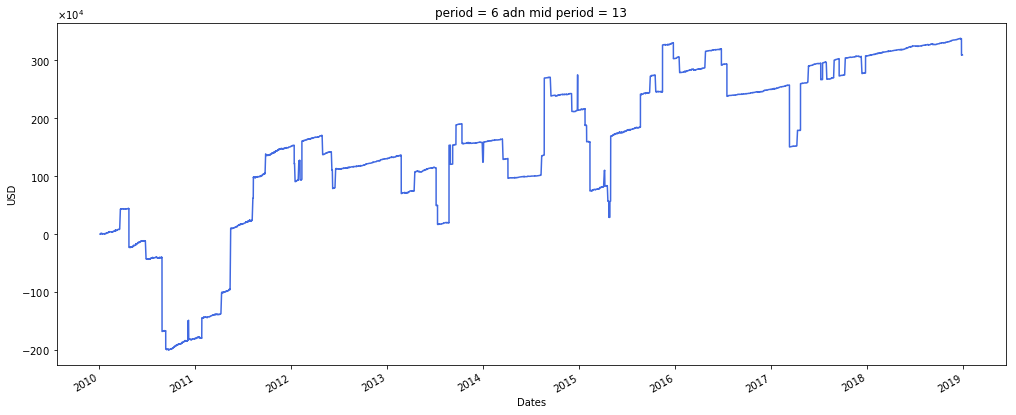

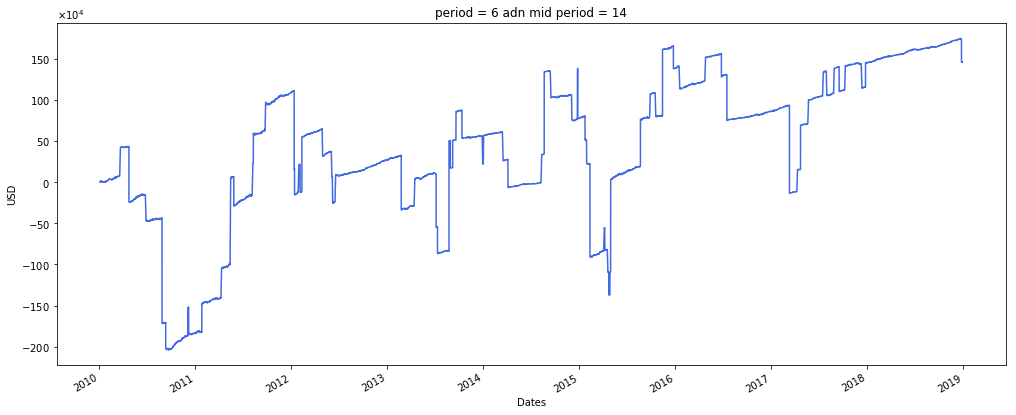

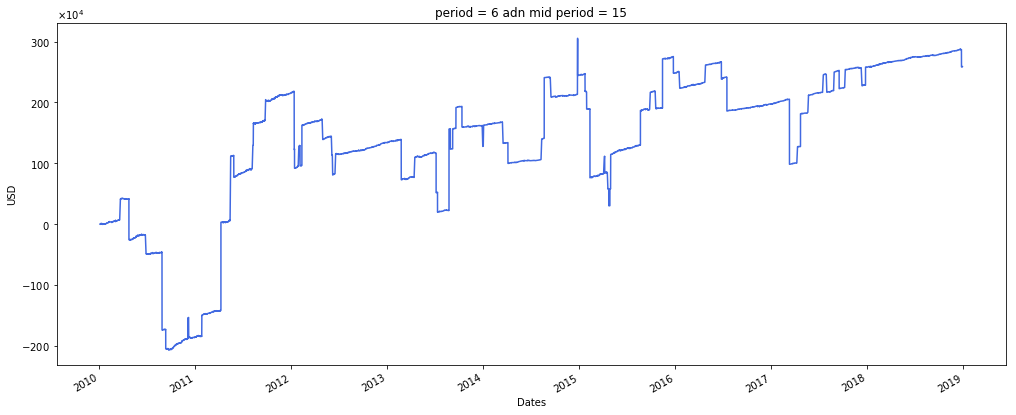

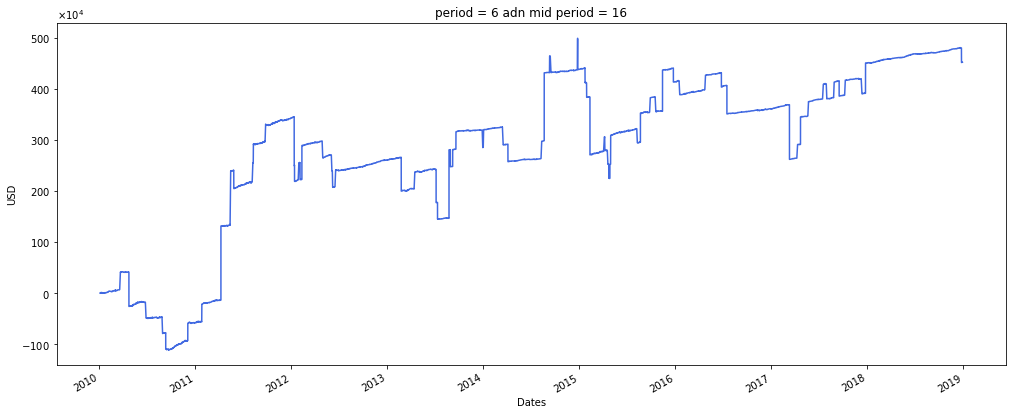

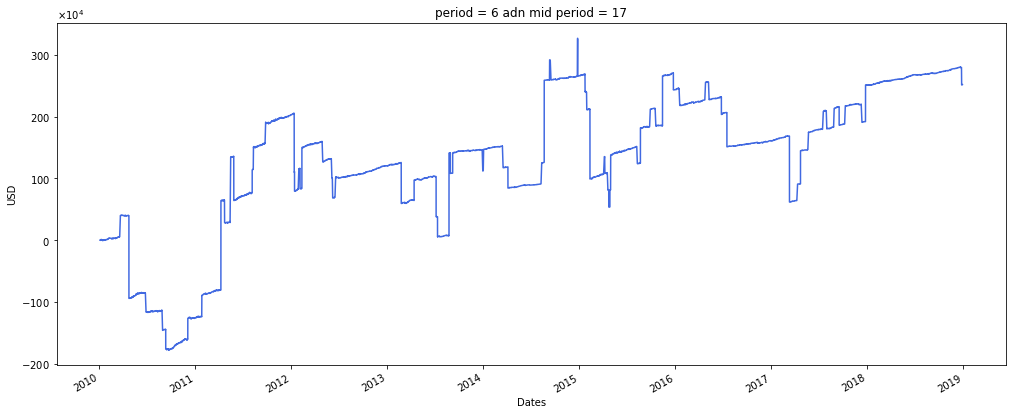

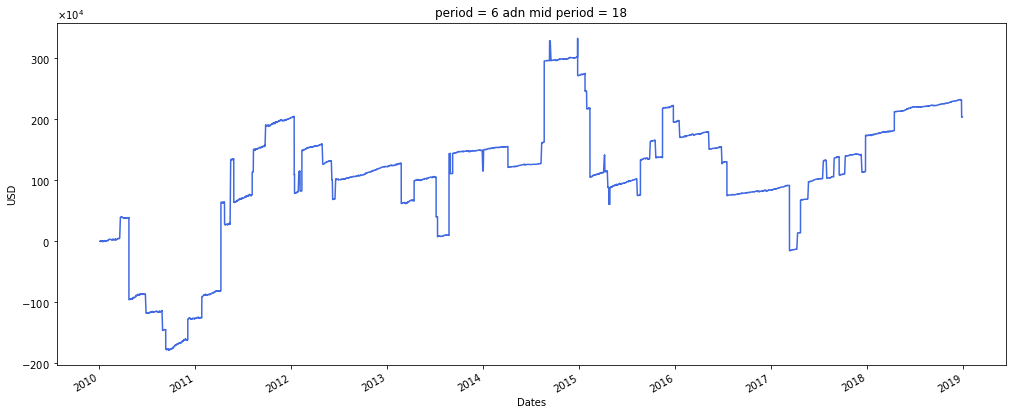

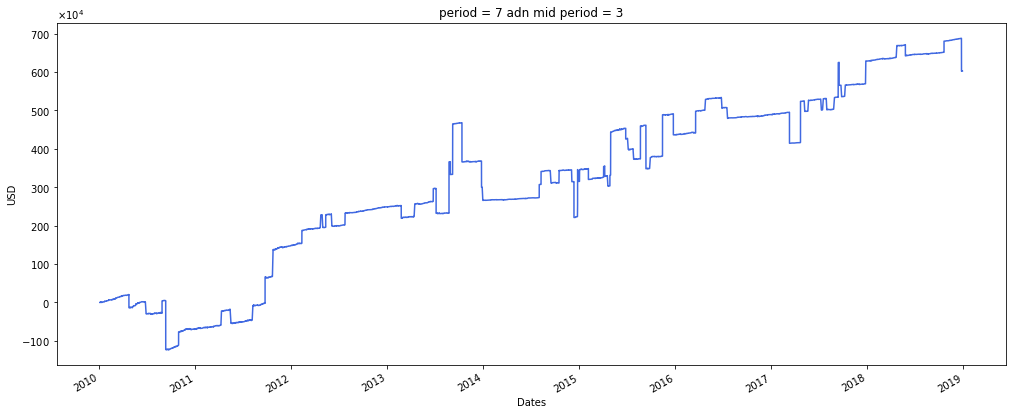

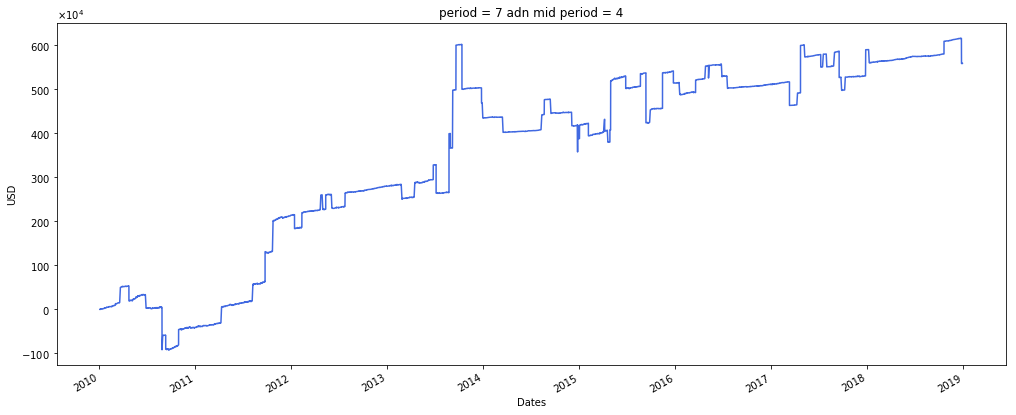

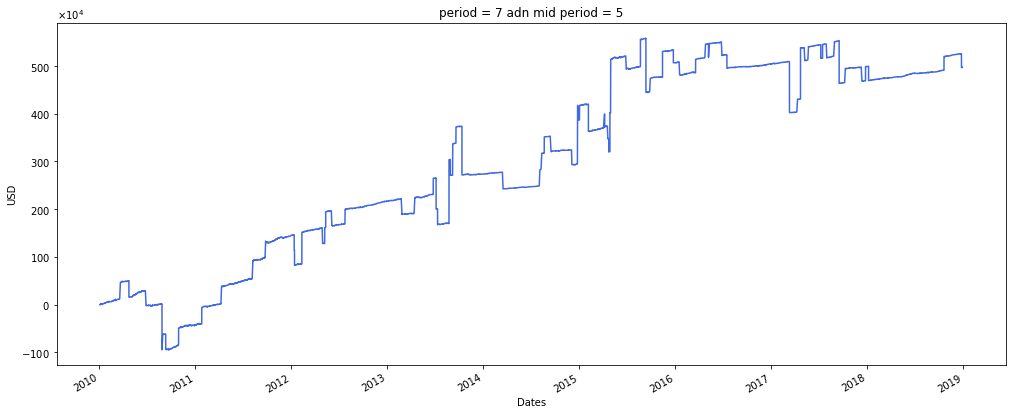

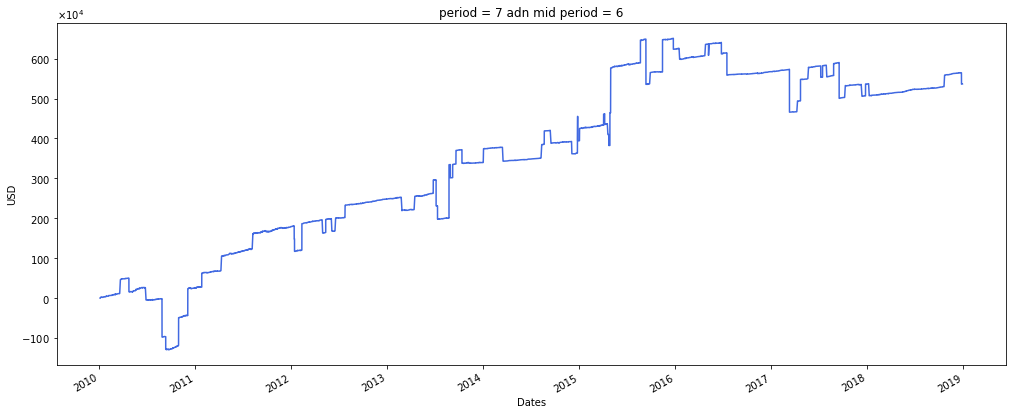

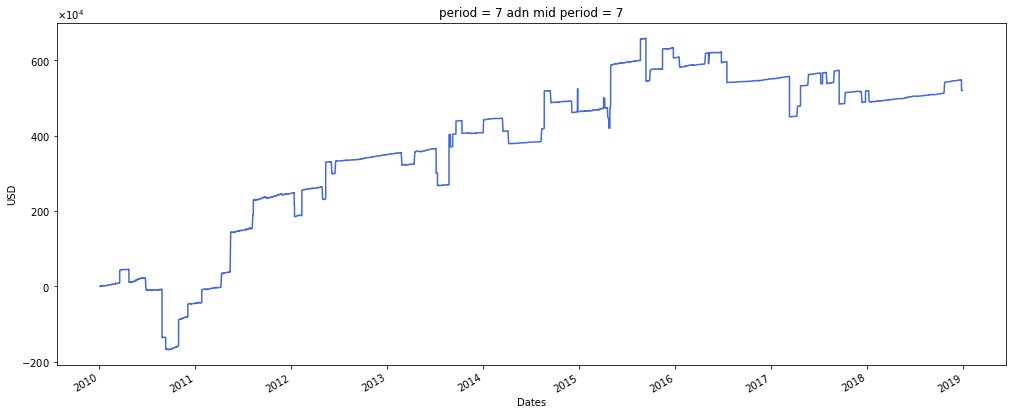

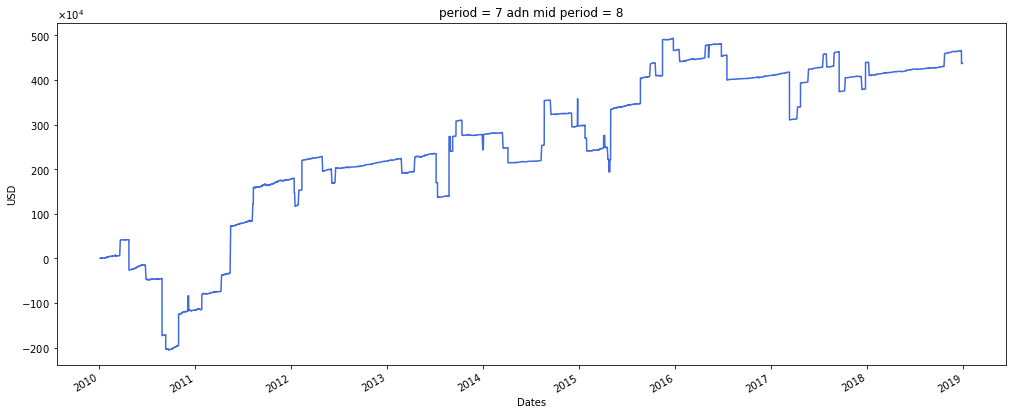

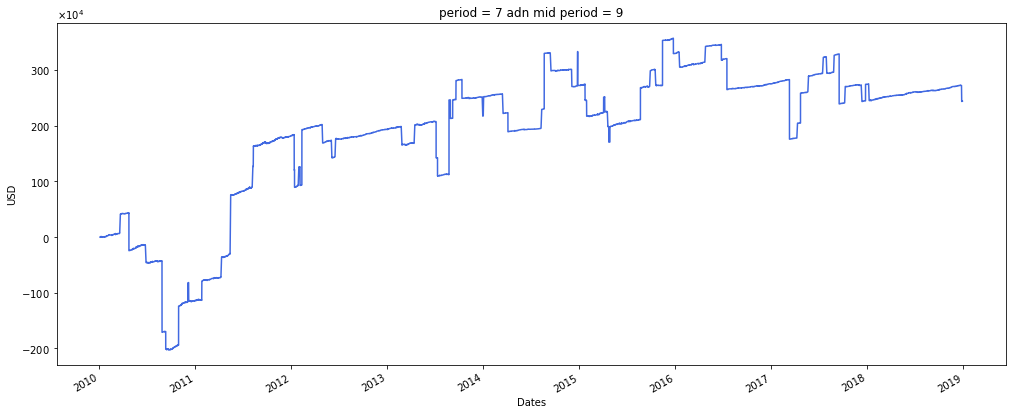

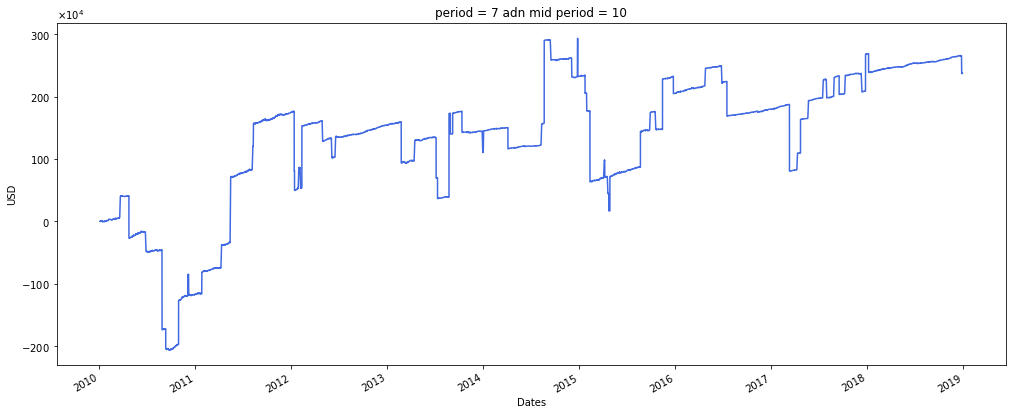

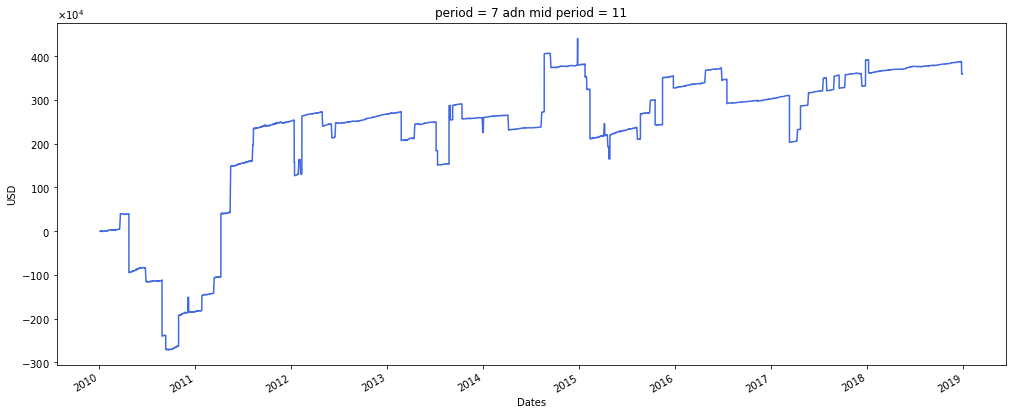

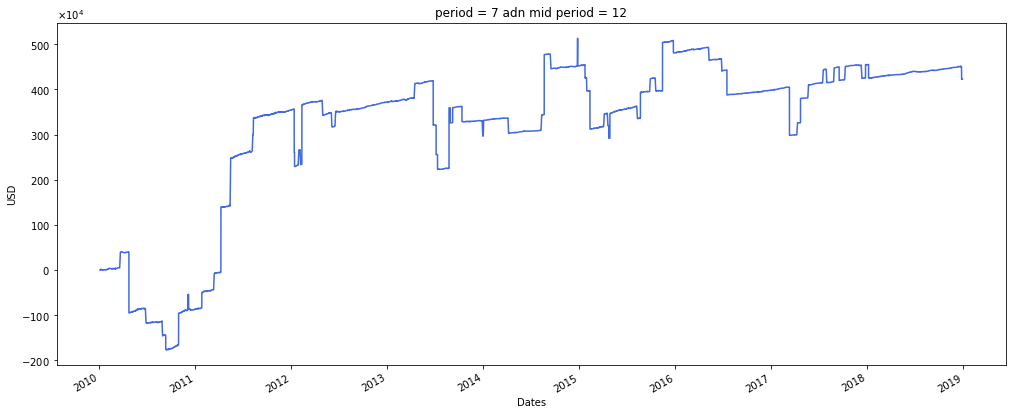

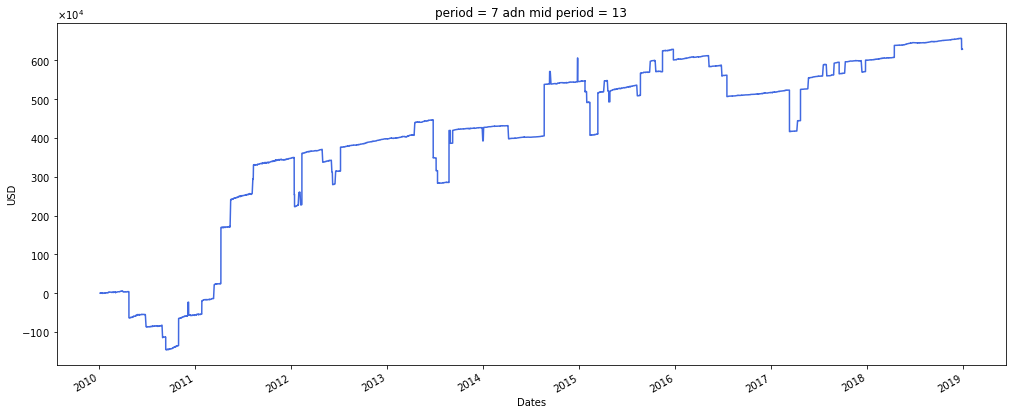

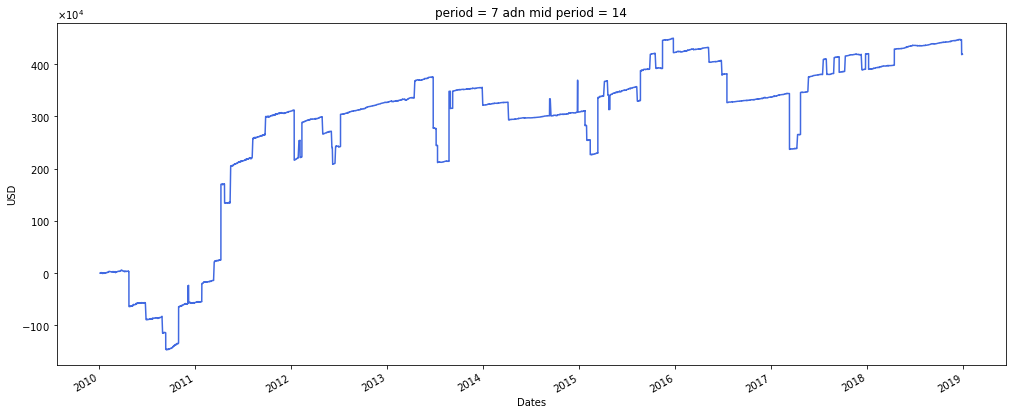

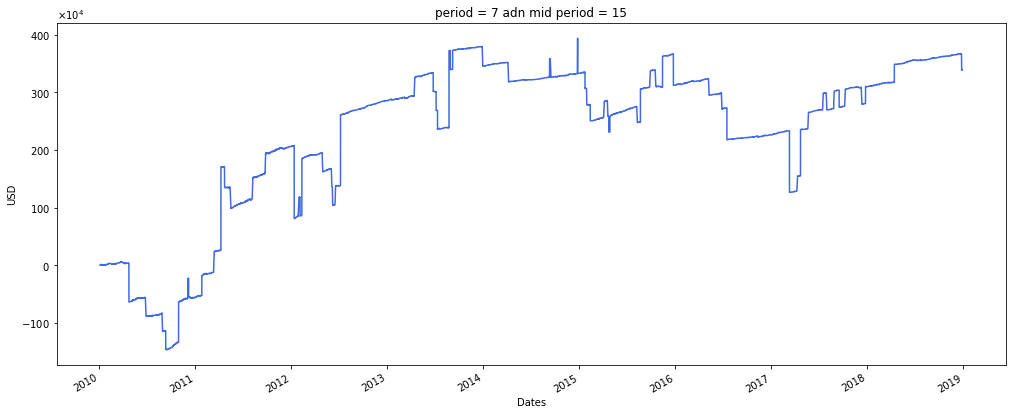

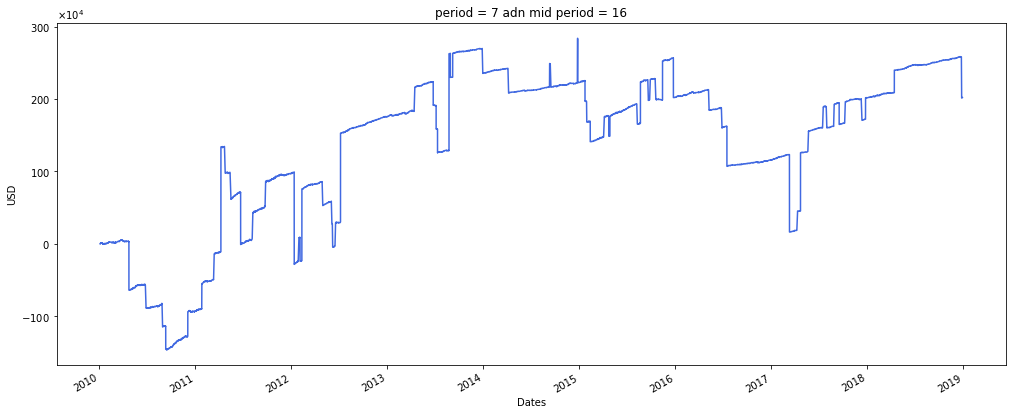

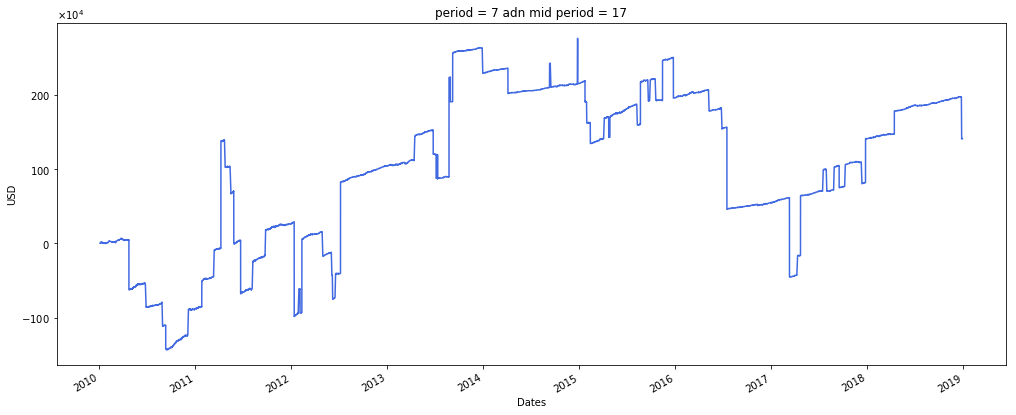

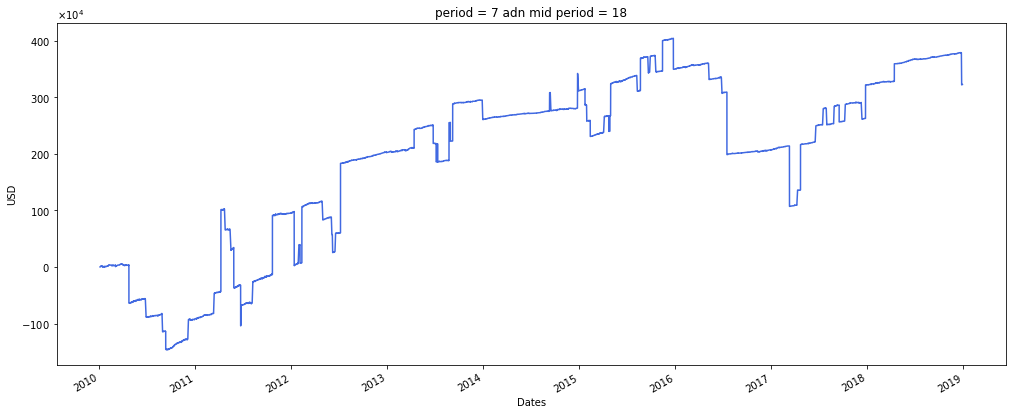

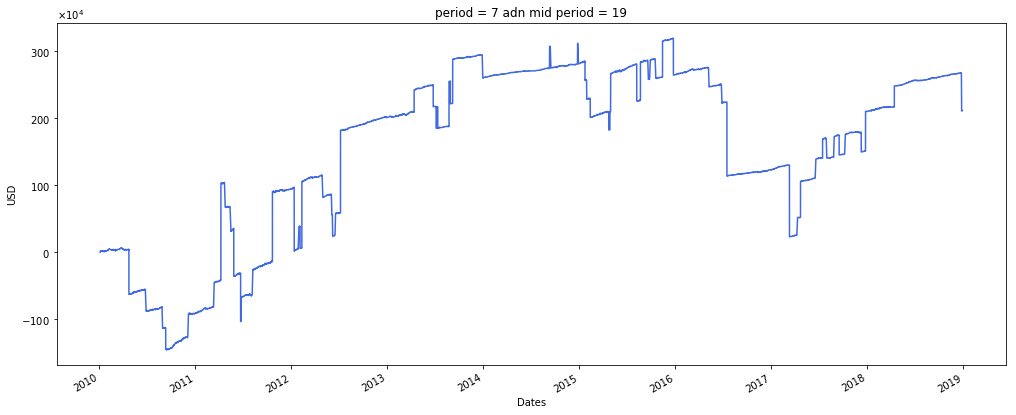

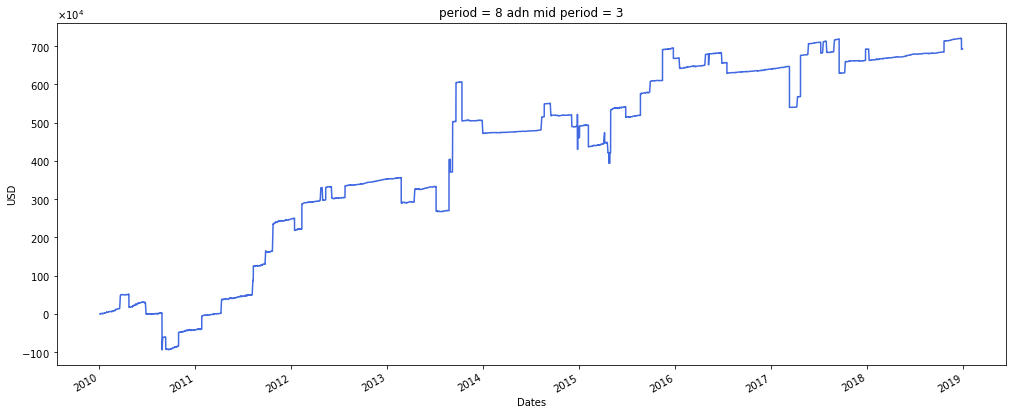

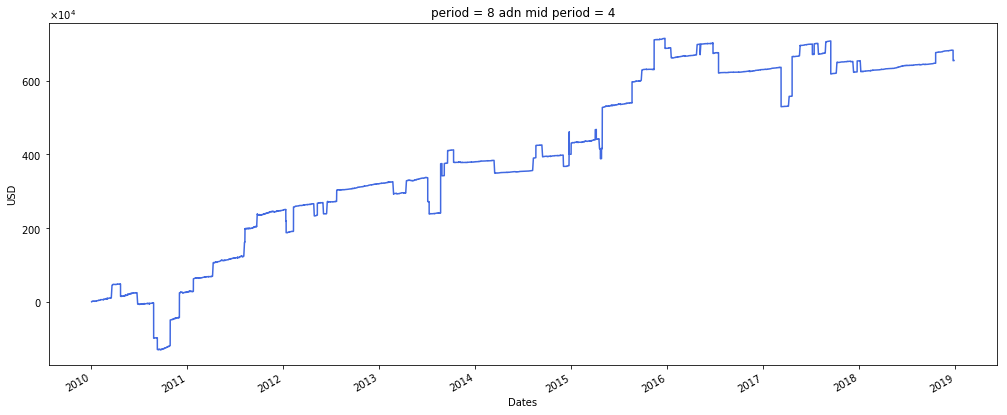

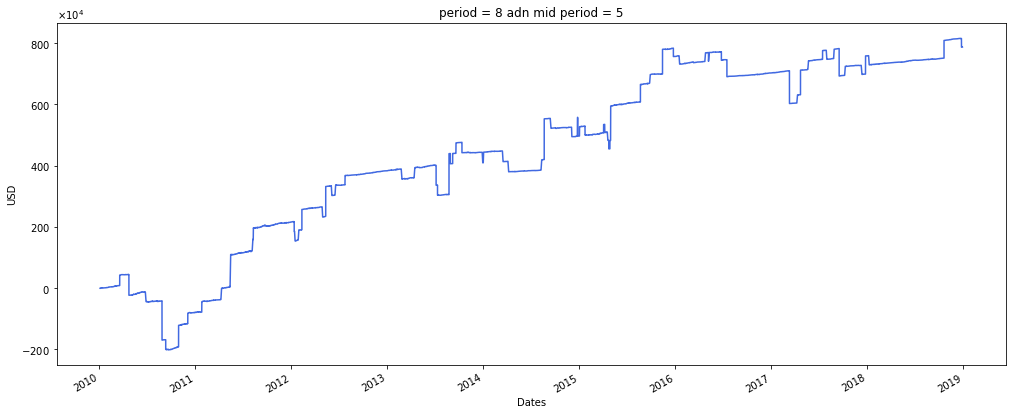

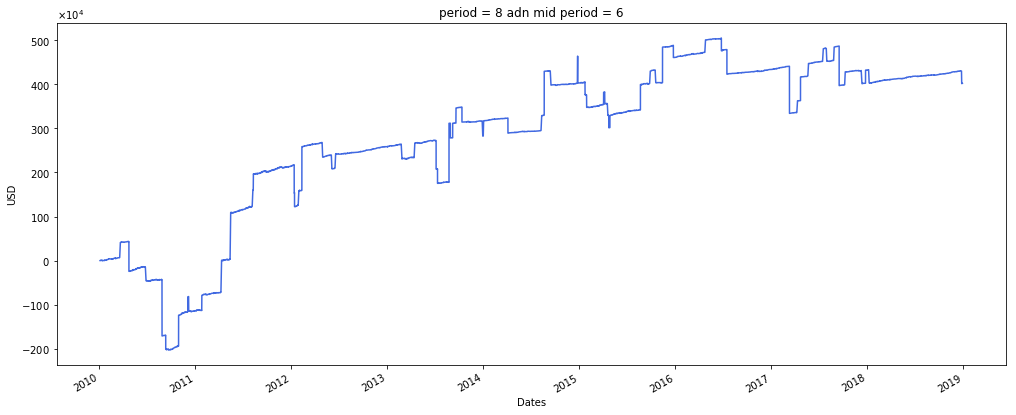

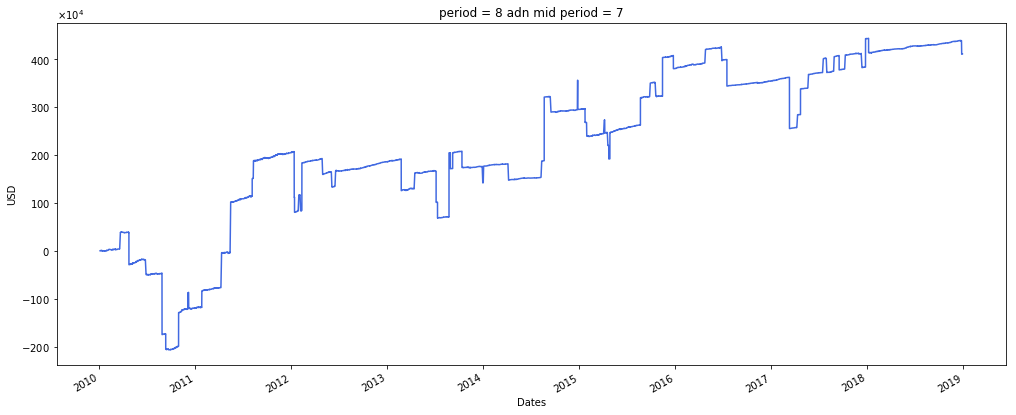

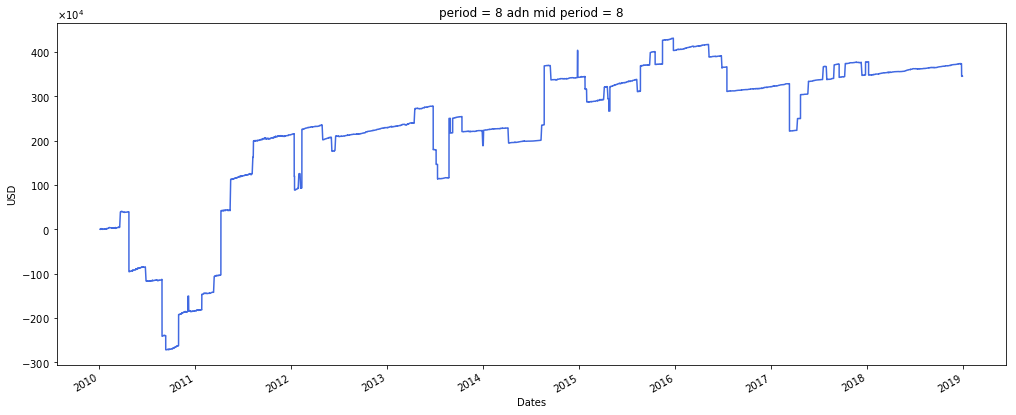

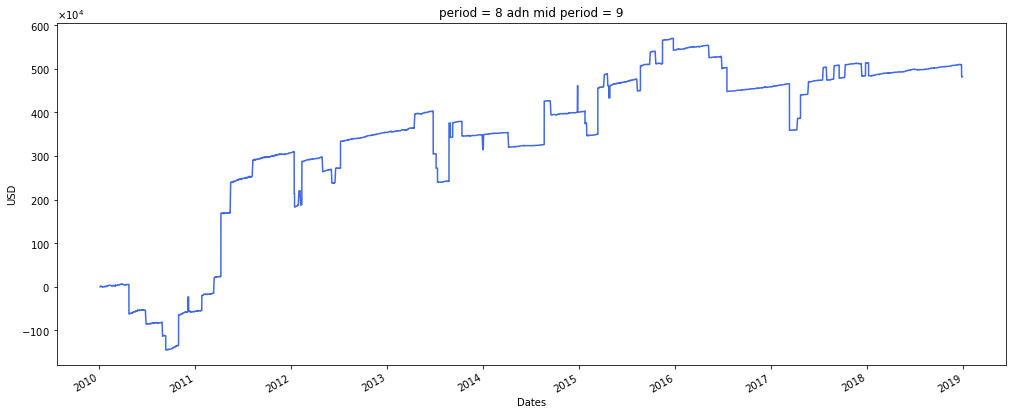

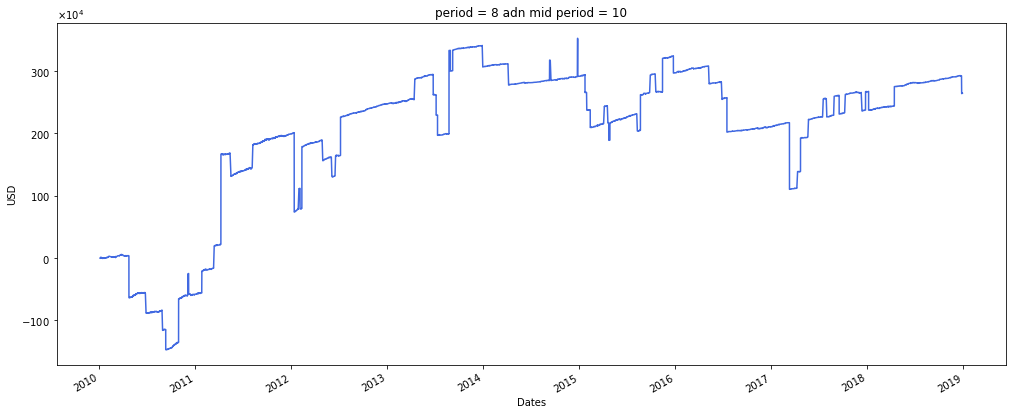

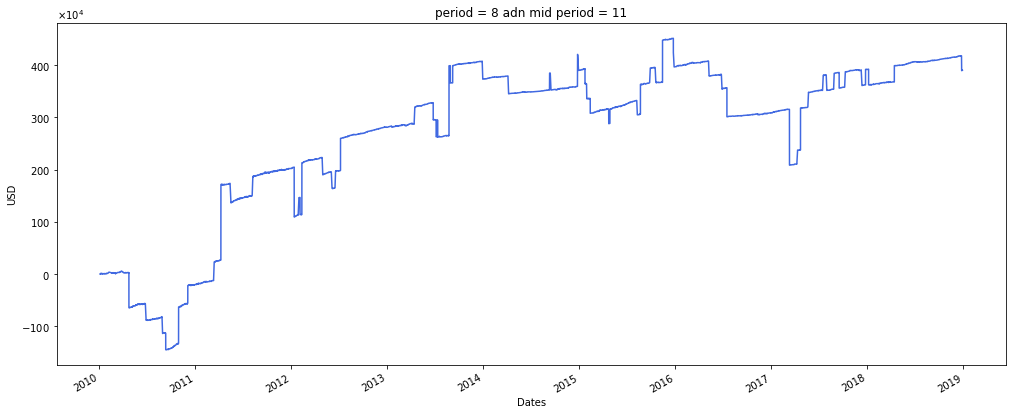

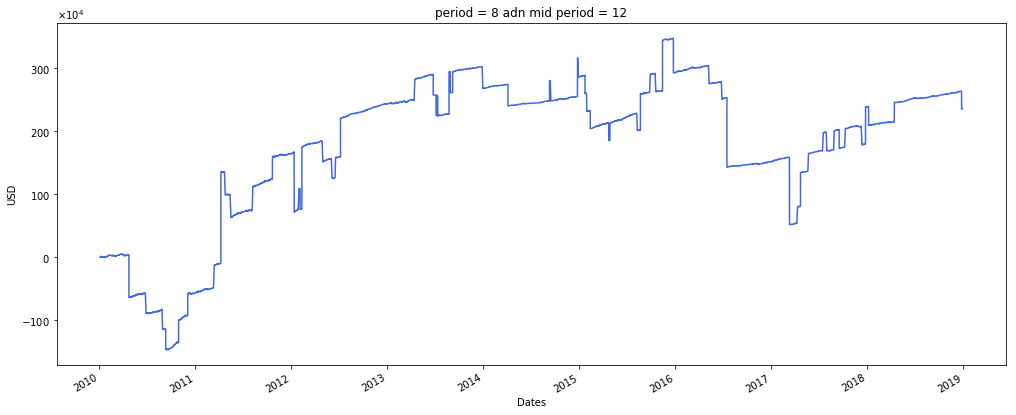

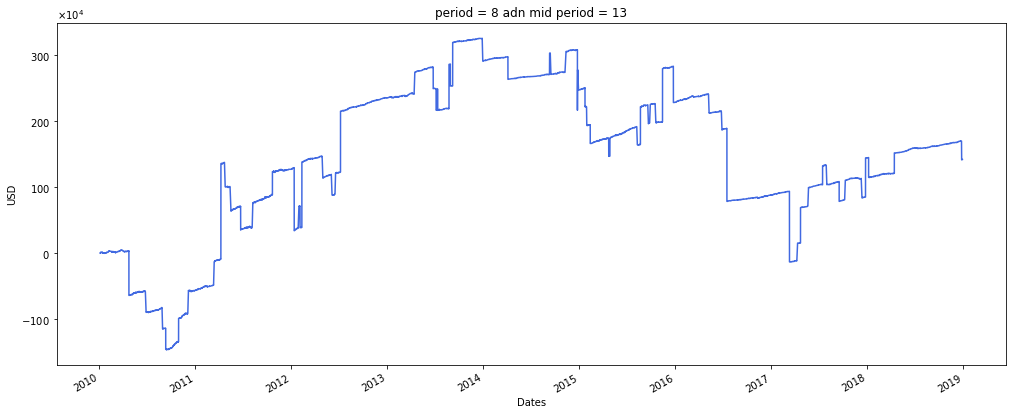

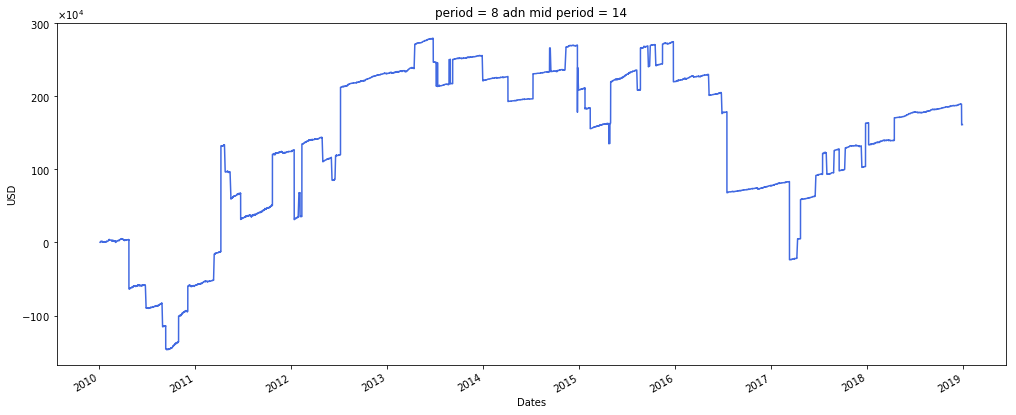

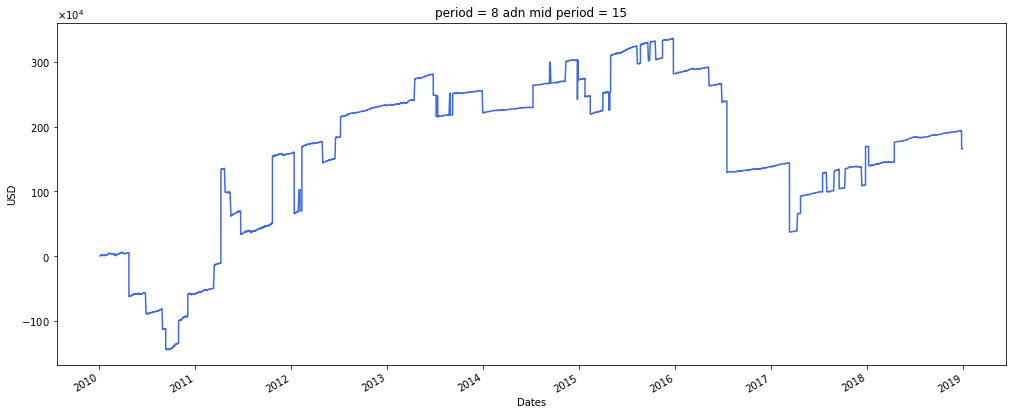

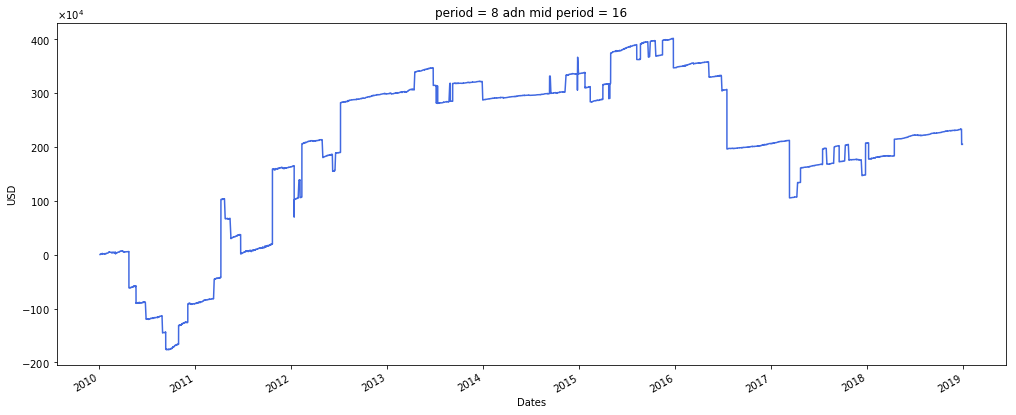

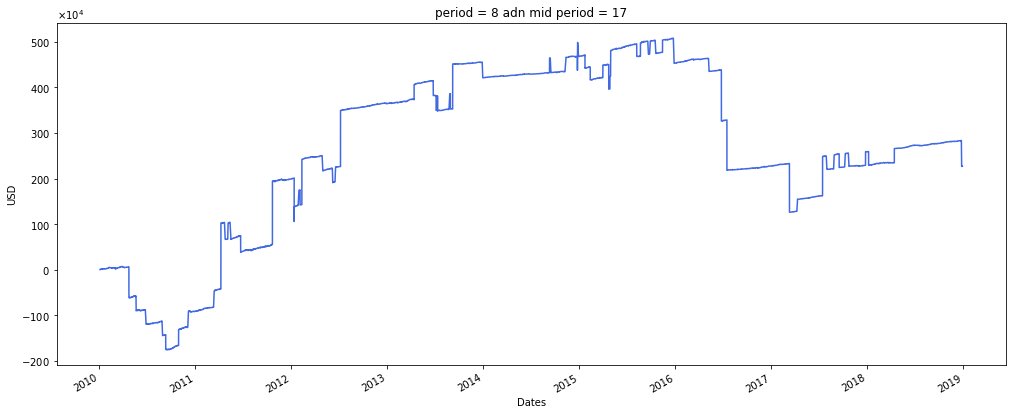

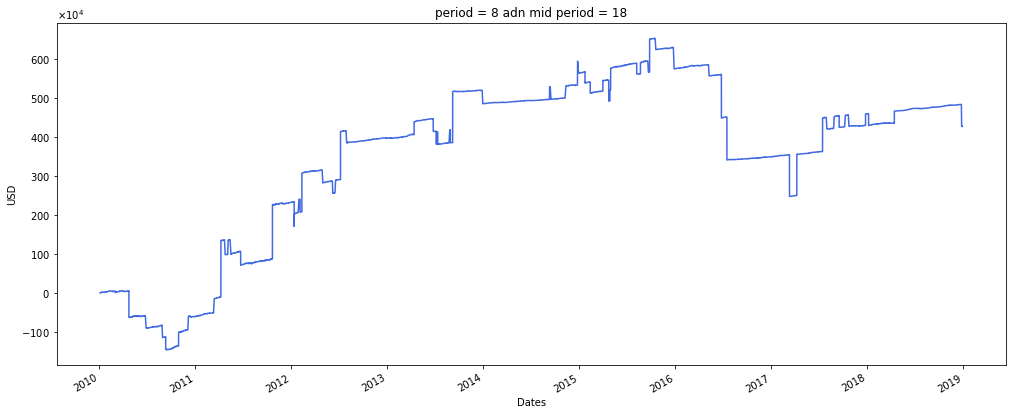

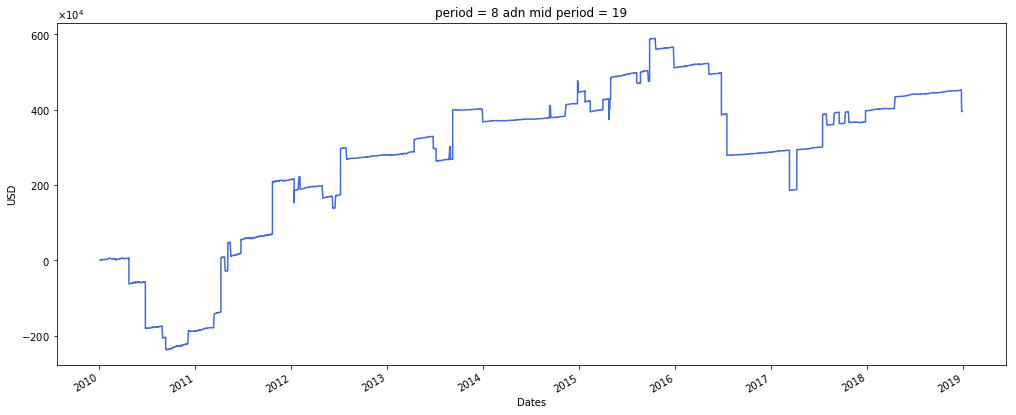

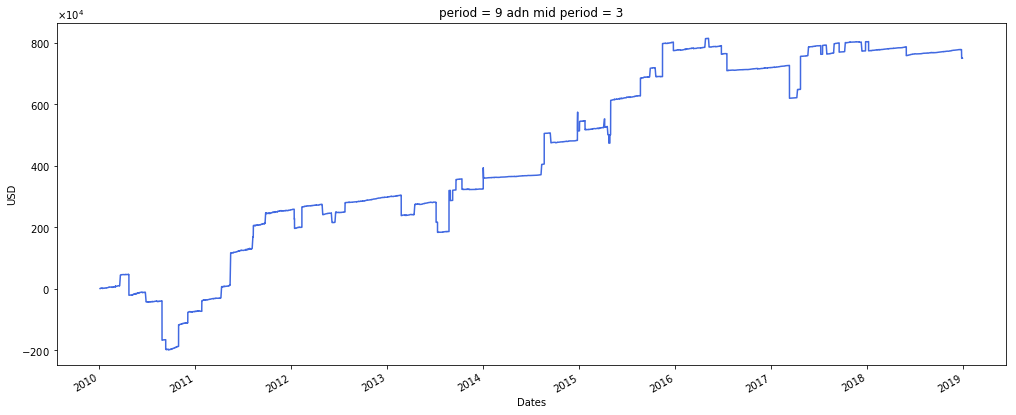

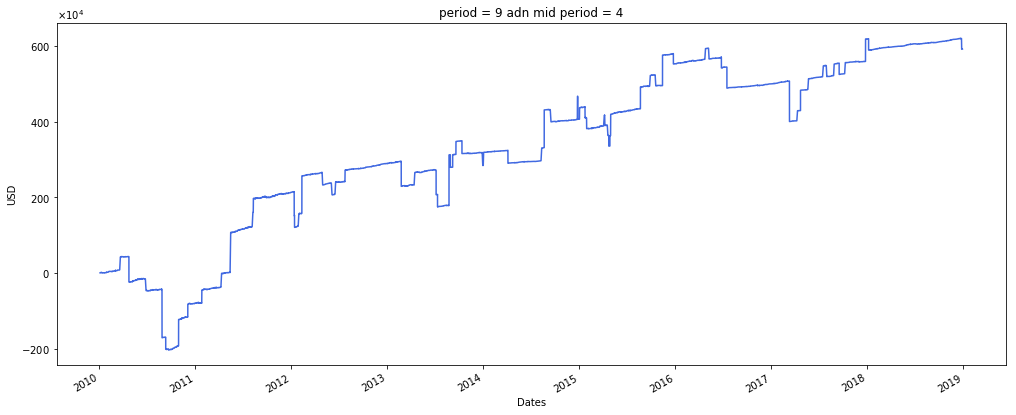

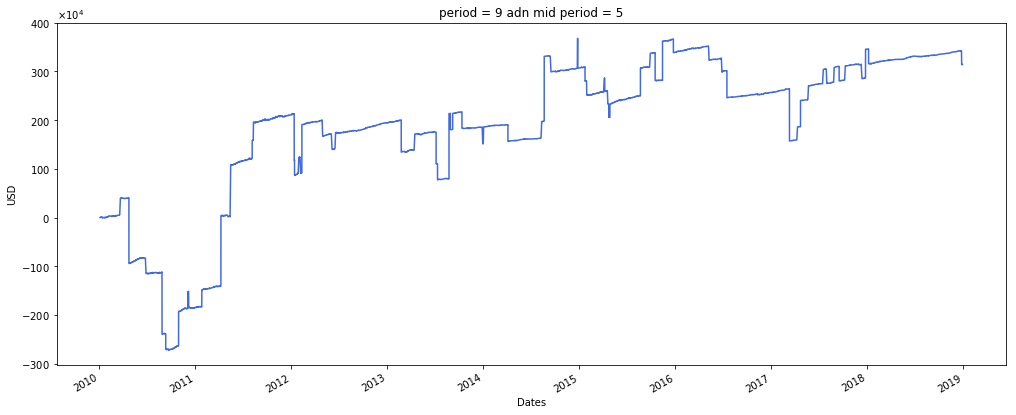

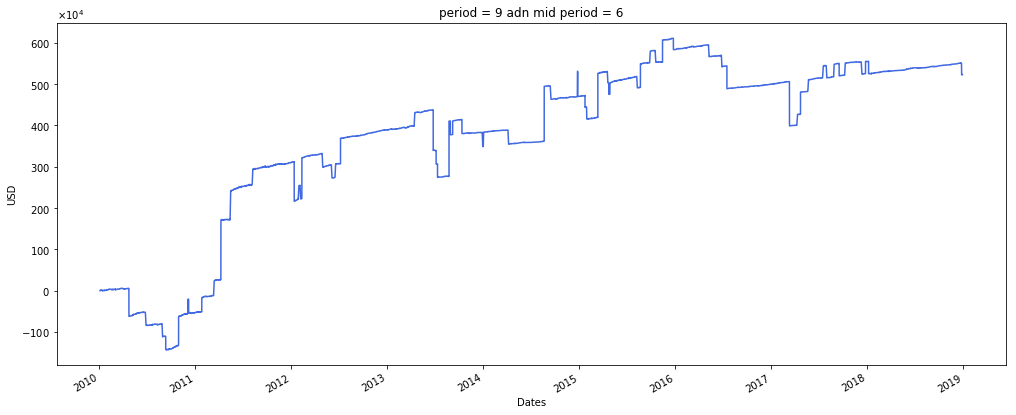

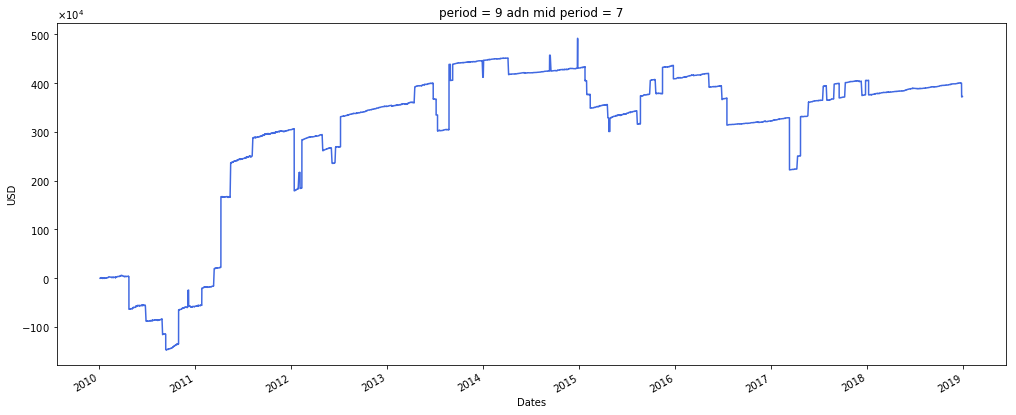

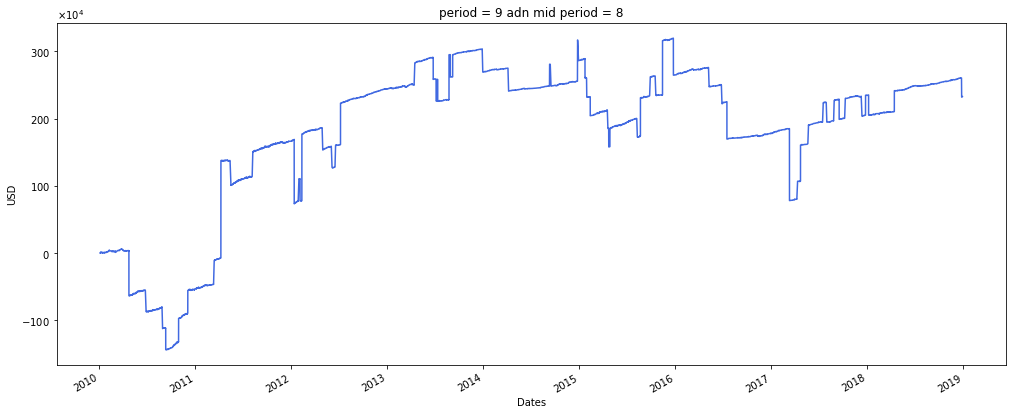

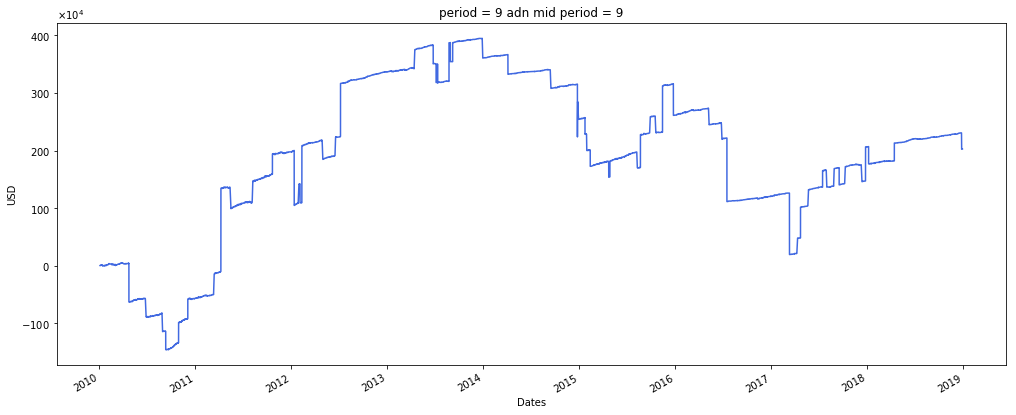

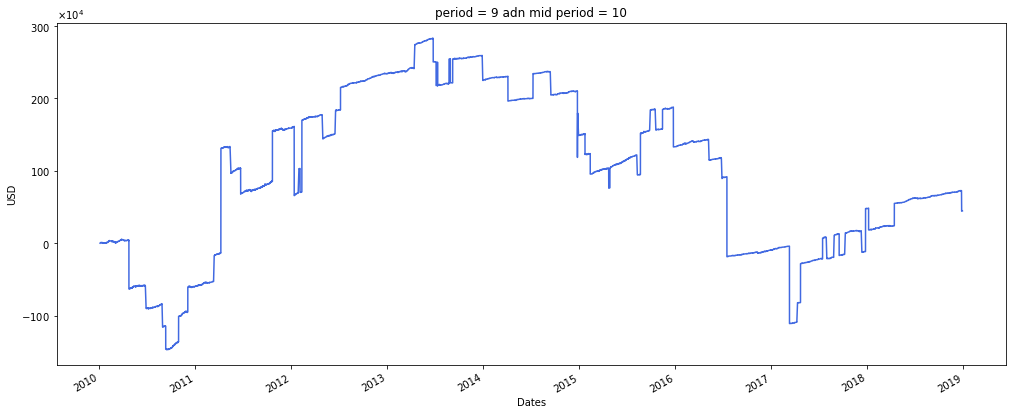

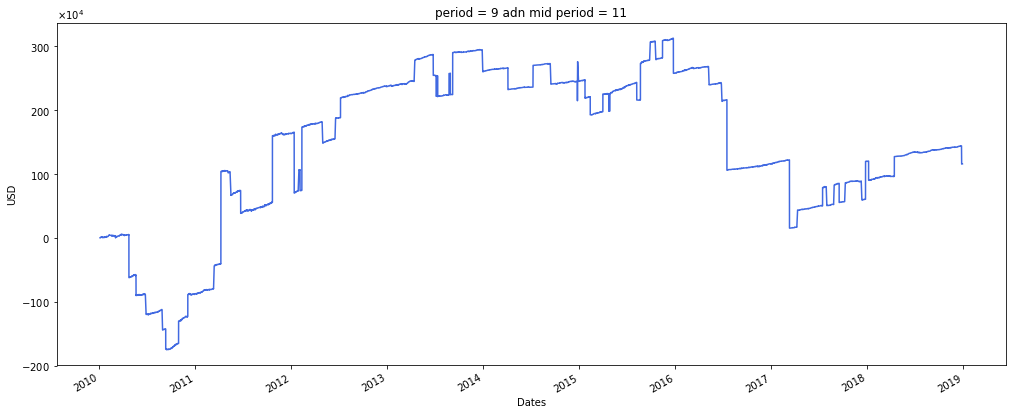

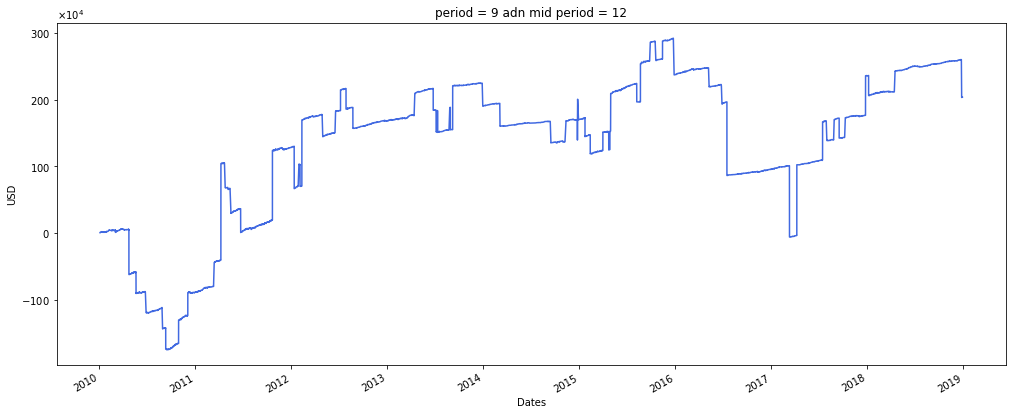

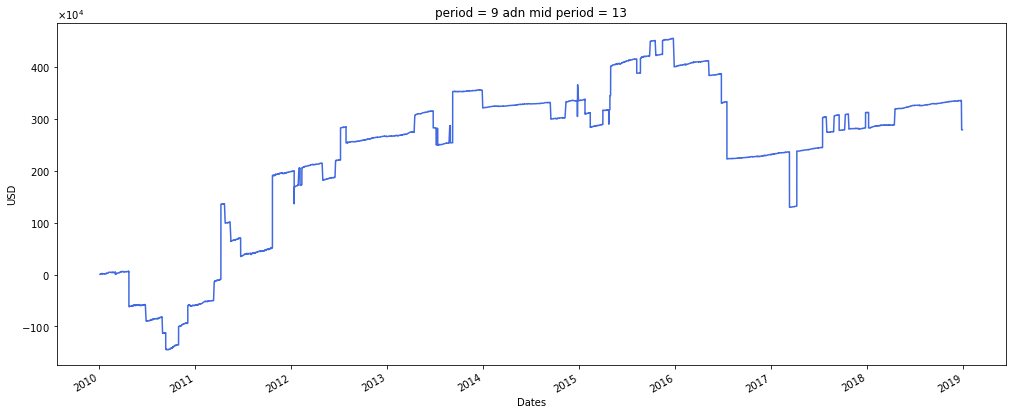

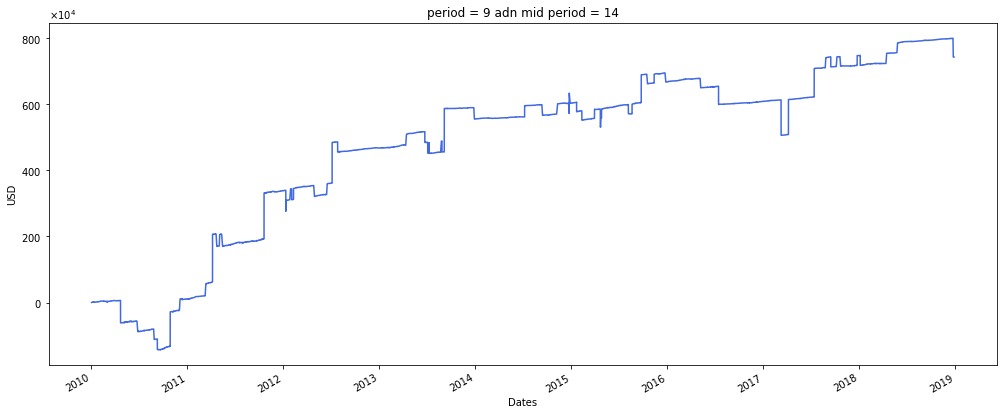

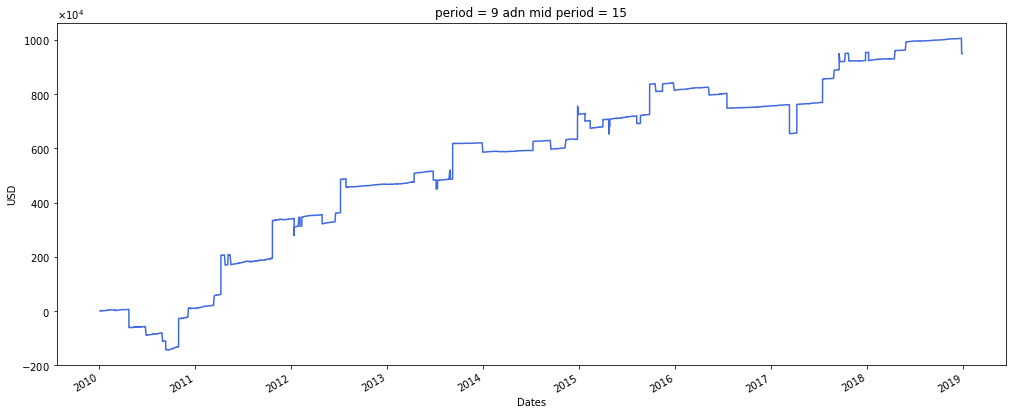

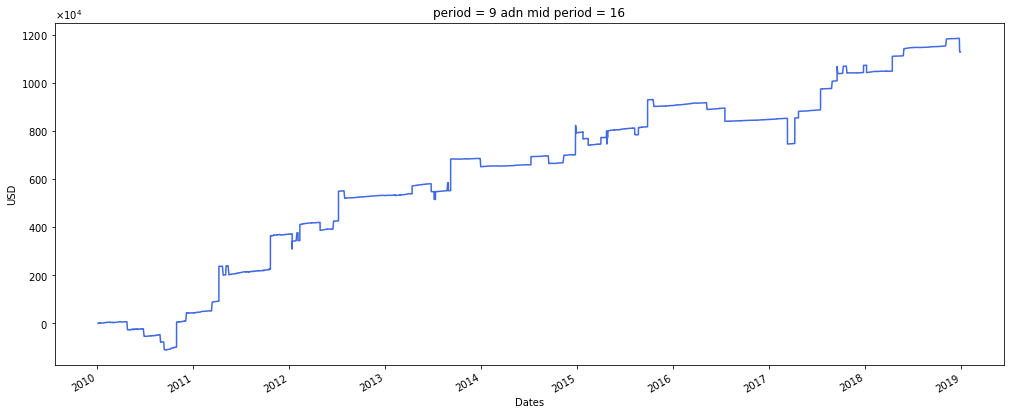

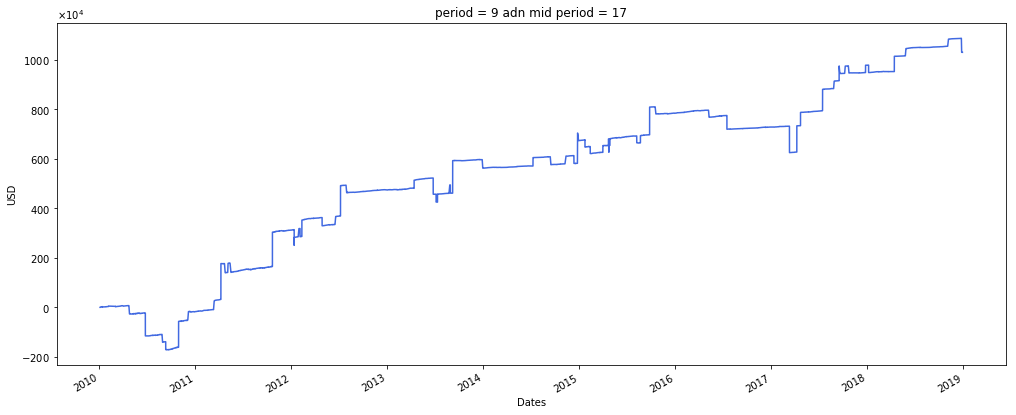

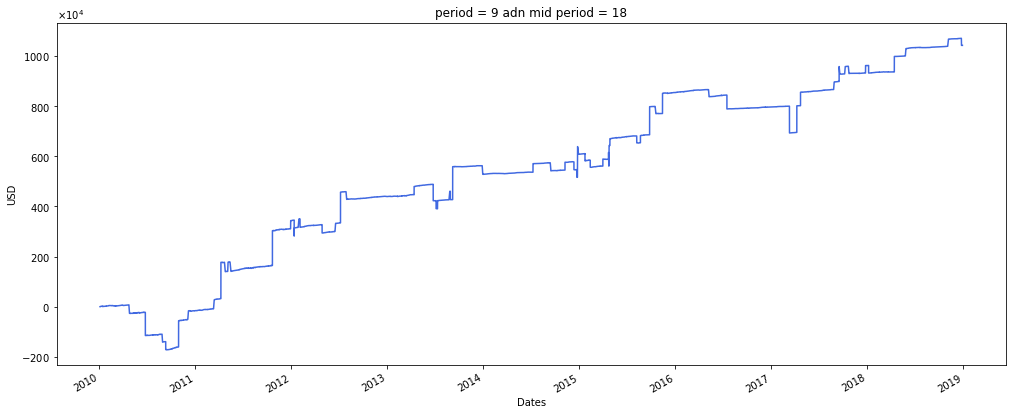

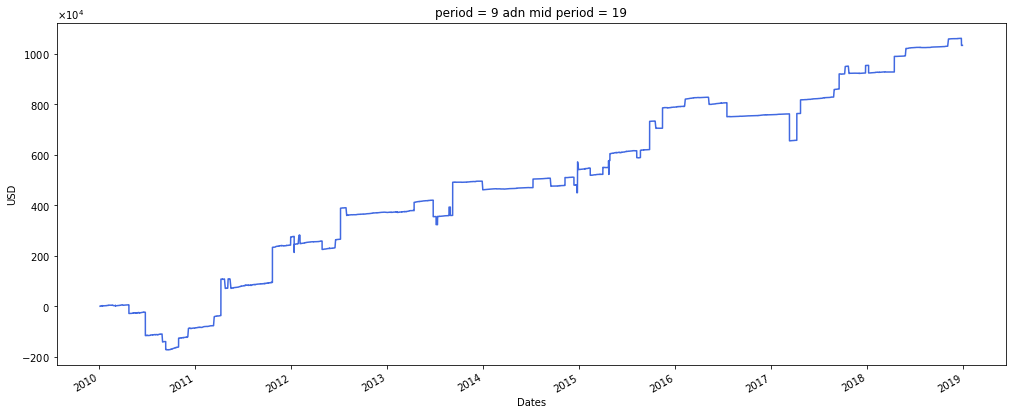

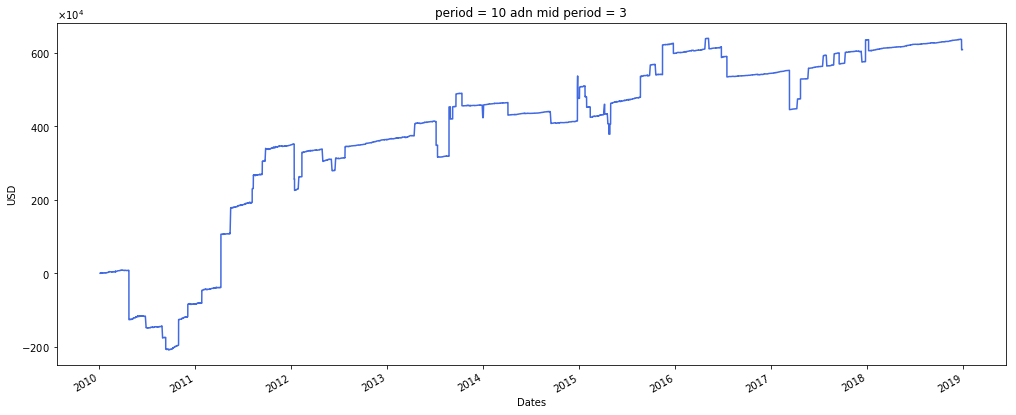

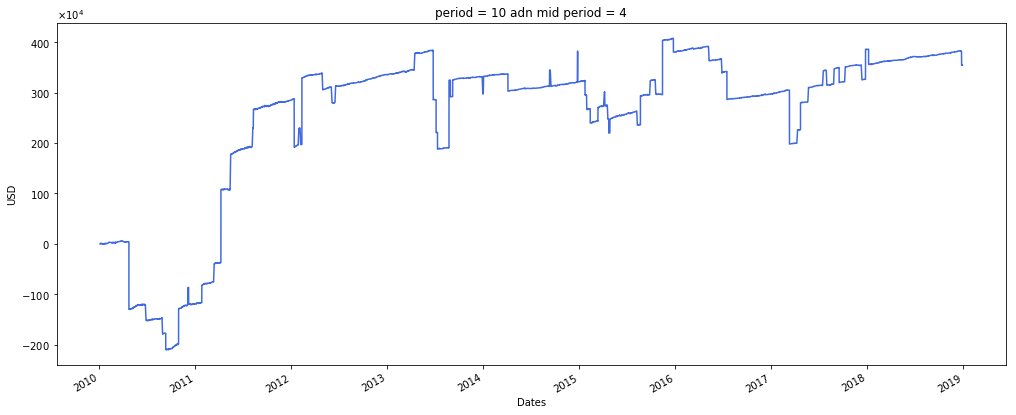

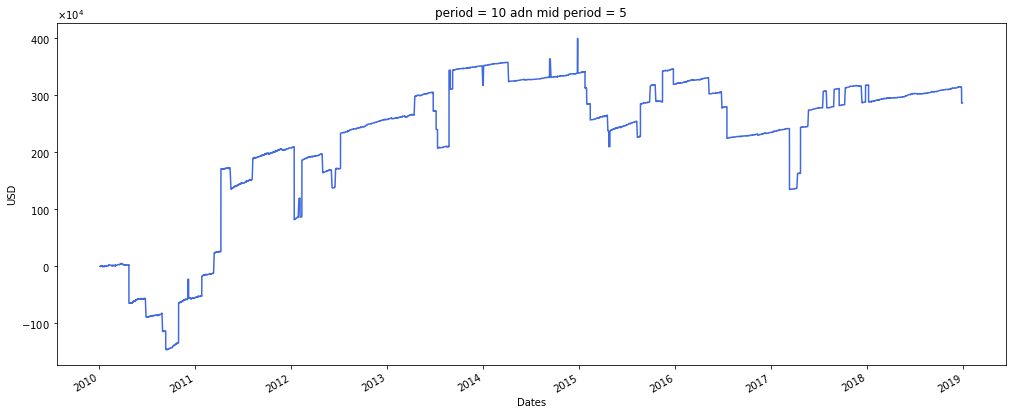

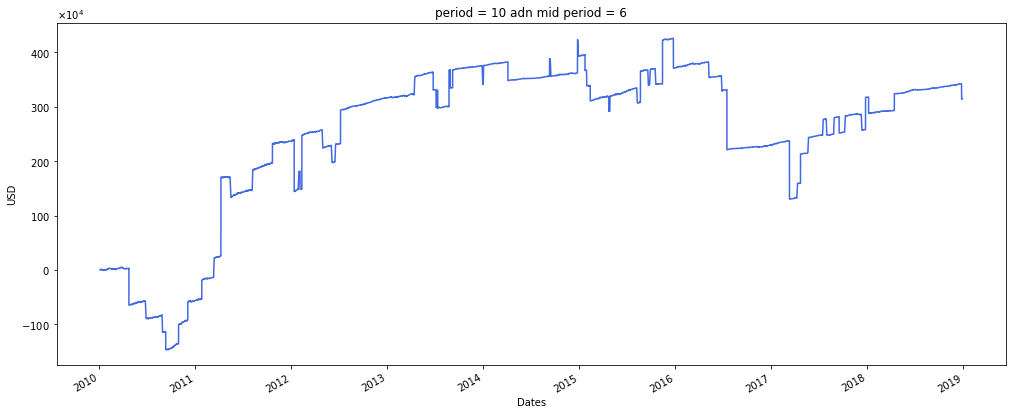

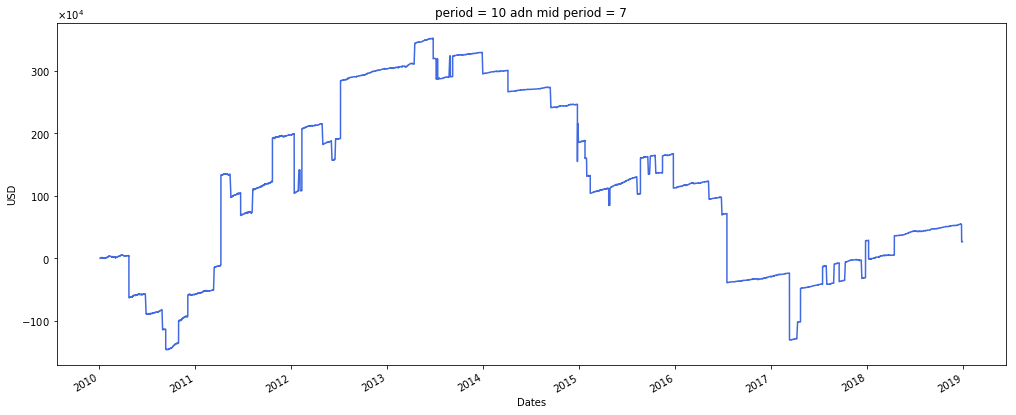

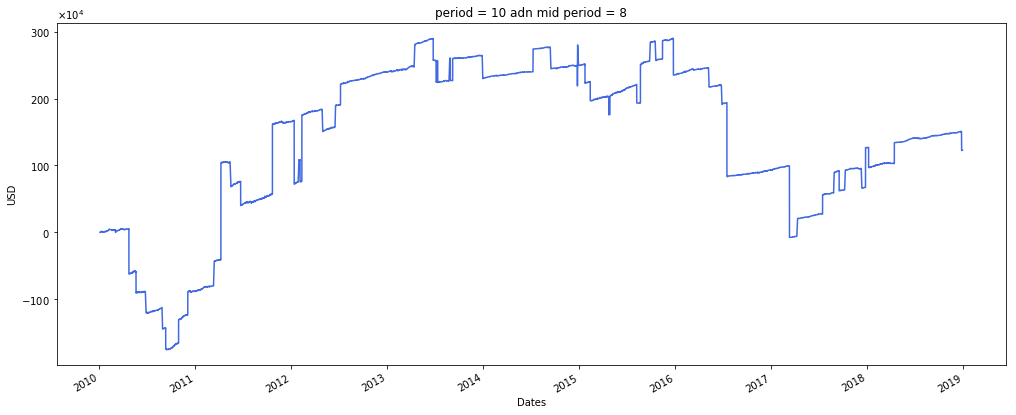

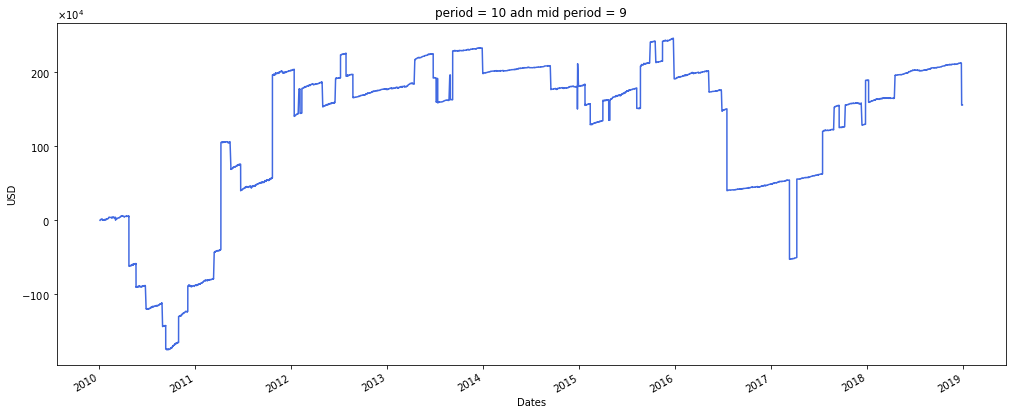

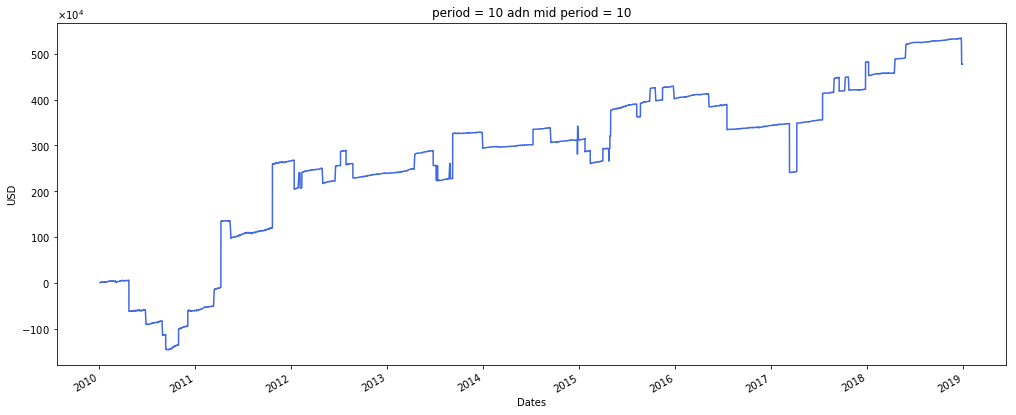

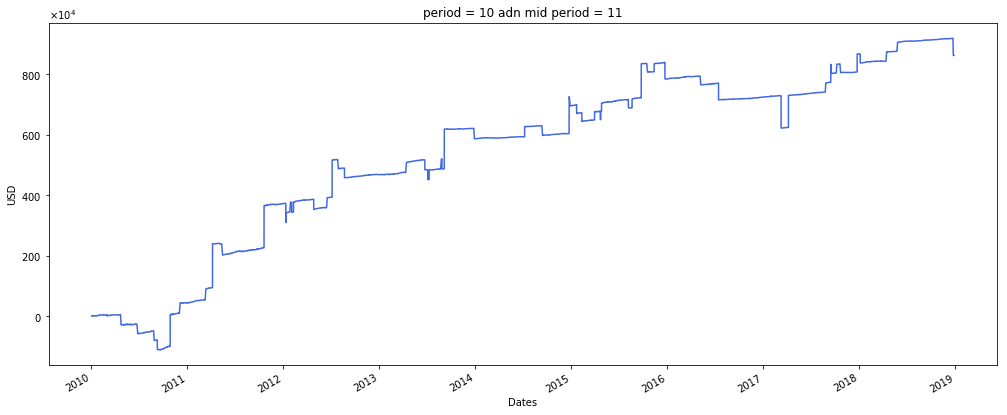

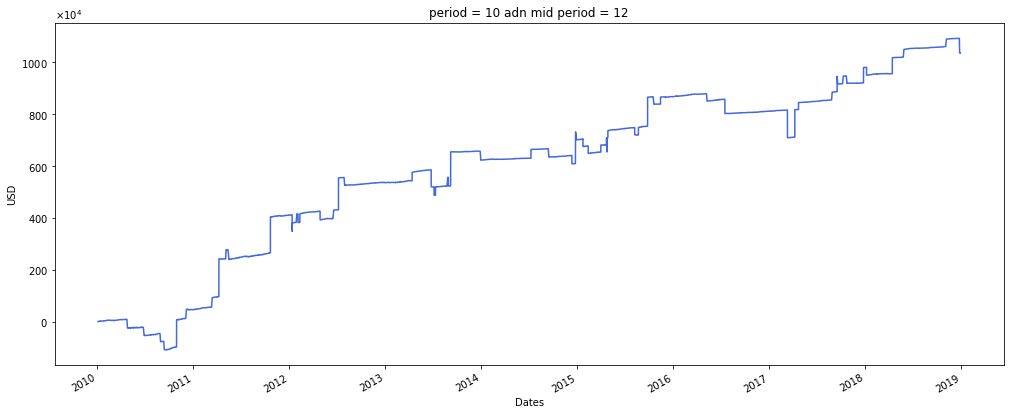

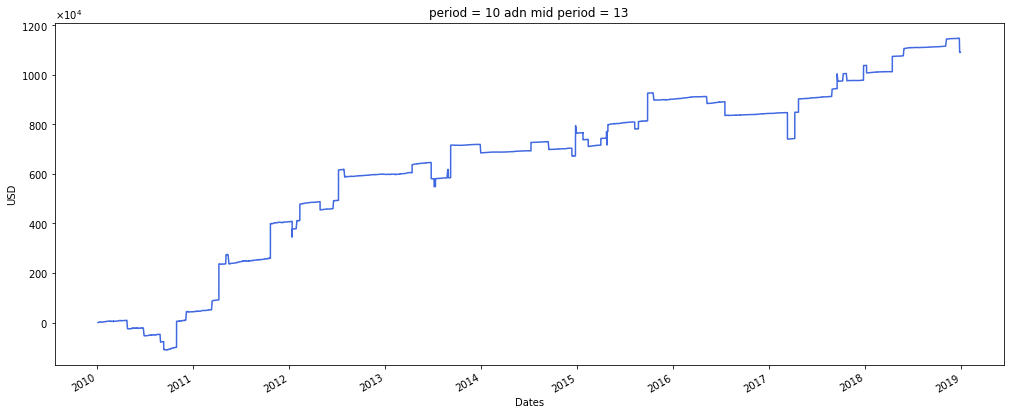

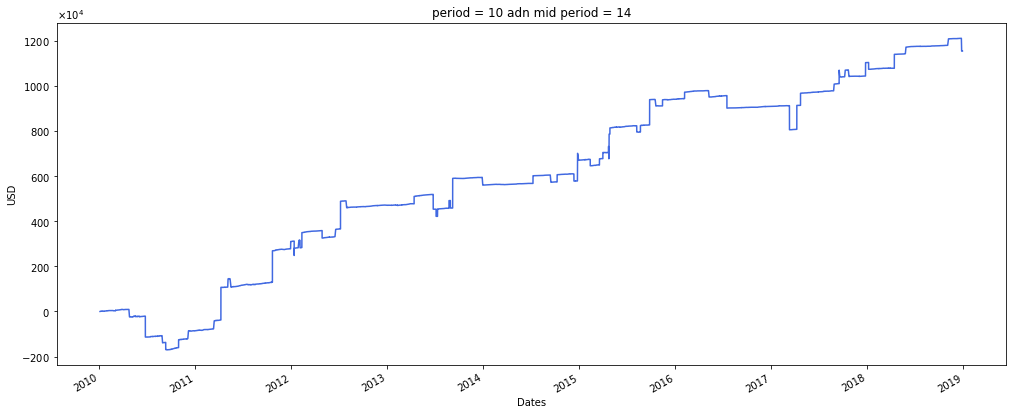

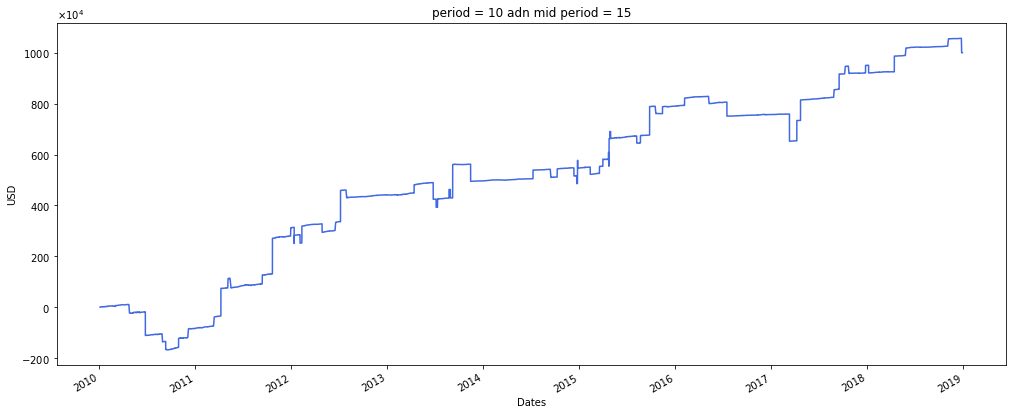

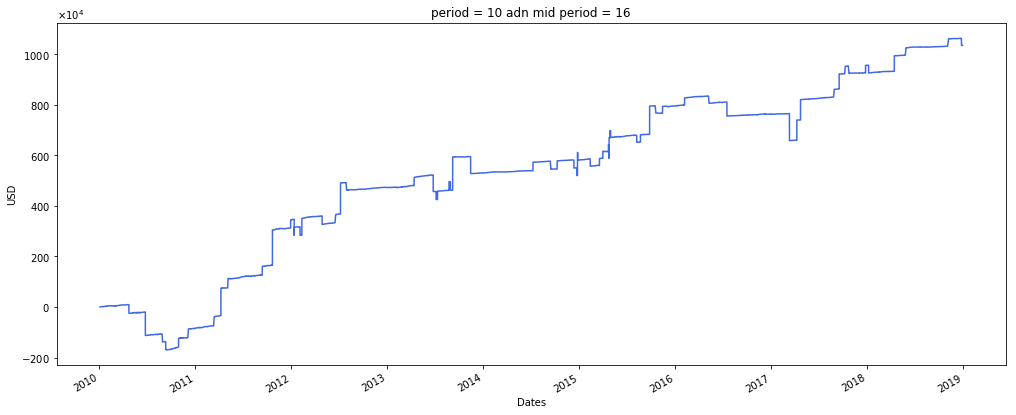

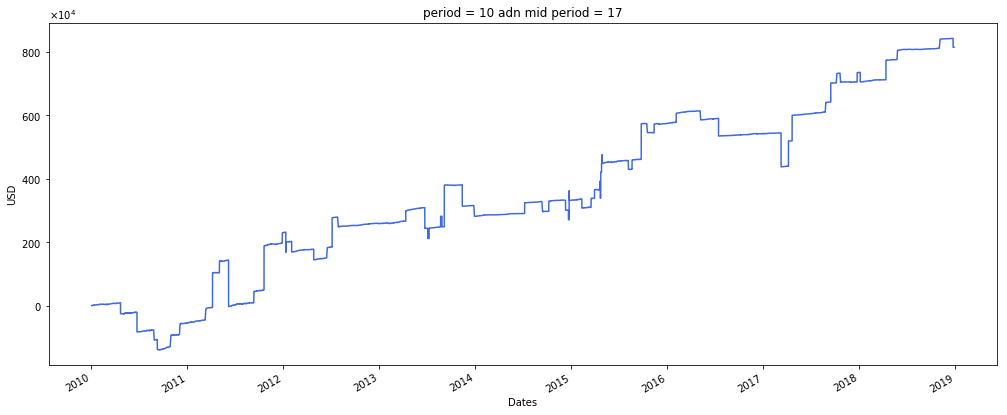

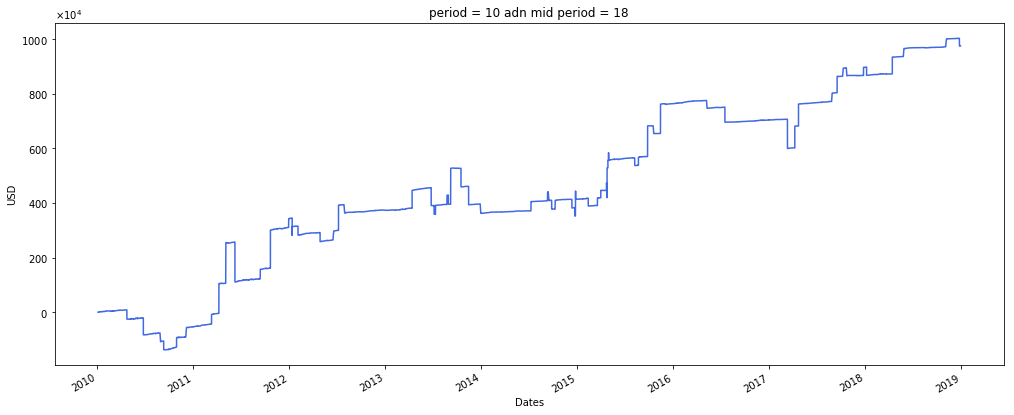

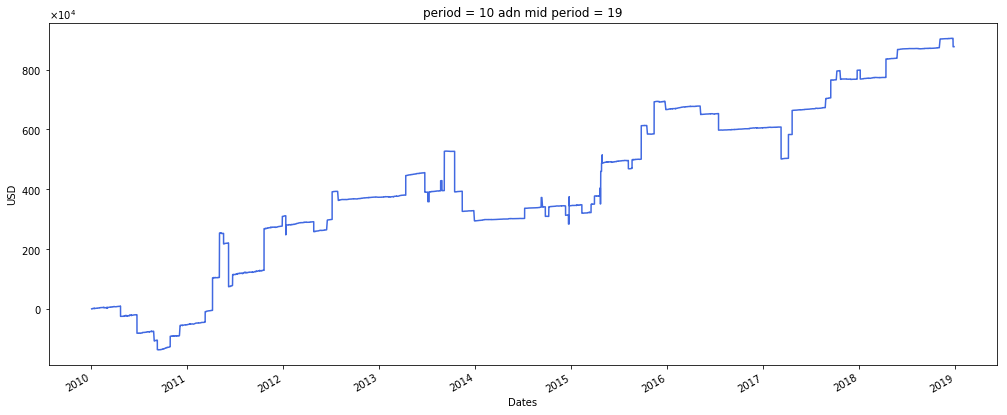

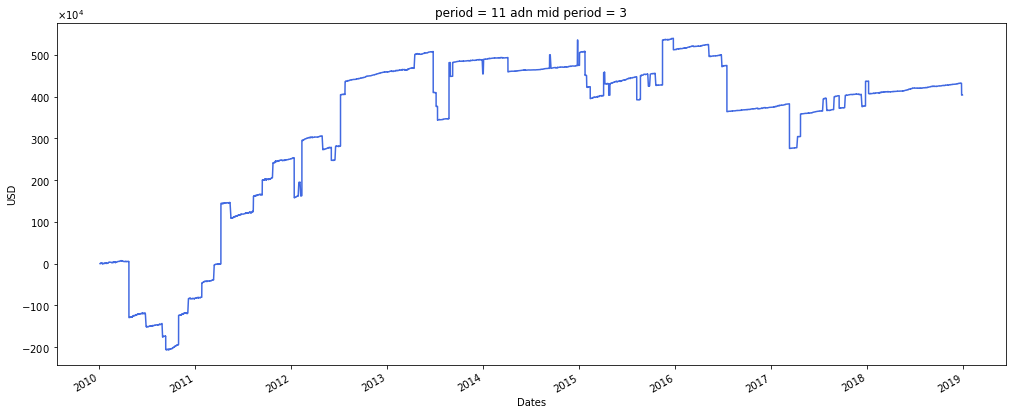

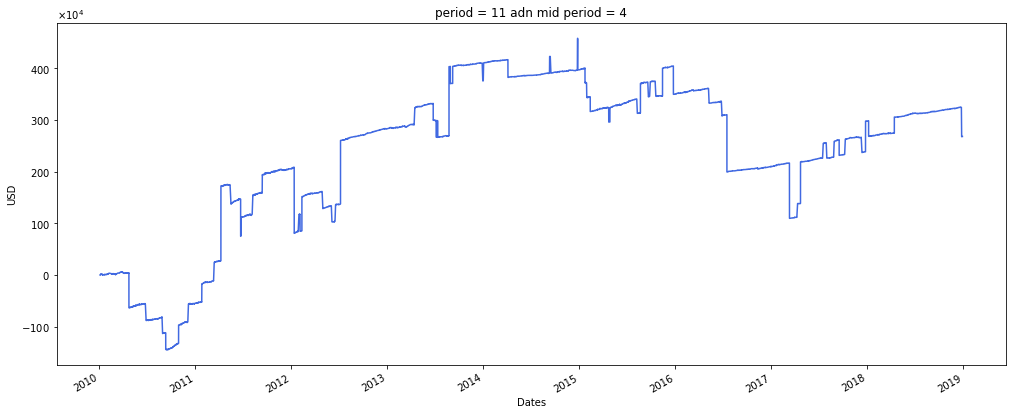

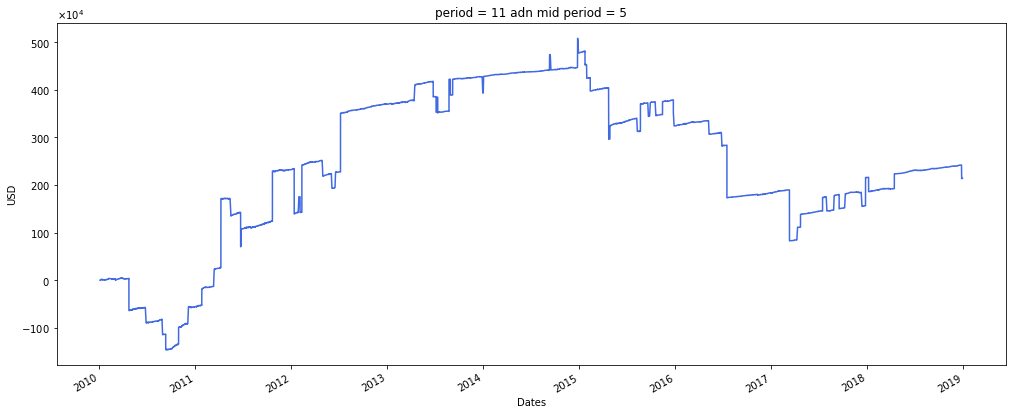

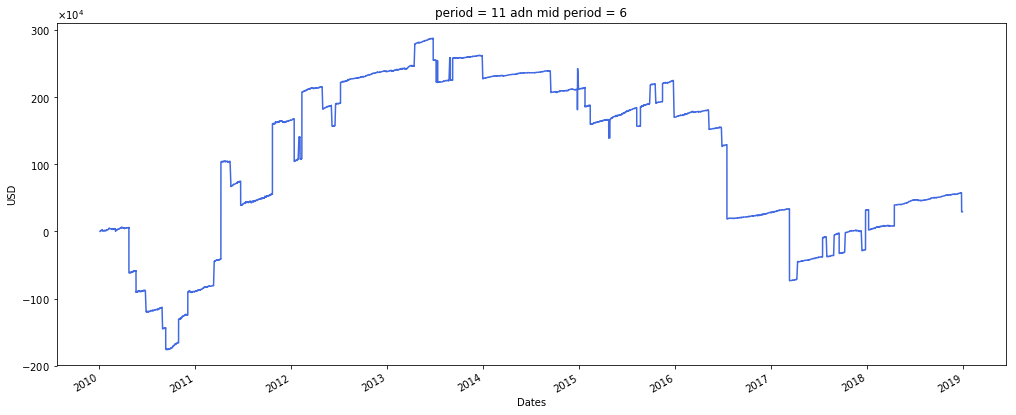

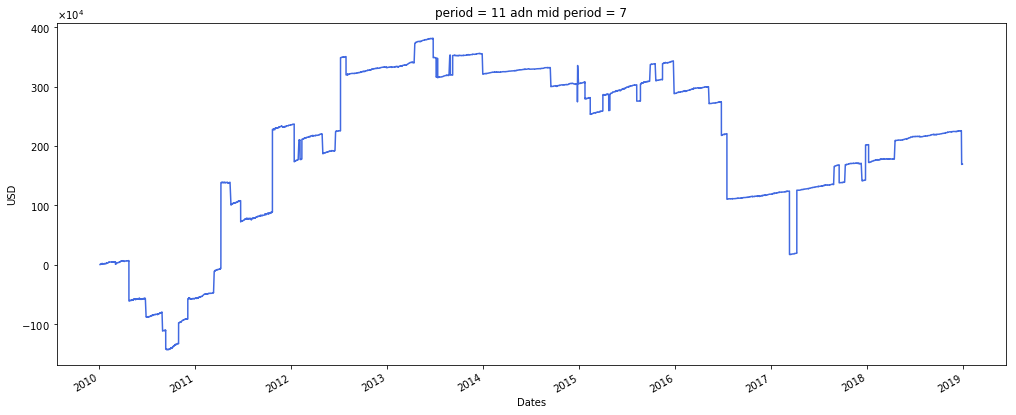

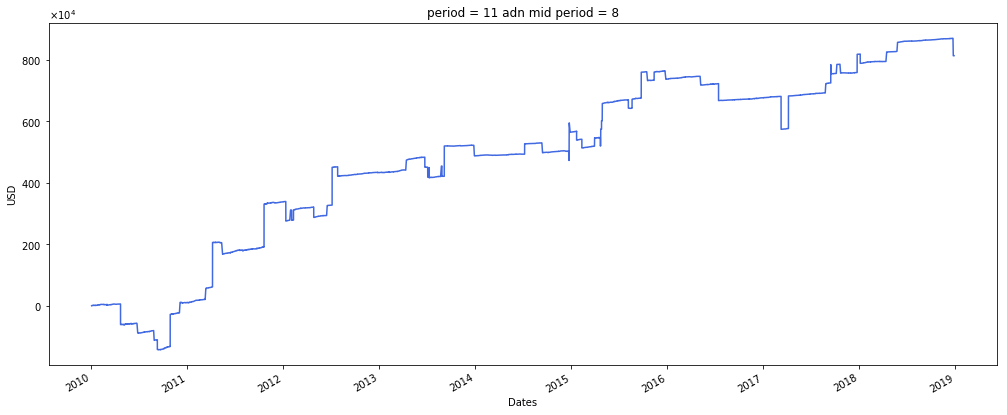

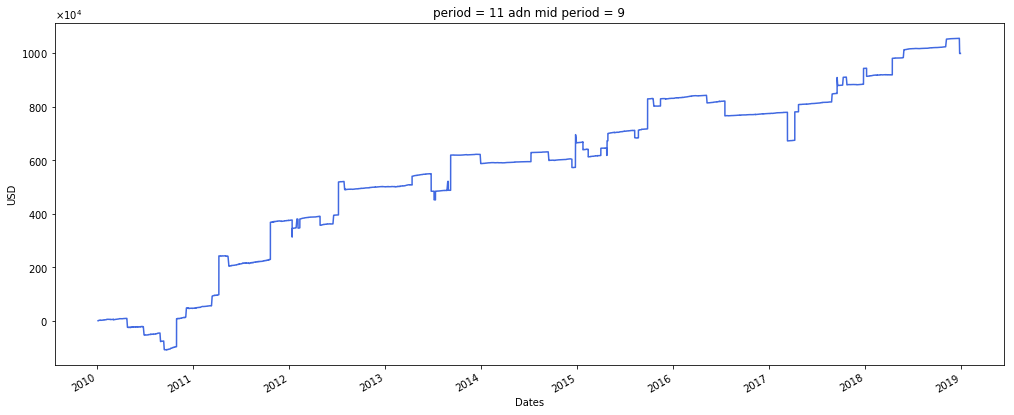

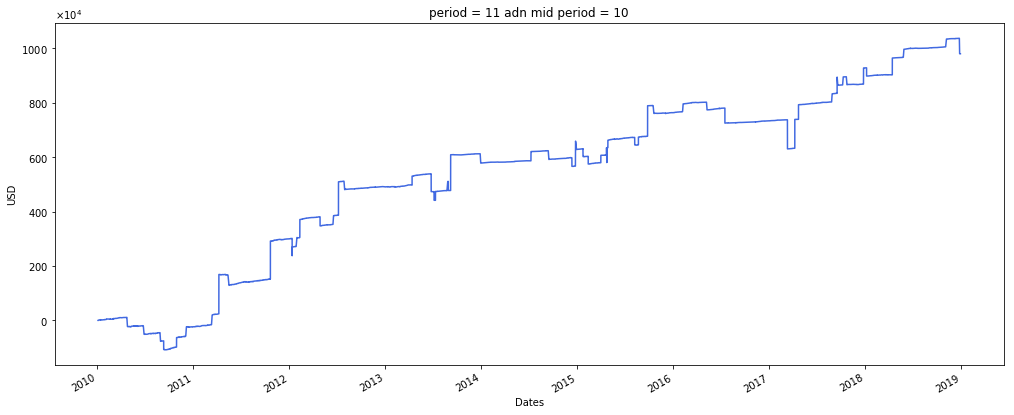

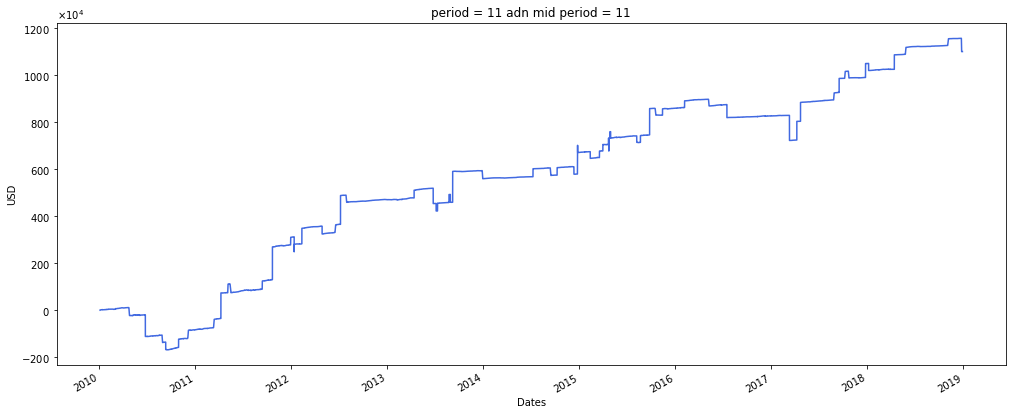

In [ ]:
a=range(3,20)
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    A=BT.Resumen_acomulado_estrategia_2(df,period=period,period_mid=period_mid,resample="1W")
    if np.abs(np.trapz(A["Cumulative"])/len(A)) > 1E5:
        BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="period = {} adn mid period = {}".format(period,period_mid))
        plt.show()

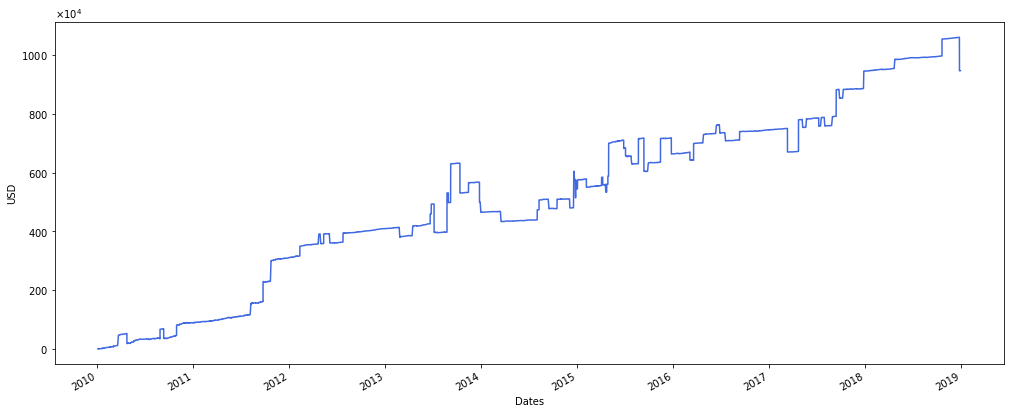

In [4]:
A=BT.Resumen_acomulado_estrategia_2(df,period=6,period_mid=5,resample="1W")
BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False)

In [5]:
from scipy.optimize import curve_fit
def l(x,a,b):
    return a*x+b

In [6]:
A["Time since"]=(A.Cumulative.index-A.index[0]).astype('timedelta64[h]')

In [7]:
popt, pcov = curve_fit(l, A["Time since"], A["Cumulative"])

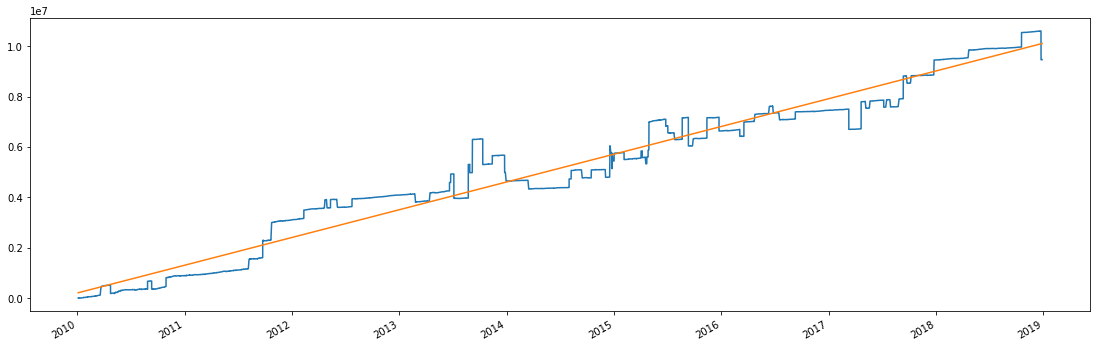

In [20]:
A.Cumulative.plot(figsize=(19,6))
l(A["Time since"], *popt).plot()

In [52]:
popt

array([3.85746347e+01, 9.02217156e+05])

In [55]:
pcov

array([[ 1.39107261e-01, -5.40269029e+03],
       [-5.40269029e+03,  2.86439165e+08]])

In [28]:
BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="period = {} adn mid period = {}".format(6,6))
l(A["Time since"], *popt).plot(color="forestgreen",style="--",label="Ajuste")
plt.legend()
plt.savefig("Cosa.png")
plt.close()

In [3]:
A=BT.Resumen_acomulado_estrategia_2(df,period=50,period_mid=50,resample="1W")
A

Position  Cumulative  Time past
2010-01-04 06:27:00     547.5       547.5          0
2010-01-04 14:00:00    -807.5      -260.0          7
2010-01-05 07:30:00    1130.0       870.0         25
2010-01-05 13:54:00      12.5       882.5         31
2010-01-05 22:27:00     102.5       985.0         40
2010-01-06 10:36:00     885.0      1870.0         52
2010-01-06 23:39:00    -180.0      1690.0         65
2010-01-07 15:24:00   -3550.0     -1860.0         80
2010-01-08 15:03:00    5445.0      3585.0        104
2010-01-08 23:00:00  360387.5    363972.5        112
2010-01-11 17:33:00    1365.0    365337.5        179
2010-01-12 07:12:00     260.0    365597.5        192
2010-01-12 19:39:00    2085.0    367682.5        205
2010-01-13 17:03:00    1800.0    369482.5        226
2010-01-14 09:18:00    -547.5    368935.0        242
2010-01-14 19:27:00   -1107.5    367827.5        253
2010-01-15 07:39:00     -85.0    367742.5        265
2010-01-18 05:18:00     870.0    368612.5        334
2010-01-19 16:12:00    -867.5    367745.0        369
2010-01-20 02:54:00    3960.0    371705.0        380
2010-01-20 12:57:00    2362.5    374067.5        390
2010-01-21 03:51:00     865.0    374932.5        405
2010-01-21 15:15:00    1330.0    376262.5        416
2010-01-21 19:06:00    -155.0    376107.5        420
2010-01-22 02:54:00    1170.0    377277.5        428
2010-01-22 18:00:00    1070.0    378347.5        443
2010-01-25 11:57:00    1582.5    379930.0        509
2010-01-26 02:06:00     572.5    380502.5        523
2010-01-26 09:42:00    -142.5    380360.0        531
2010-01-26 22:03:00     560.0    380920.0        543
...                       ...         ...        ...
2018-12-03 16:33:00     507.5  -1746360.0      78130
2018-12-04 10:48:00    1435.0  -1744925.0      78148
2018-12-04 21:36:00   -1410.0  -1746335.0      78159
2018-12-05 16:03:00     -55.0  -1746390.0      78177
2018-12-06 15:42:00    1802.5  -1744587.5      78201
2018-12-07 20:15:00    2275.0  -1742312.5      78229
2018-12-10 02:27:00  285890.0  -1456422.5      78284
2018-12-10 13:36:00    -447.5  -1456870.0      78295
2018-12-10 22:45:00    -350.0  -1457220.0      78304
2018-12-11 16:00:00    3022.5  -1454197.5      78321
2018-12-13 15:18:00    -782.5  -1454980.0      78368
2018-12-13 19:06:00    1145.0  -1453835.0      78372
2018-12-14 13:45:00    -440.0  -1454275.0      78391
2018-12-17 16:27:00   -1082.5  -1455357.5      78466
2018-12-18 15:15:00    1725.0  -1453632.5      78488
2018-12-19 20:48:00     917.5  -1452715.0      78518
2018-12-20 14:09:00   -1832.5  -1454547.5      78535
2018-12-20 19:42:00    2595.0  -1451952.5      78541
2018-12-21 08:39:00     377.5  -1451575.0      78554
2018-12-21 23:36:00 -569640.0  -2021215.0      78569
2018-12-24 18:00:00    -215.0  -2021430.0      78635
2018-12-25 02:30:00     637.5  -2020792.5      78644
2018-12-25 08:33:00  570845.0  -1449947.5      78650
2018-12-26 00:27:00     297.5  -1449650.0      78666
2018-12-26 16:42:00     610.0  -1449040.0      78682
2018-12-27 01:15:00     180.0  -1448860.0      78690
2018-12-27 13:51:00    -600.0  -1449460.0      78703
2018-12-27 23:00:00    -205.0  -1449665.0      78712
2018-12-28 10:24:00     272.5  -1449392.5      78723
2018-12-28 14:18:00     287.5  -1449105.0      78727

[3341 rows x 3 columns]

In [33]:
A.keys()

Index(['Position', 'Cumulative', 'Time past'], dtype='object')

# Criterio de menor fluctuación
Se ajusta a una recta

In [2]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import mpl_finance as finance
import matplotlib.pylab as plt
import numpy as np
import os
import itertools
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()

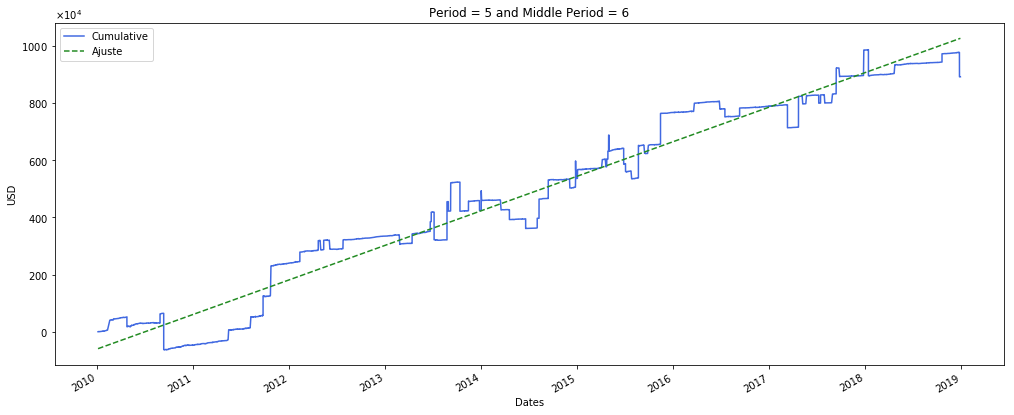

In [3]:
from scipy.optimize import curve_fit
def l(x,a,b):
    return a*x+b
a=range(3,20)
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    A=BT.Resumen_acomulado_estrategia_2(df,period=period,period_mid=period_mid,resample="1W")
    R=np.corrcoef(A["Time past"],A["Cumulative"])[0,1]
    if np.abs(R) >= 0.95:
        popt, pcov = curve_fit(l, A["Time past"], A["Cumulative"])
        BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="Period = {} and Middle Period = {}".format(period,period_mid))
        l(A["Time past"], *popt).plot(color="forestgreen",style="--",label="Ajuste")
        plt.legend()
        plt.savefig("Cosa.png")
        plt.show()
        break

In [9]:
A=BT.Resumen_acomulado_estrategia_2(df,period=5,period_mid=5,resample="1W")

In [10]:
np.corrcoef(A["Time past"],A["Cumulative"])[0,1]>0.8 and np.corrcoef(A["Time past"],A["Cumulative"])[0,1]<0.95

True

In [11]:
np.corrcoef(A["Time past"],A["Cumulative"])[0,1]

0.9221844909716727

In [ ]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import numpy as np
import os
import itertools
from scipy.optimize import curve_fit
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()
def l(x,a,b):
    return a*x+b
a=range(3,40)
resampled="1D"
archivo_best=open("Resultados_95.txt","w")
archivo_rest=open("Resultados_8.txt","w")
archivo_best.write("Period"+"\t"+"Period mid"+"\t"+"R\n")
archivo_rest.write("Period"+"\t"+"Period mid"+"\t"+"R\n") 
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    A=BT.Resumen_acomulado_estrategia_2(df,period=period,period_mid=period_mid,resample=resampled)
    R=np.corrcoef(A["Time past"],A["Cumulative"])[0,1]
    if np.abs(R) >= 0.95:
        popt, pcov = curve_fit(l, A["Time past"], A["Cumulative"])
        BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="Period = {} and Middle Period = {}".format(period,period_mid))
        l(A["Time past"], *popt).plot(color="forestgreen",style="--",label="Ajuste")
        archivo_best.write(str(period)+"\t"+str(period_mid)+"\t"+str(R)+"\n")
        plt.legend()
        #plt.savefig("./"+resampled+"/Resultado_period"+str(period)+"periodmid"+str(period_mid)+".png")
        plt.show()
    elif np.abs(R)>=0.8 and np.abs(R)<0.95: 
        archivo_rest.write(str(period)+"\t"+str(period_mid)+"\t"+str(R)+"\n")
archivo_best.close()
archivo_rest.close()

<Figure size 1700x700 with 1 Axes>